In [1]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from os import path
from ToyDGLDataset_v2 import ToyDGLDataset_v2
from tqdm import tqdm
from statistics import mean
import pprint
from pathlib import Path

pp = pprint.PrettyPrinter()

plt.figure(figsize=(10,7))
plt.rcParams.update({'font.size': 20})
plt.rcParams['text.usetex'] = True
lw = 2
xyLabelFontSize = 20
xLabelPad = 6
yLabelPad = 10

Using backend: pytorch


<Figure size 720x504 with 0 Axes>

In [2]:
nBins = 25
graphClass0 = "Graph class 0"
graphClass1 = "Graph class 1"

In [3]:
def getAllDatasetNames(datasetRootDir):
    files = glob.glob(datasetRootDir + '/*/*/*.json', recursive=True)
    files.sort()
    datasetDirectories = [path.dirname(file) for file in files]
    datasetnames = [path.normpath(dir).split(path.sep)[-1] for dir in datasetDirectories]
    return datasetDirectories, datasetnames

In [4]:
datasetRootDir = '/home/andrew/GNN_Sandbox/GraphToyDatasets_v3'
datasetDirs, datasetNames = getAllDatasetNames(datasetRootDir)

In [5]:
pp.pprint(datasetDirs)
pp.pprint(datasetNames)

['/home/andrew/GNN_Sandbox/GraphToyDatasets_v3/Toy0_v3_1/Toy0_v3_1_0NodeCountMeanDiff',
 '/home/andrew/GNN_Sandbox/GraphToyDatasets_v3/Toy0_v3_1/Toy0_v3_1_11NodeCountMeanDiff',
 '/home/andrew/GNN_Sandbox/GraphToyDatasets_v3/Toy0_v3_1/Toy0_v3_1_1NodeCountMeanDiff',
 '/home/andrew/GNN_Sandbox/GraphToyDatasets_v3/Toy0_v3_1/Toy0_v3_1_2NodeCountMeanDiff',
 '/home/andrew/GNN_Sandbox/GraphToyDatasets_v3/Toy0_v3_1/Toy0_v3_1_3NodeCountMeanDiff',
 '/home/andrew/GNN_Sandbox/GraphToyDatasets_v3/Toy0_v3_1/Toy0_v3_1_4NodeCountMeanDiff',
 '/home/andrew/GNN_Sandbox/GraphToyDatasets_v3/Toy0_v3_1/Toy0_v3_1_5NodeCountMeanDiff',
 '/home/andrew/GNN_Sandbox/GraphToyDatasets_v3/Toy0_v3_1/Toy0_v3_1_7NodeCountMeanDiff',
 '/home/andrew/GNN_Sandbox/GraphToyDatasets_v3/Toy0_v3_1/Toy0_v3_1_9NodeCountMeanDiff',
 '/home/andrew/GNN_Sandbox/GraphToyDatasets_v3/Toy2_v3_0/Toy2_v3_0_0percentDiff',
 '/home/andrew/GNN_Sandbox/GraphToyDatasets_v3/Toy2_v3_0/Toy2_v3_0_10percentDiff',
 '/home/andrew/GNN_Sandbox/GraphToyDataset

In [6]:
def getBinsByPercentile(arrayDict, nBins, maxPercentile=99):
    minVal = 999999999999
    maxVal = -999999999999
    for arr in arrayDict.values():
        p = np.percentile(arr, [0, maxPercentile])
        minVal = p[0] if p[0] < minVal else minVal
        maxVal = p[1] if p[1] > maxVal else maxVal
    binWidth = (maxVal - minVal) / nBins
    
    while(binWidth.is_integer() == False):
        maxVal += 1
        binWidth = (maxVal-minVal) / nBins
    
    return np.linspace(minVal, maxVal, nBins+1)

def integrateHisto(data, bins):
    hist, bin_edges = np.histogram(data[graphClass0], bins=bins, density=True)
    print(f'graphClass0: {np.sum(hist * np.diff(bin_edges))}')

    hist, bin_edges = np.histogram(data[graphClass1], bins=bins, density=True)
    print(f'graphClass1: {np.sum(hist * np.diff(bin_edges))}')

In [7]:
def CreateFigure():
    fig, ax = plt.subplots(figsize=(9,7))
    ax.tick_params(labelbottom=True, labeltop=False, labelleft=True, labelright=False,
               bottom=True, top=True, left=True, right=True, length=7, pad=7, which='major', direction='in')
    return fig, ax

dataset = ToyDGLDataset_v2(datasetNames[0], datasetDirs[0])

graph, label = dataset[0]
print(dataset.name)
print(dataset.printProperties())

bins = getBinsByPercentile(nNodes, 8)

integrateHisto(nNodes, bins)

  0%|          | 0/27 [00:00<?, ?it/s]

Done loading data from cached files.


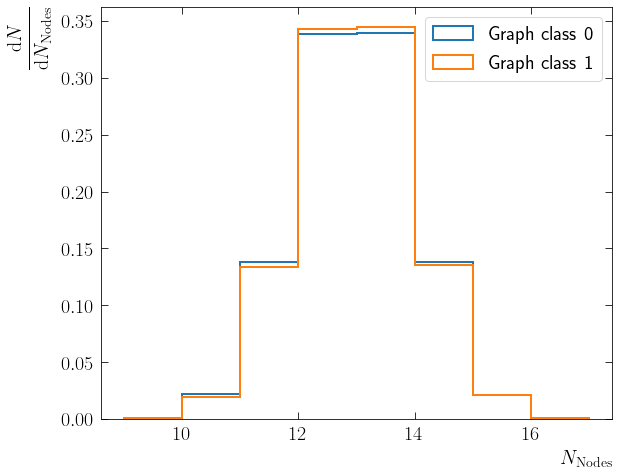

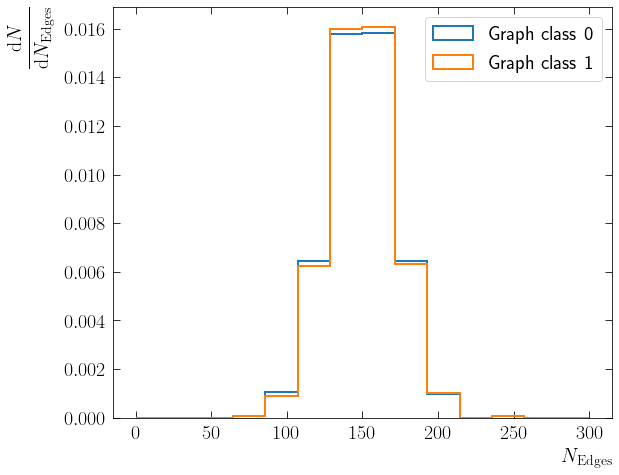

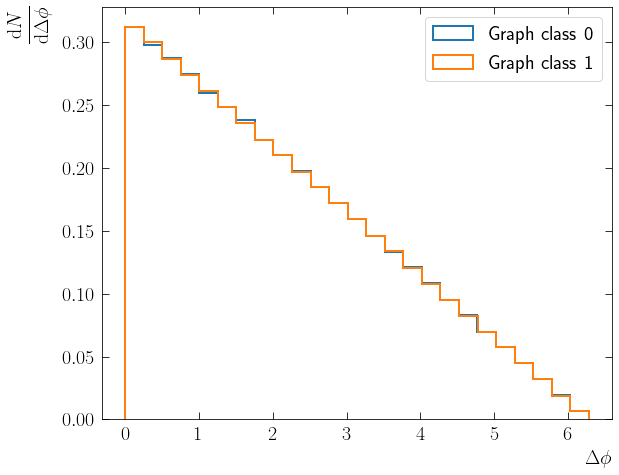

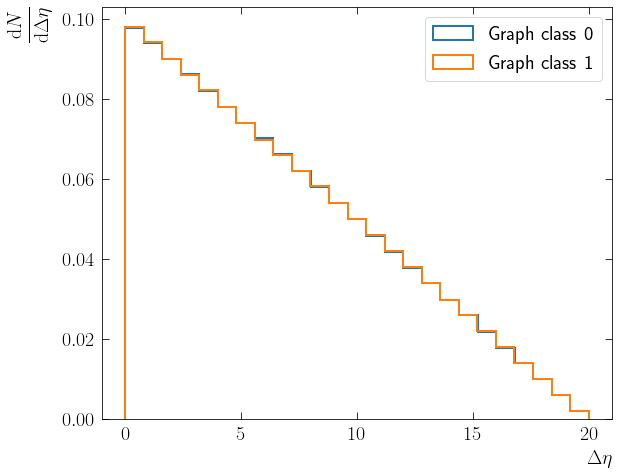

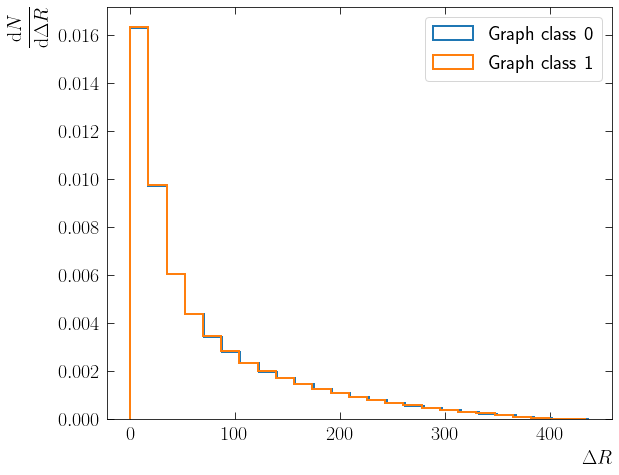

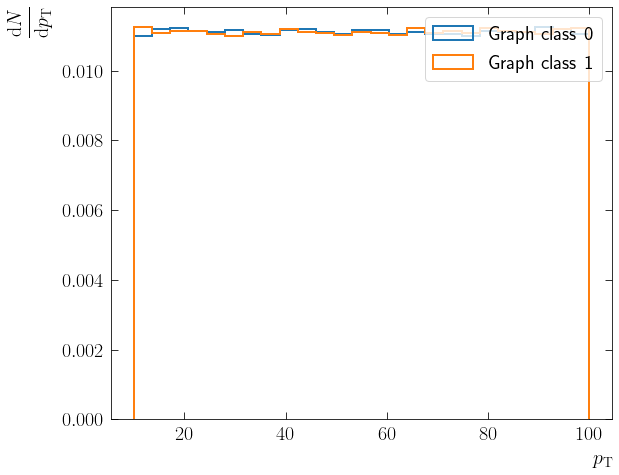

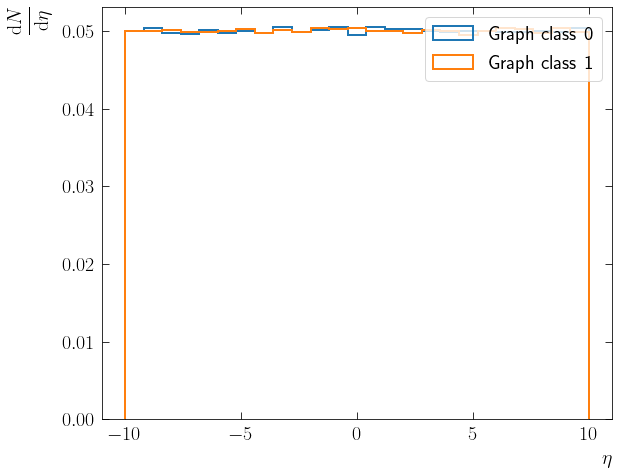

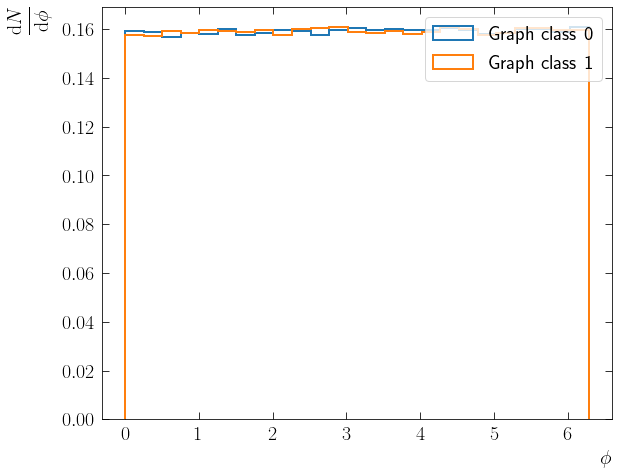

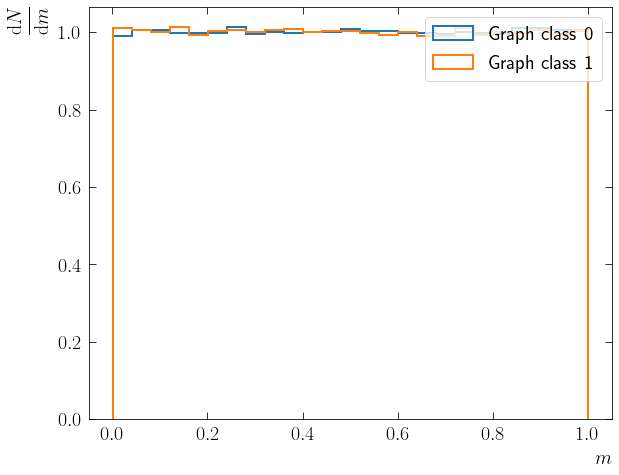

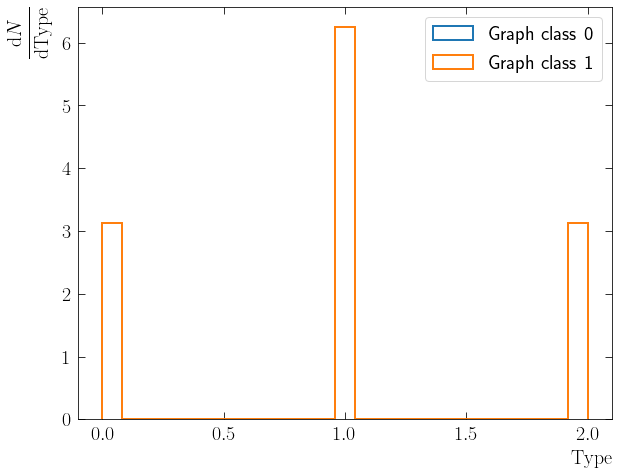

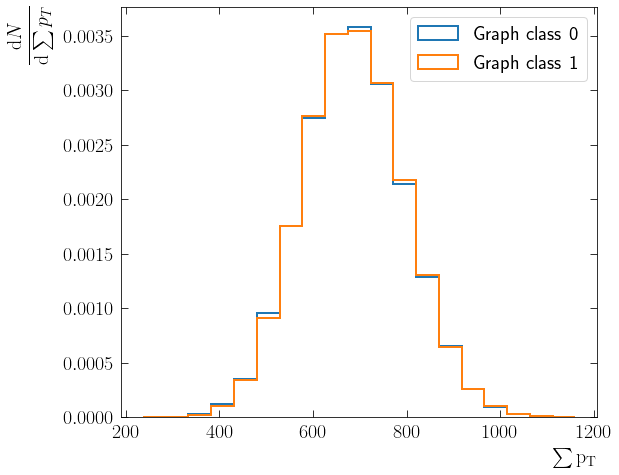

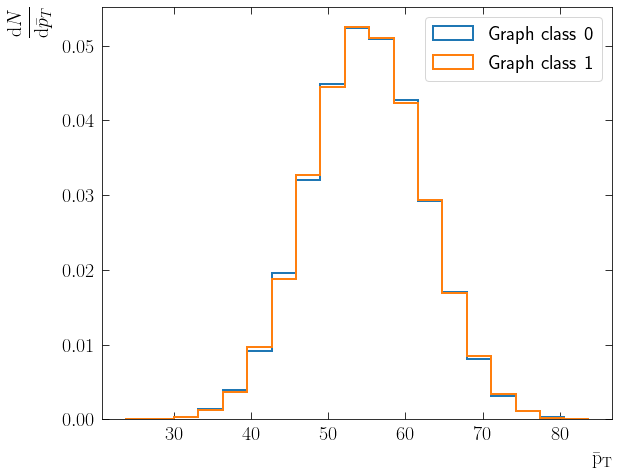

  4%|▎         | 1/27 [00:47<20:35, 47.52s/it]

Done loading data from cached files.


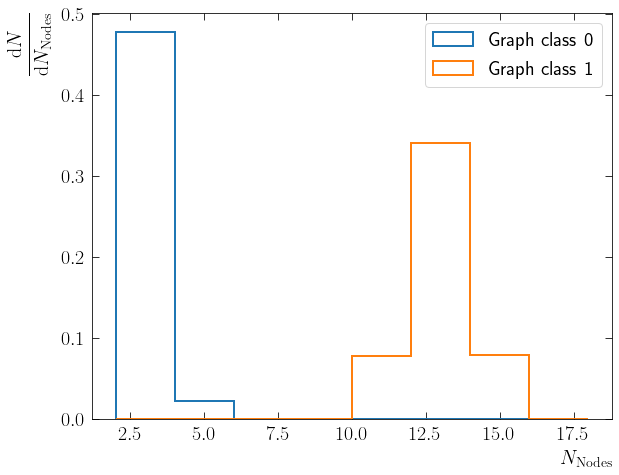

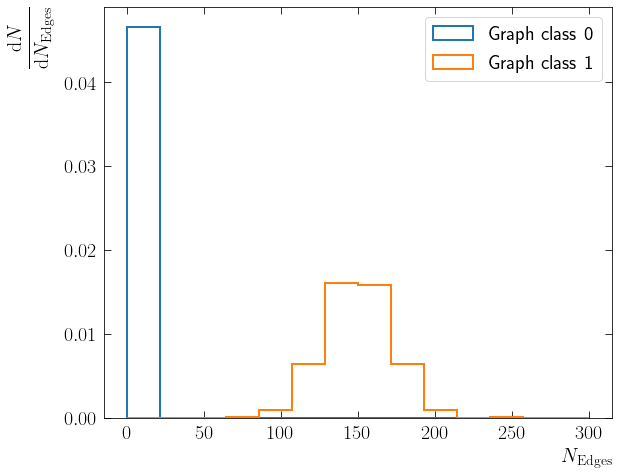

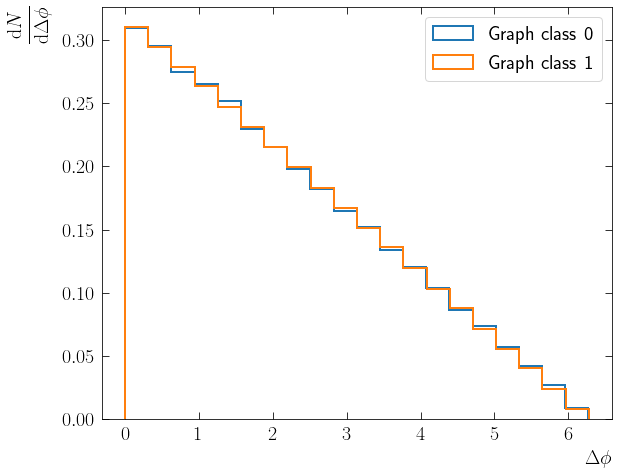

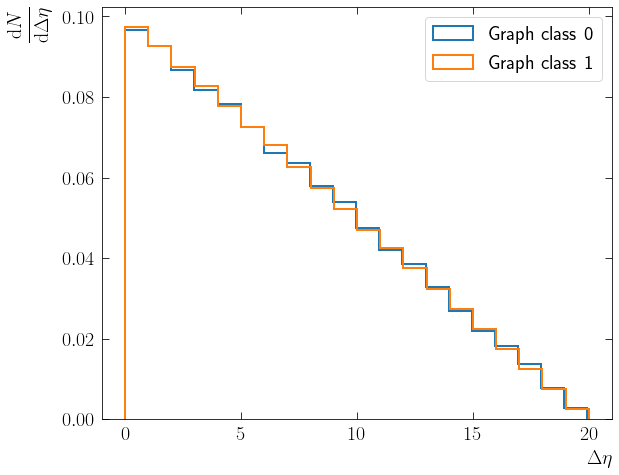

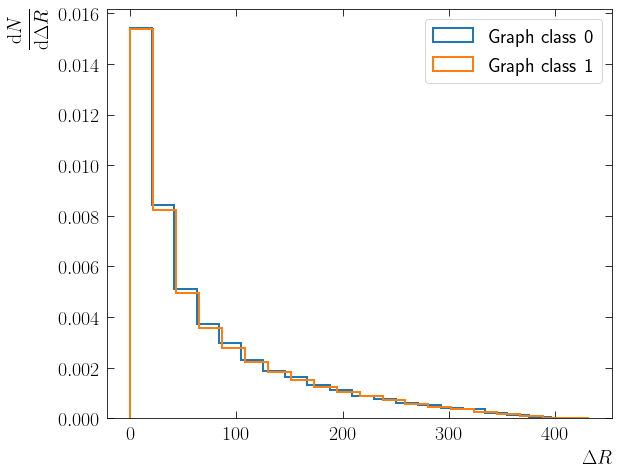

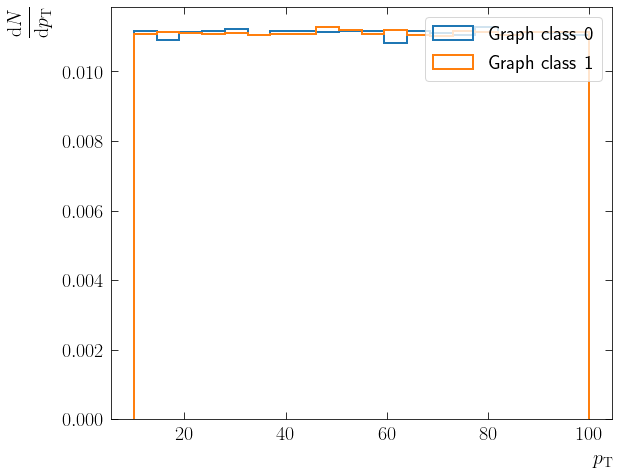

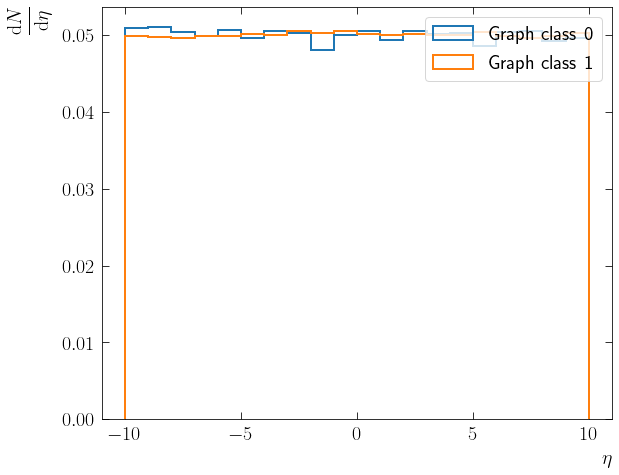

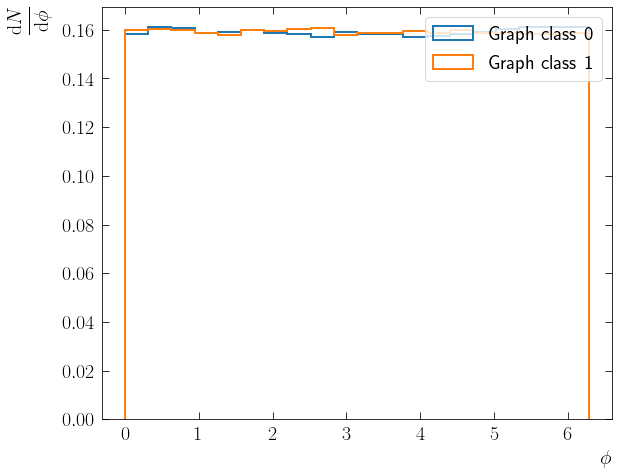

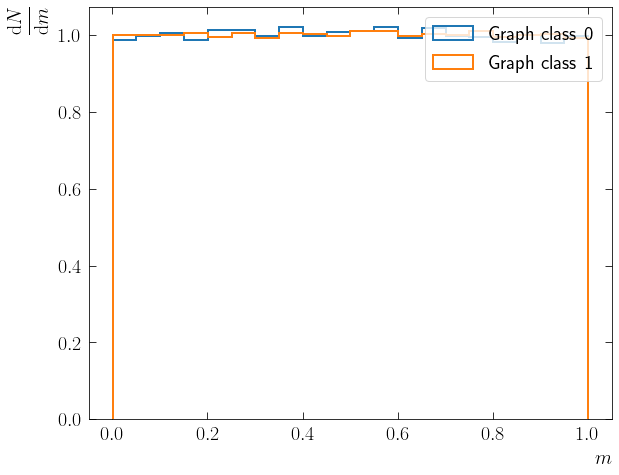

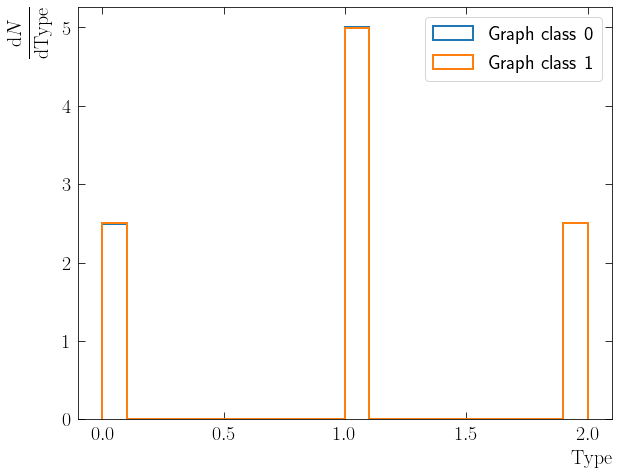

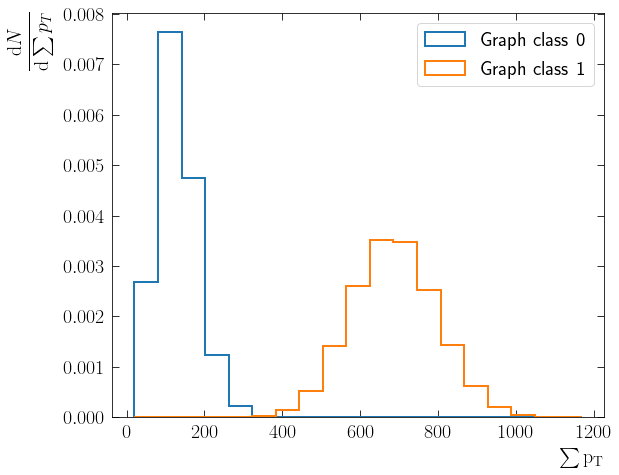

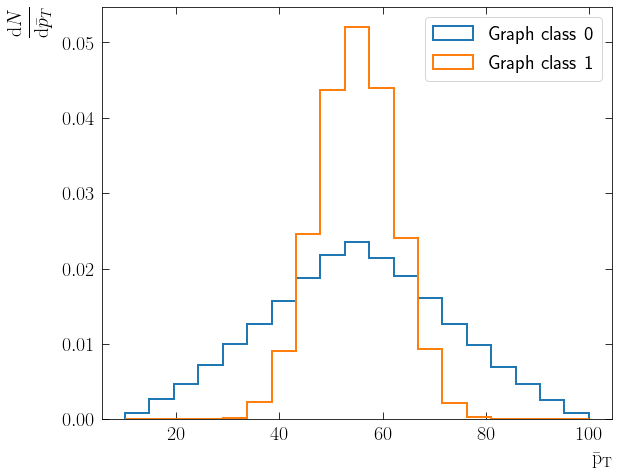

  7%|▋         | 2/27 [01:34<19:41, 47.25s/it]

Done loading data from cached files.


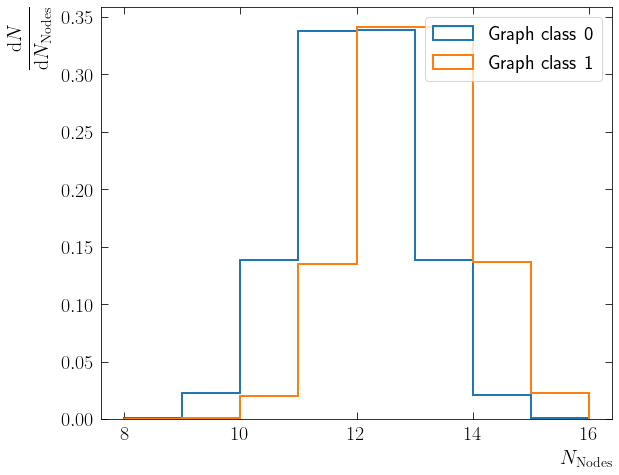

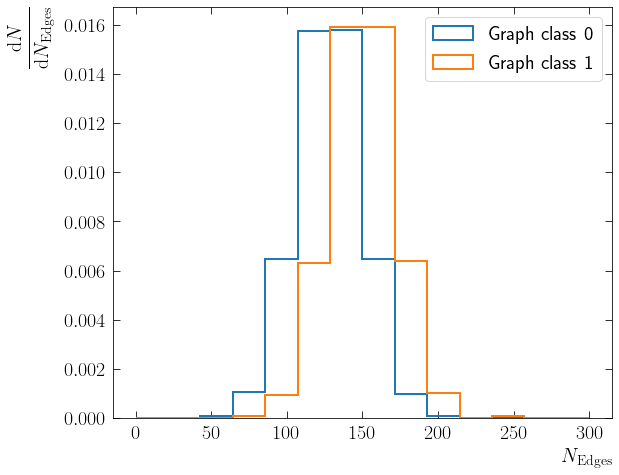

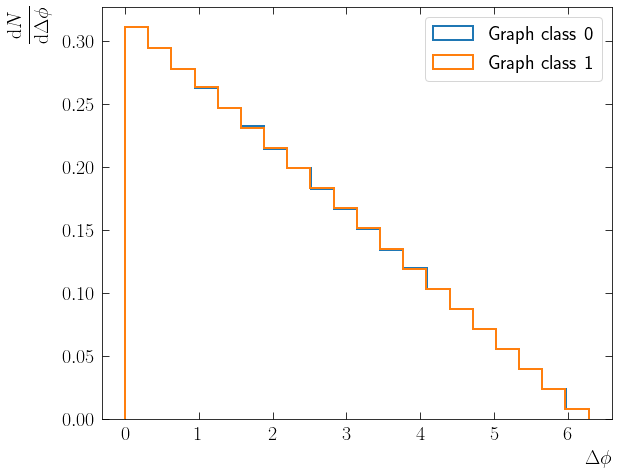

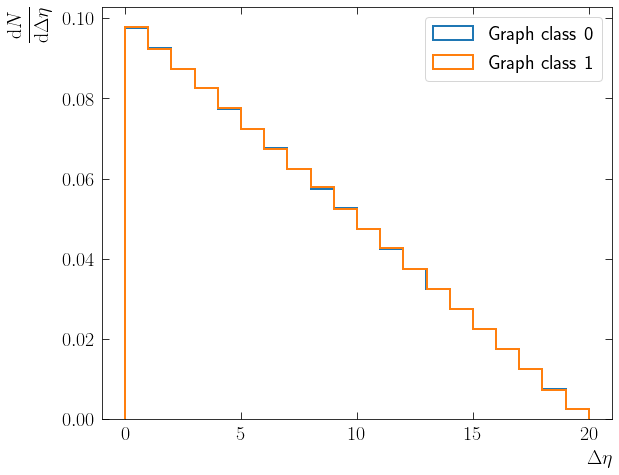

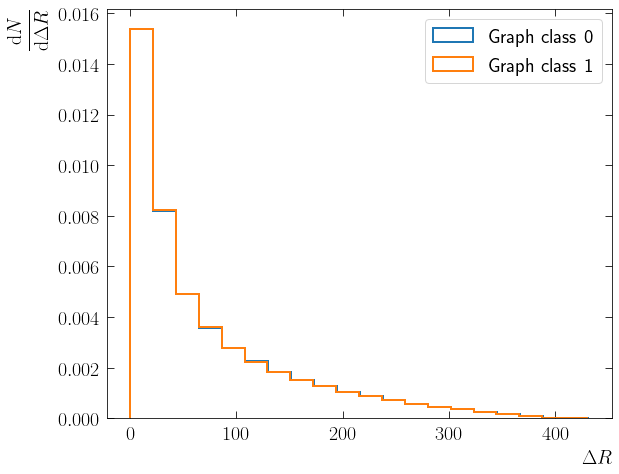

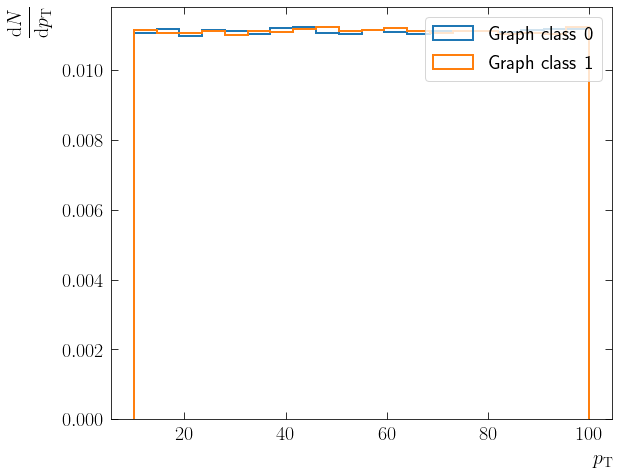

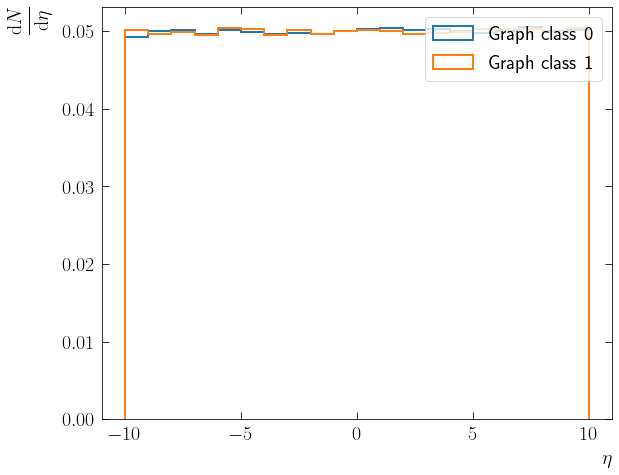

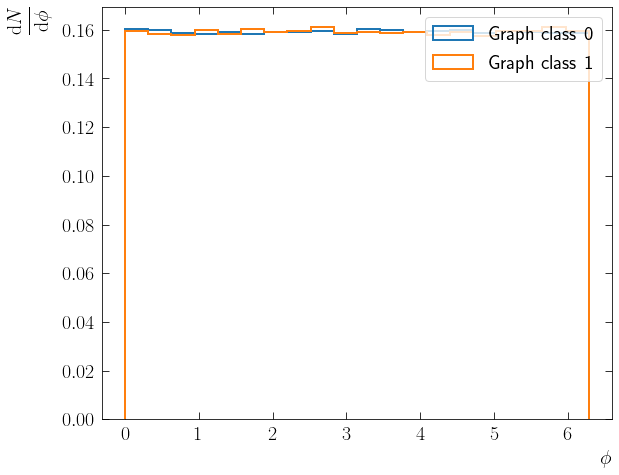

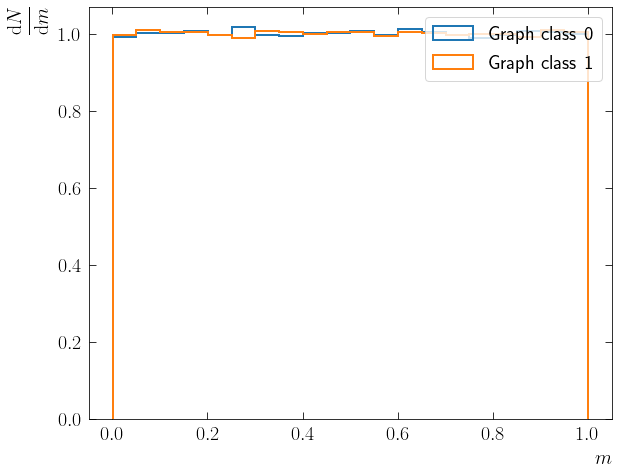

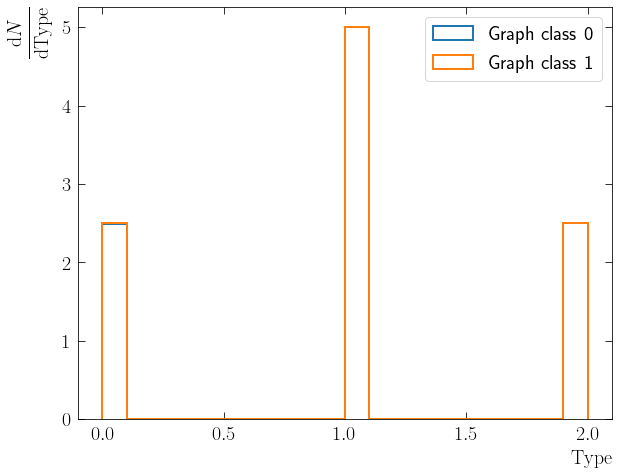

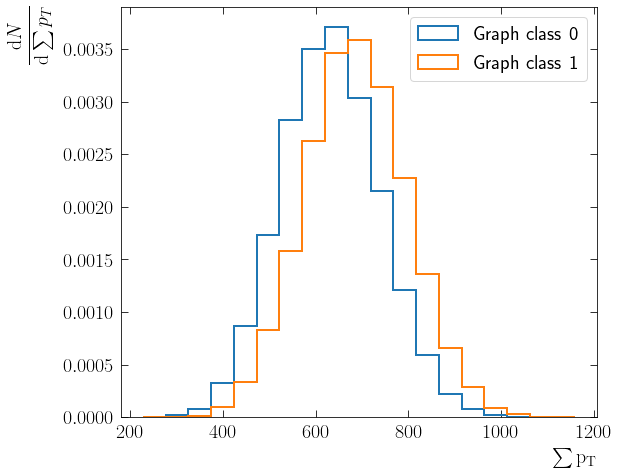

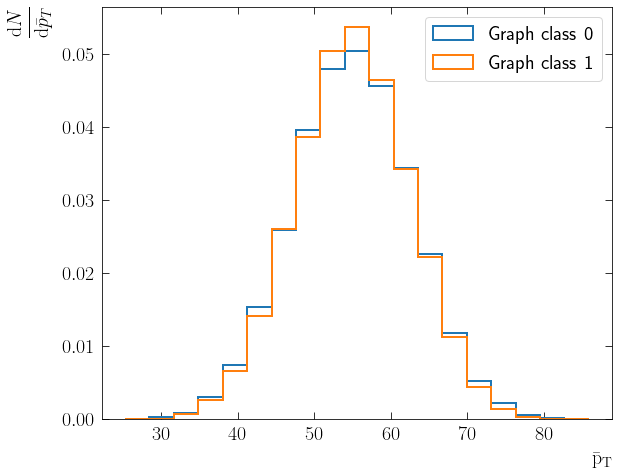

 11%|█         | 3/27 [02:21<18:53, 47.24s/it]

Done loading data from cached files.


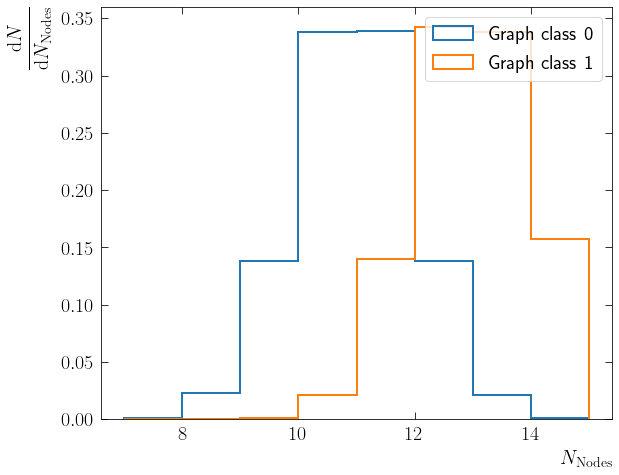

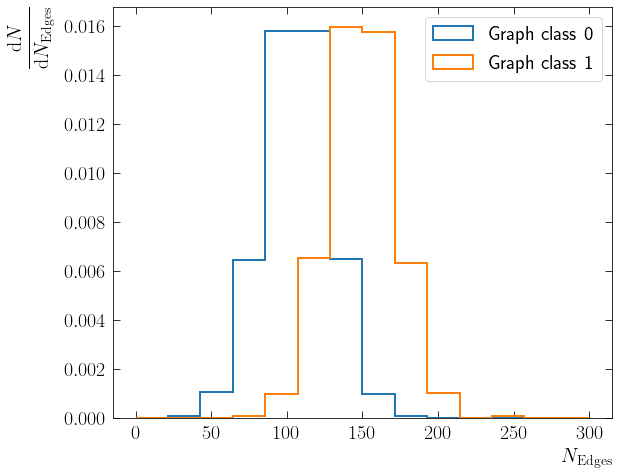

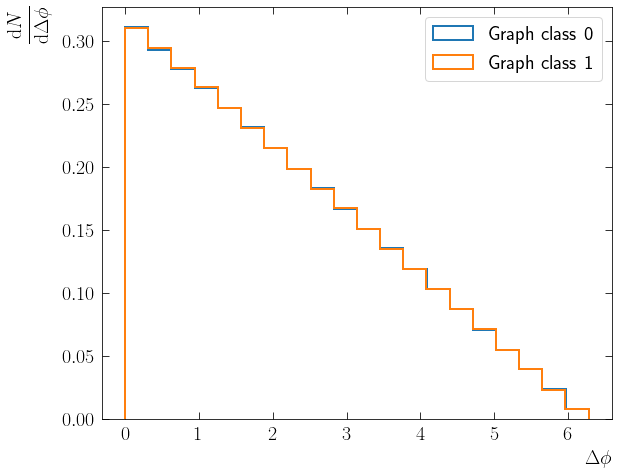

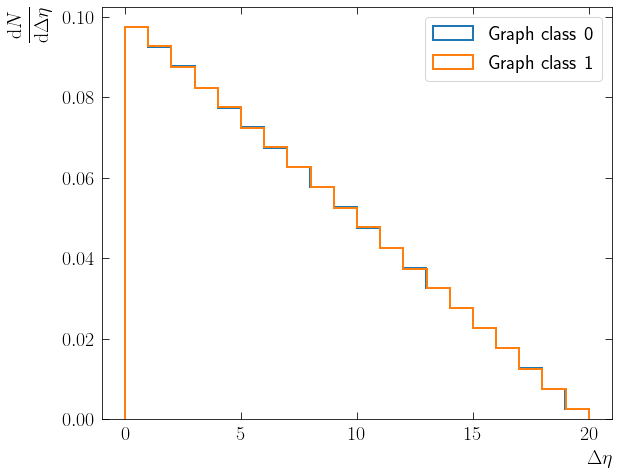

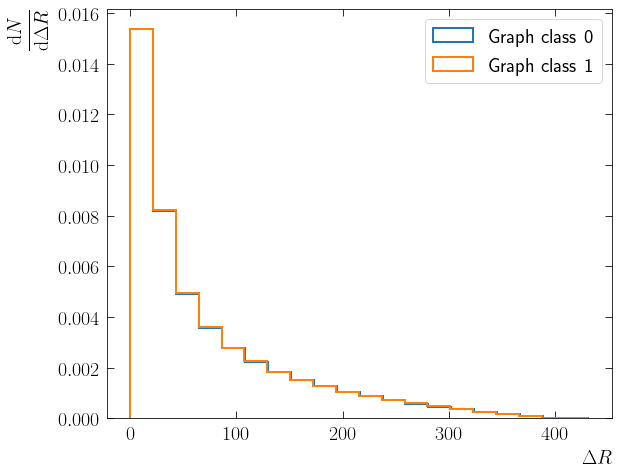

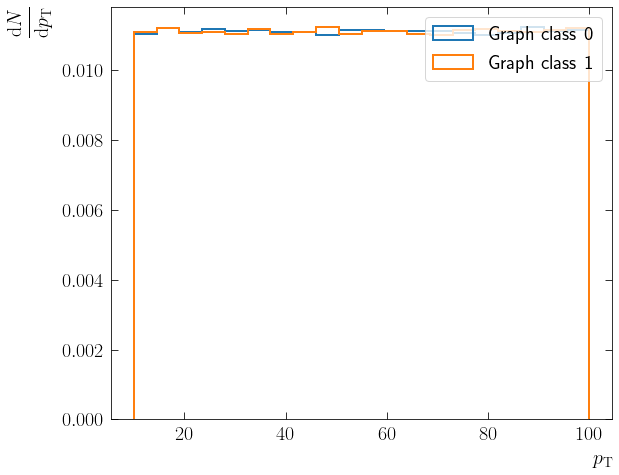

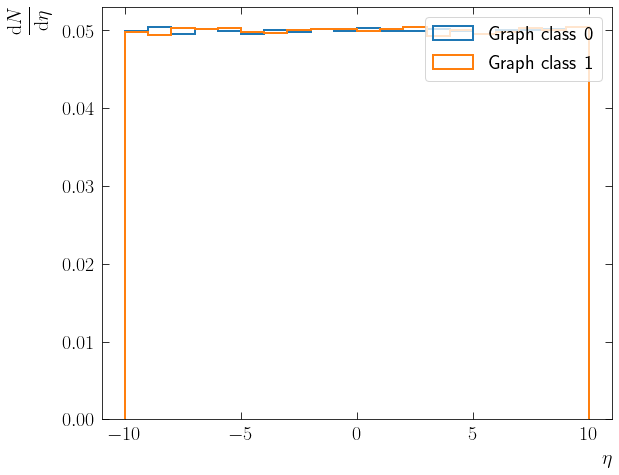

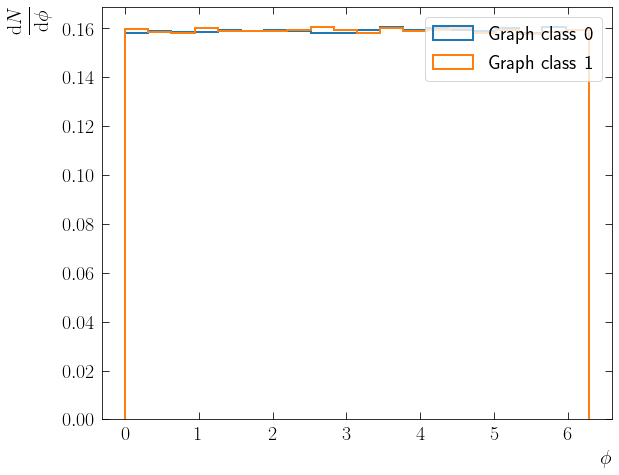

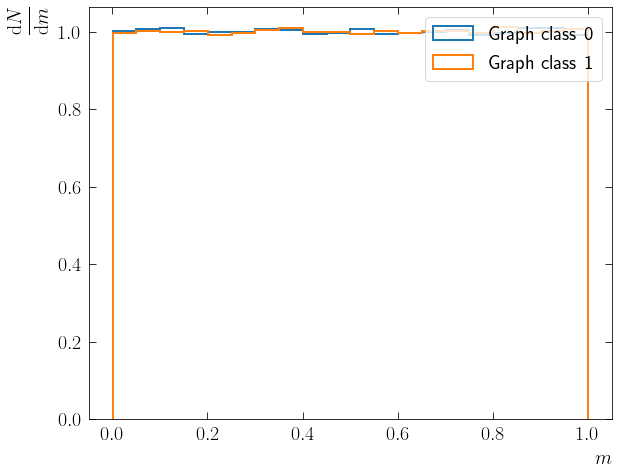

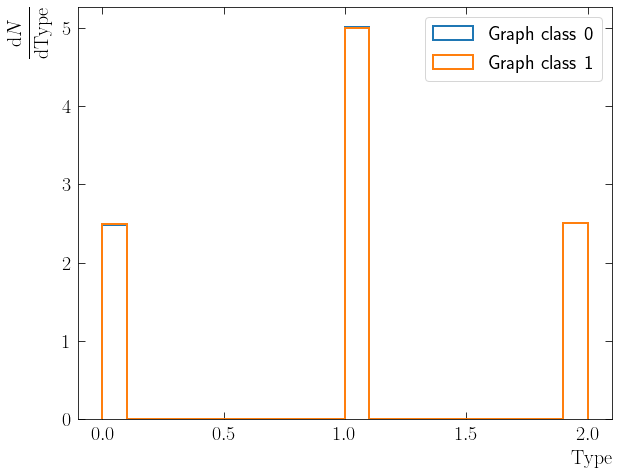

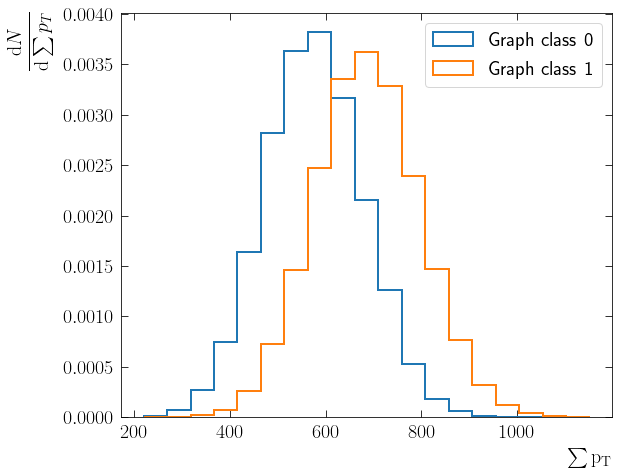

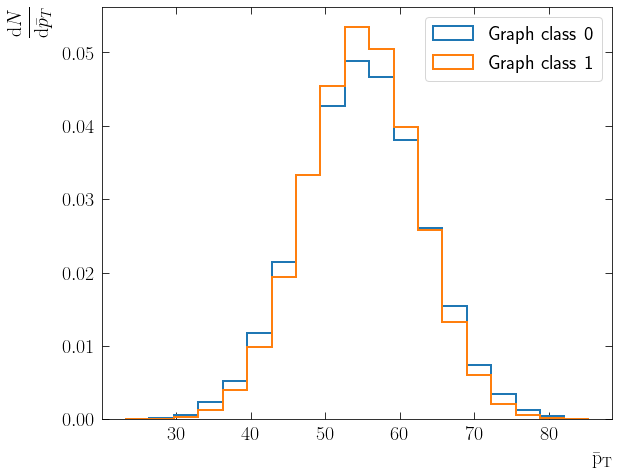

 15%|█▍        | 4/27 [03:08<18:03, 47.12s/it]

Done loading data from cached files.


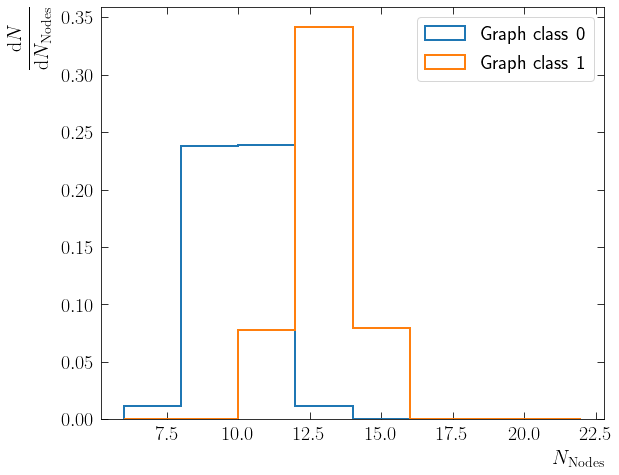

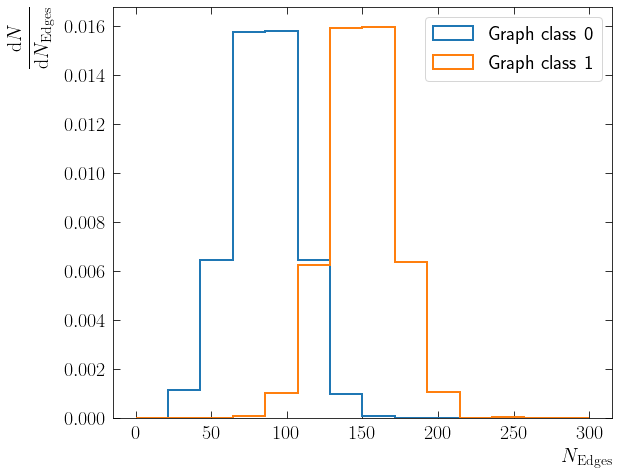

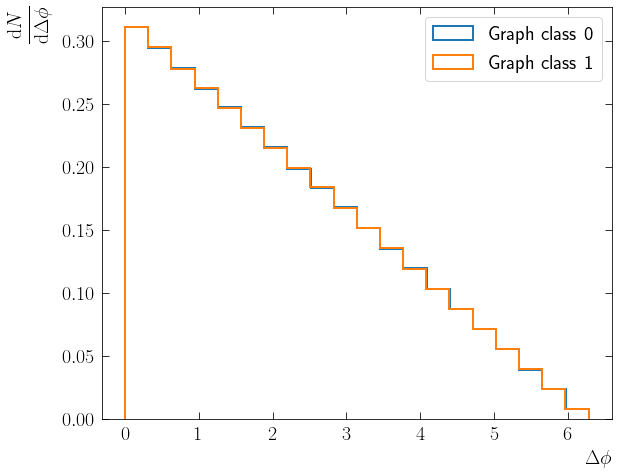

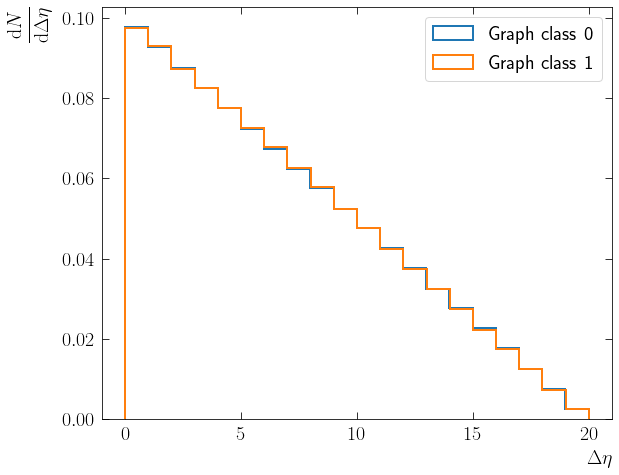

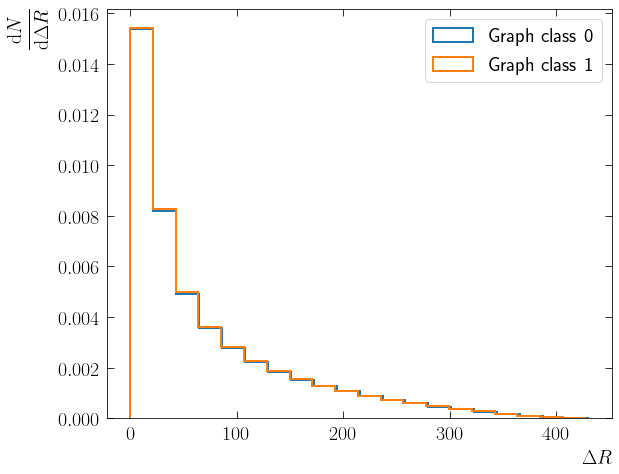

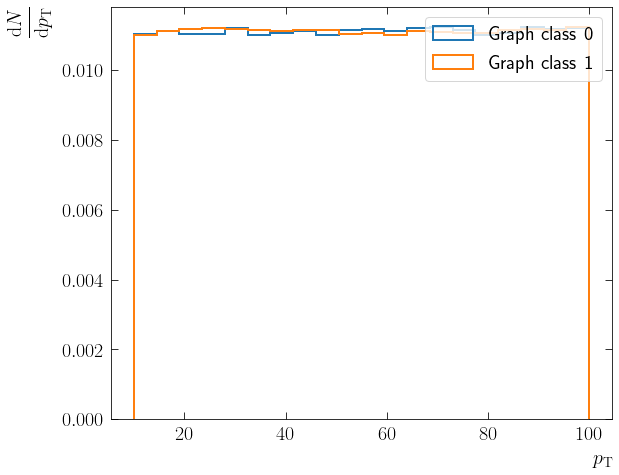

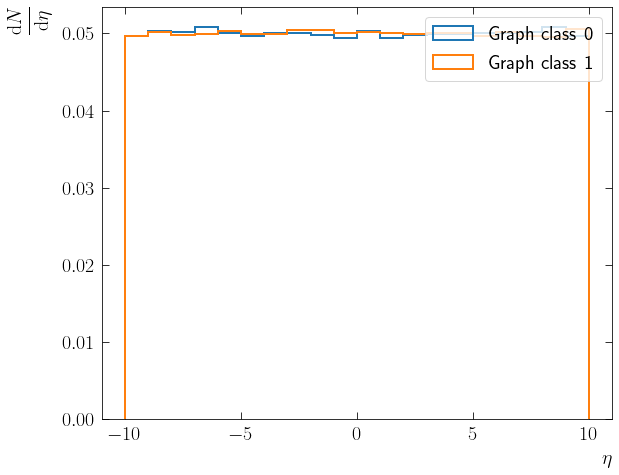

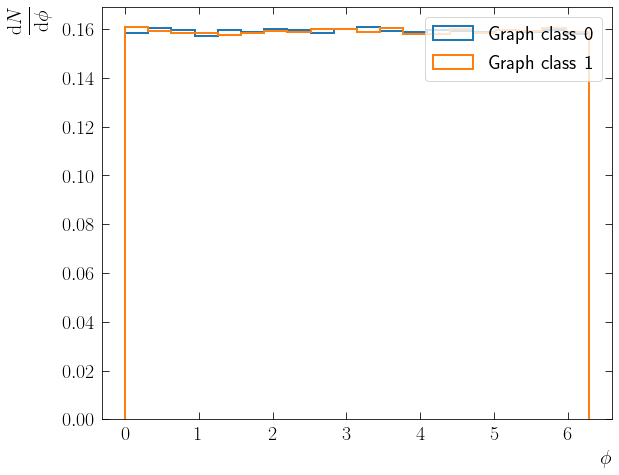

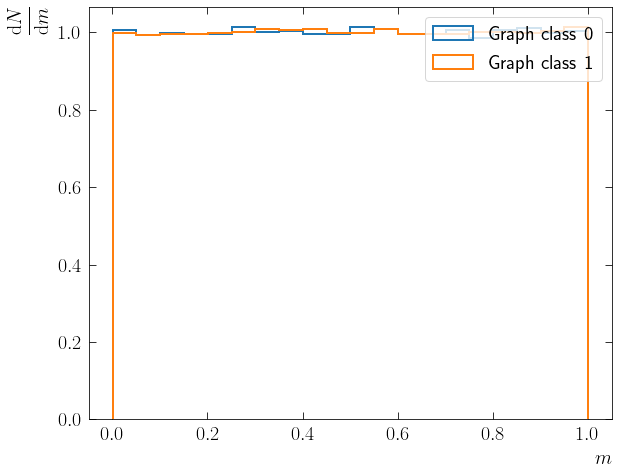

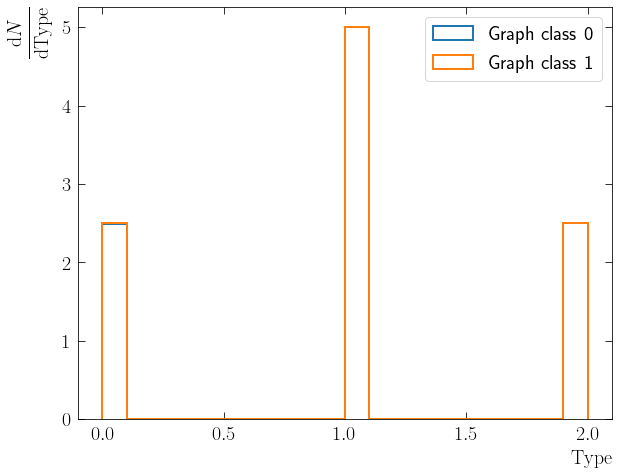

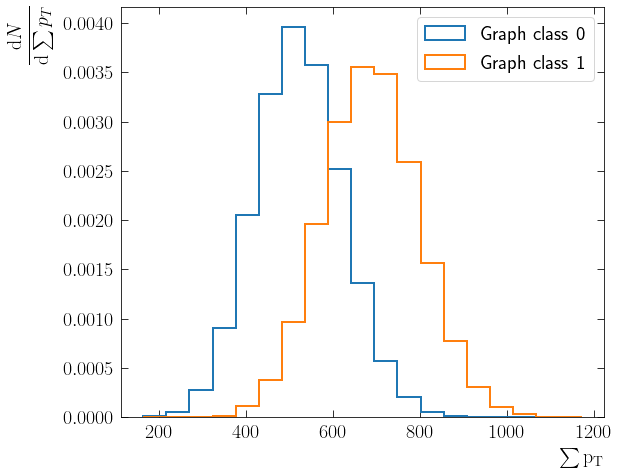

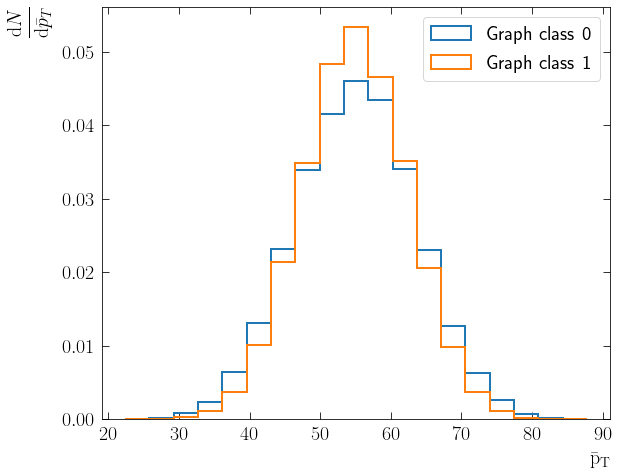

 19%|█▊        | 5/27 [03:56<17:21, 47.34s/it]

Done loading data from cached files.


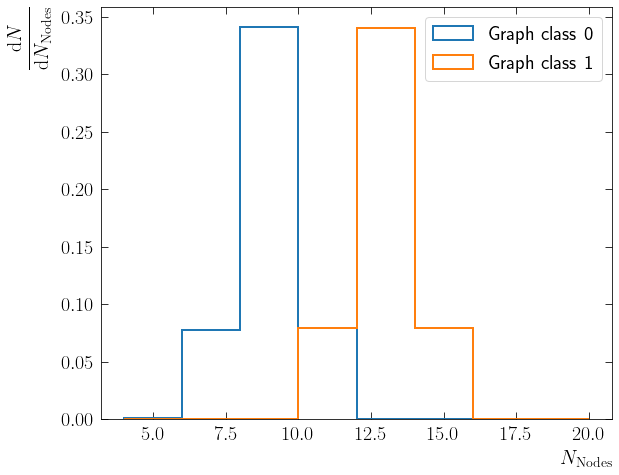

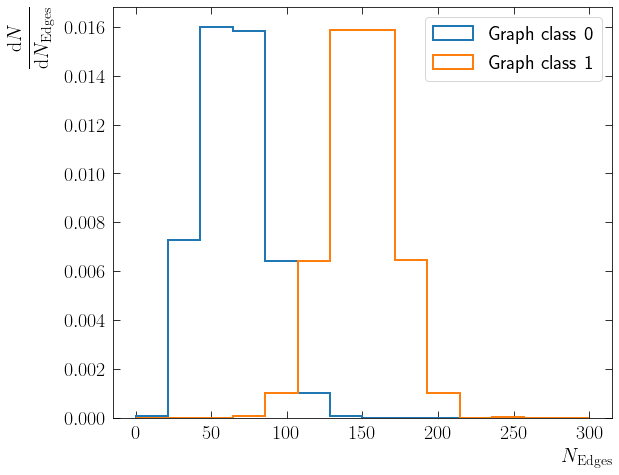

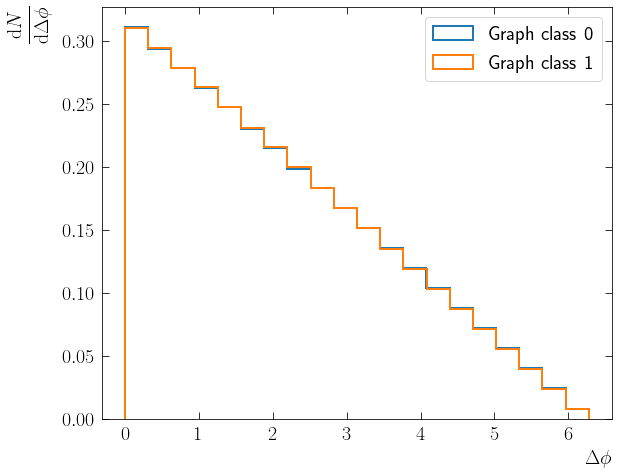

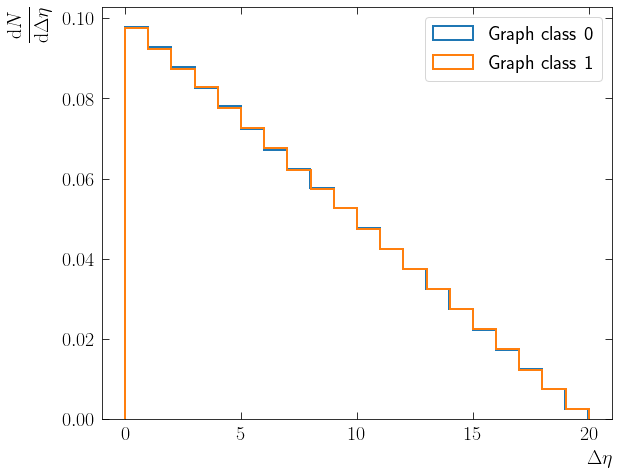

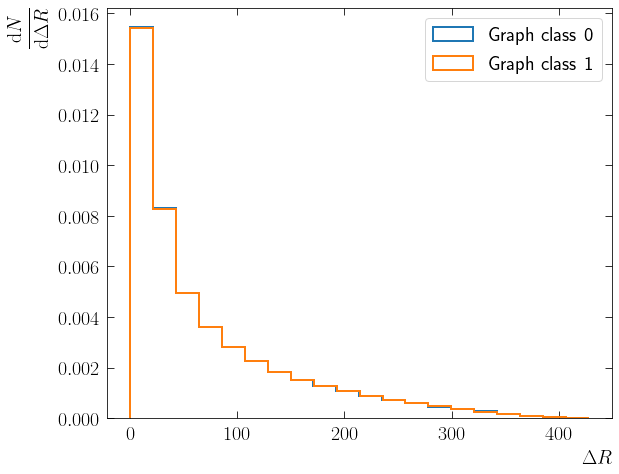

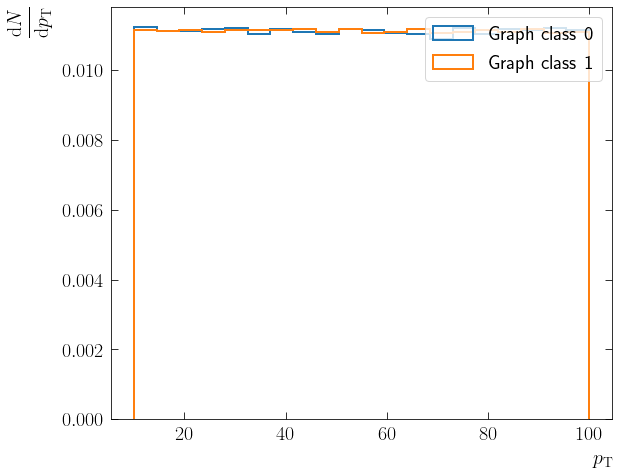

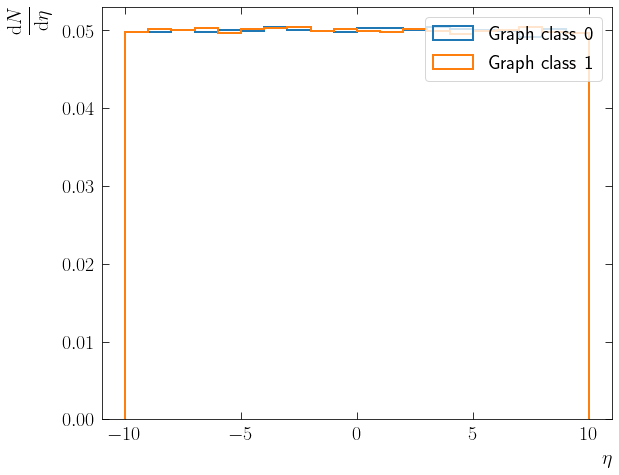

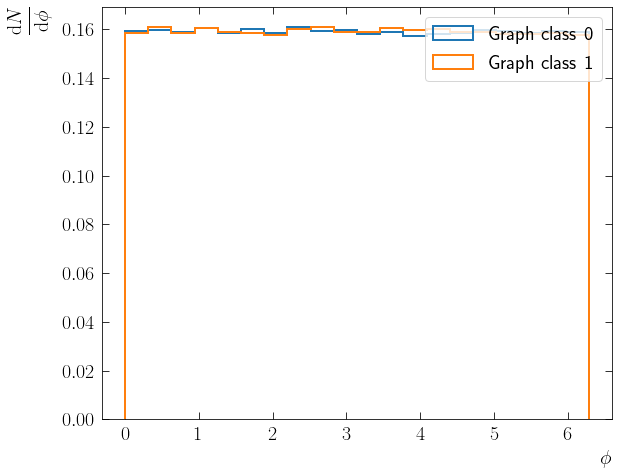

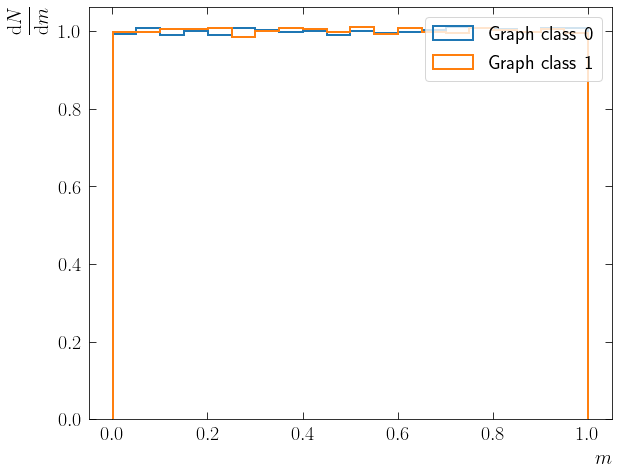

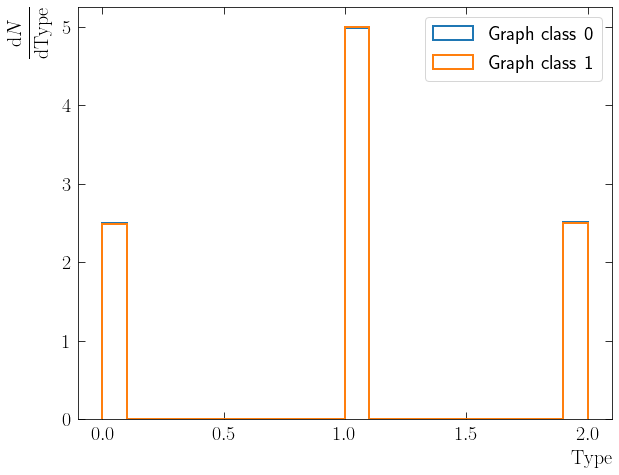

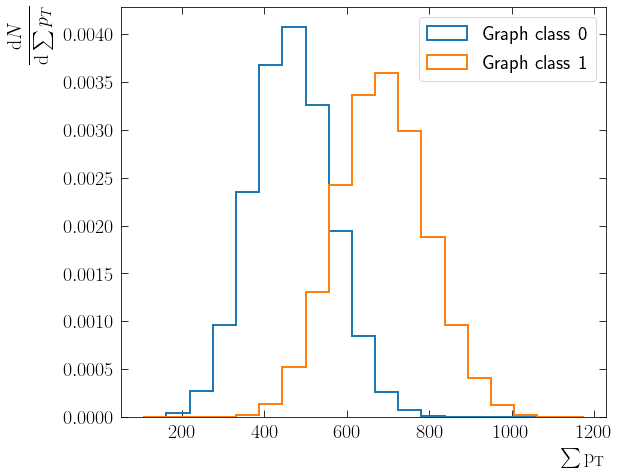

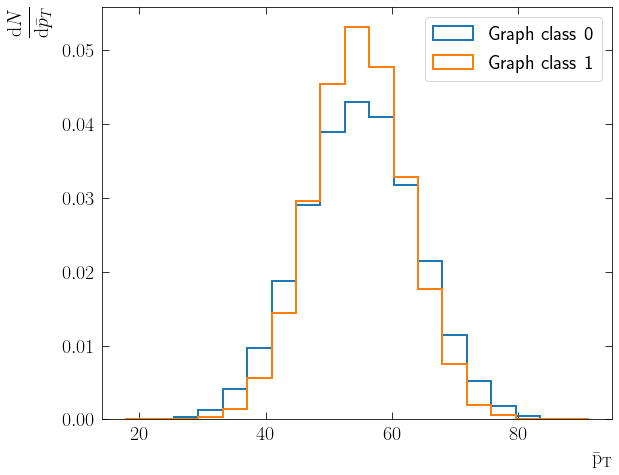

 22%|██▏       | 6/27 [04:43<16:31, 47.23s/it]

Done loading data from cached files.


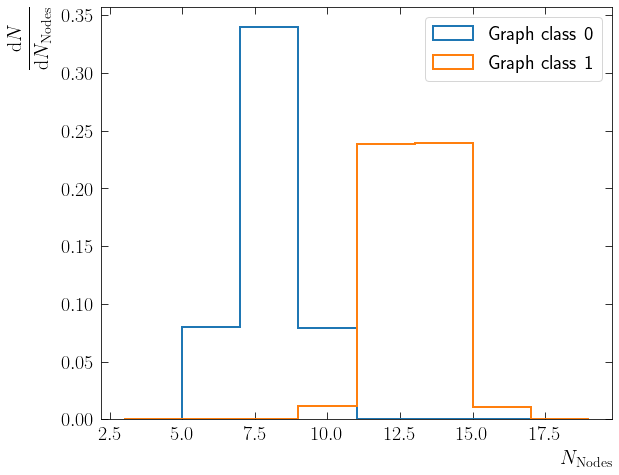

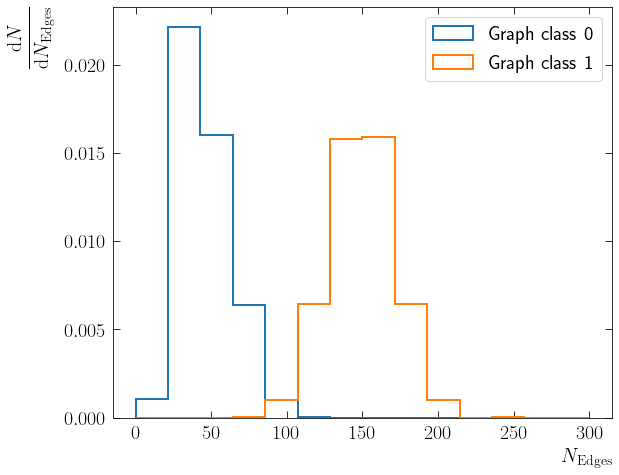

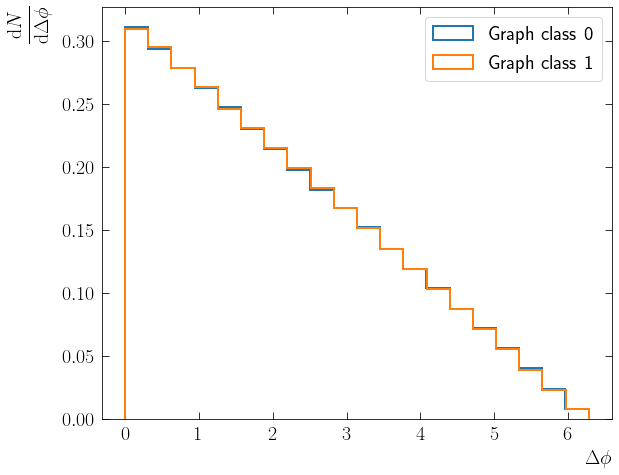

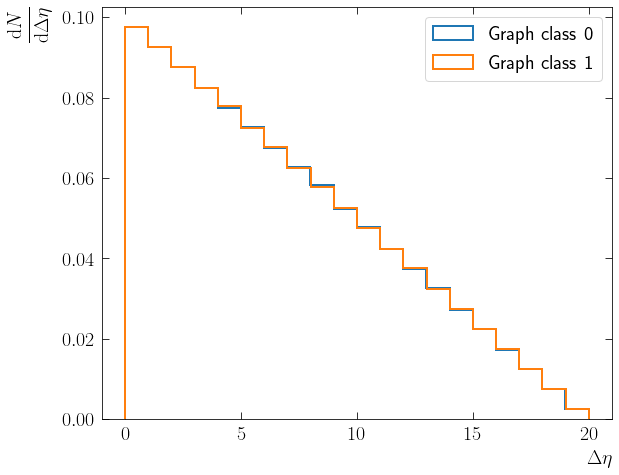

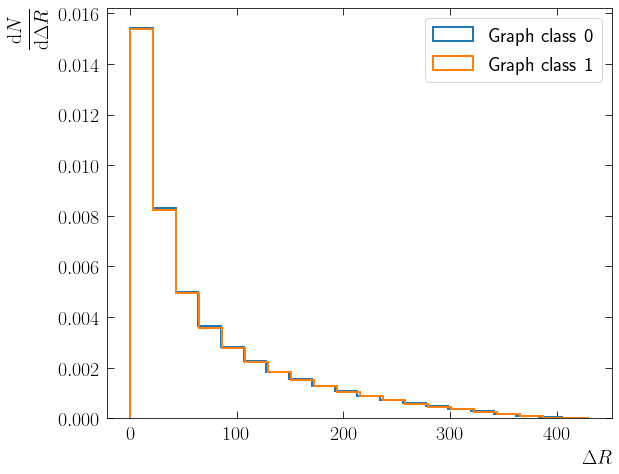

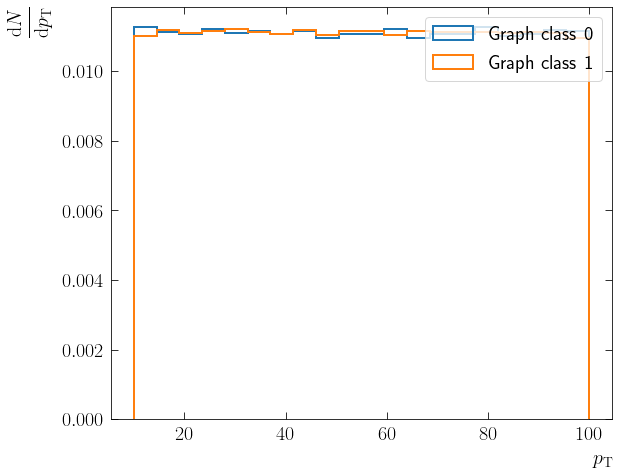

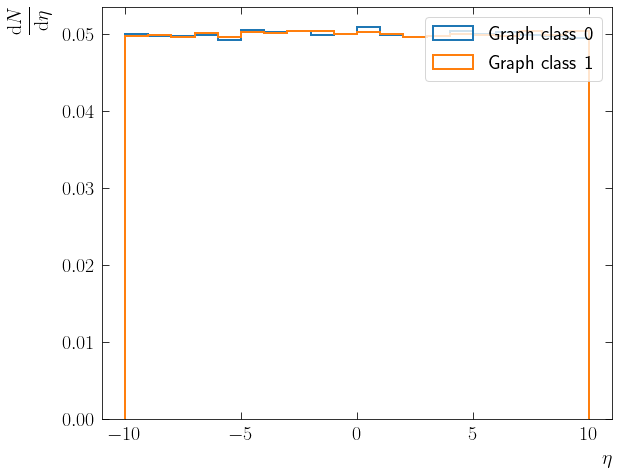

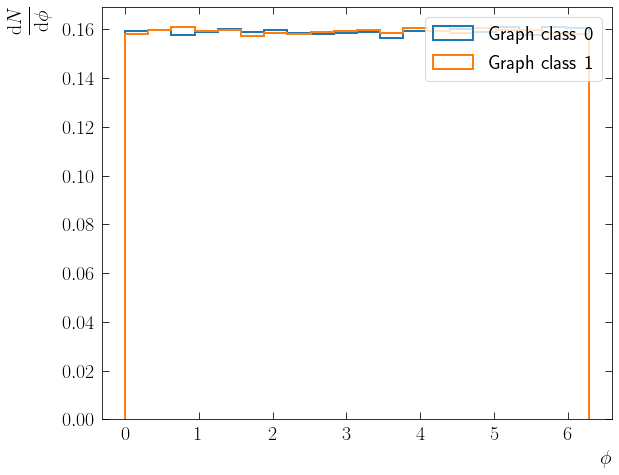

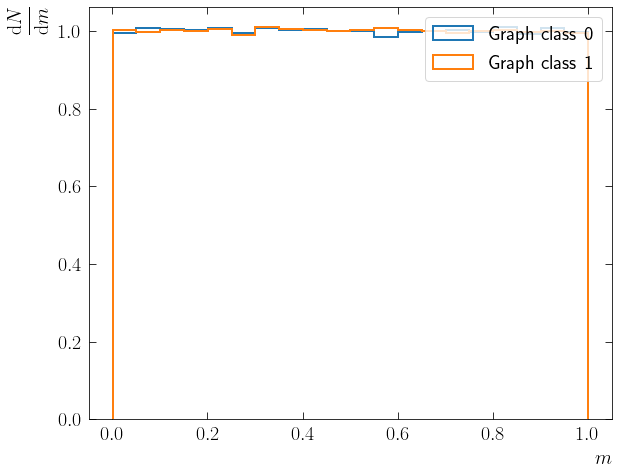

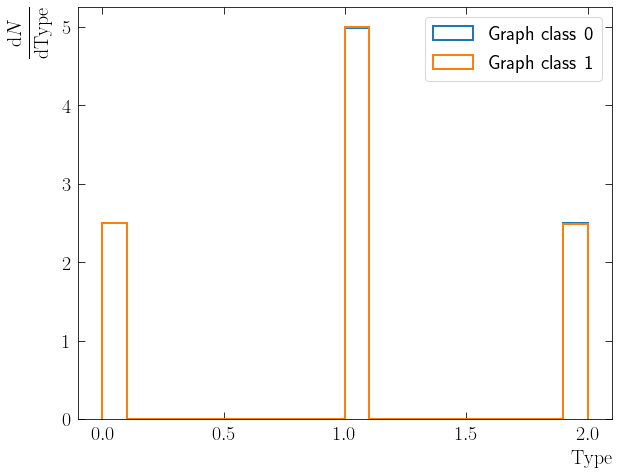

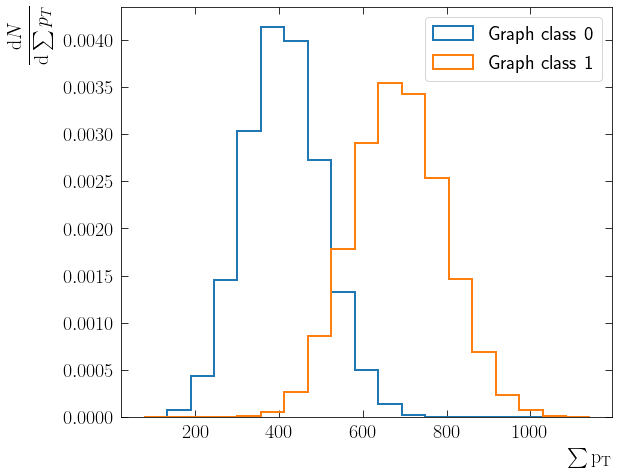

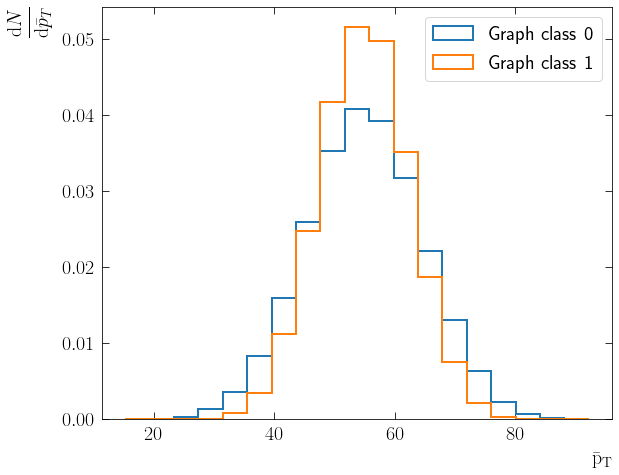

 26%|██▌       | 7/27 [05:30<15:42, 47.13s/it]

Done loading data from cached files.


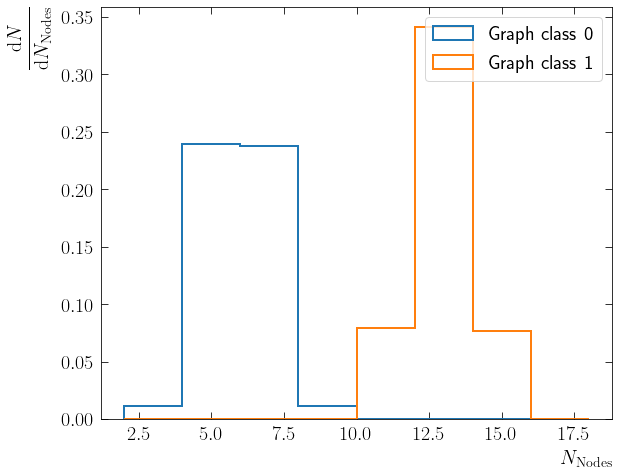

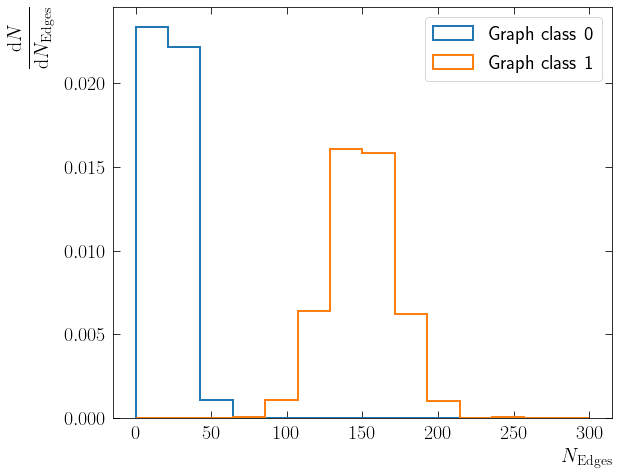

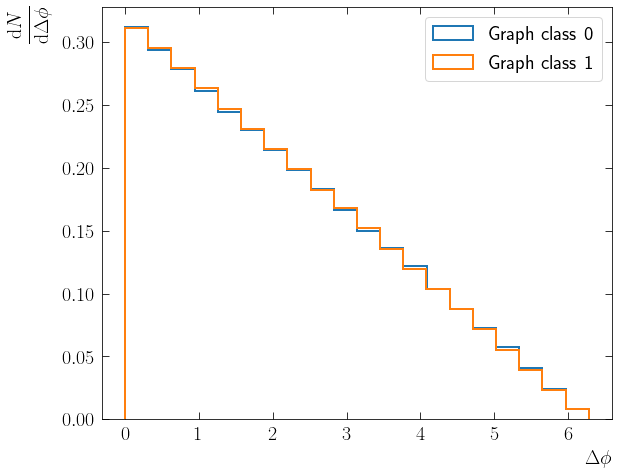

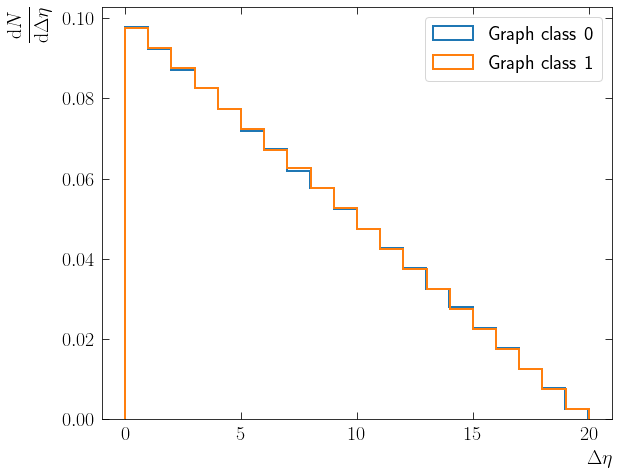

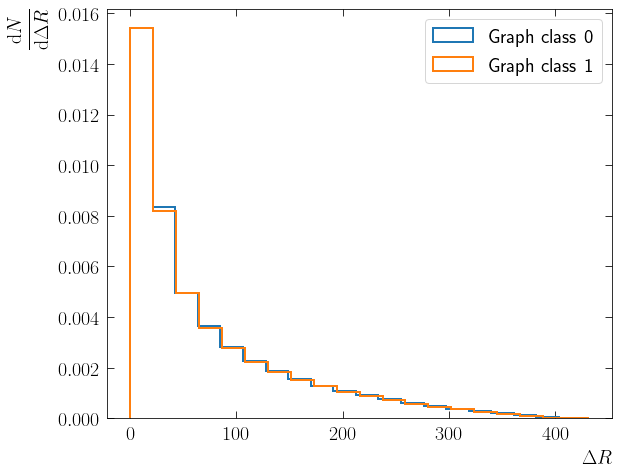

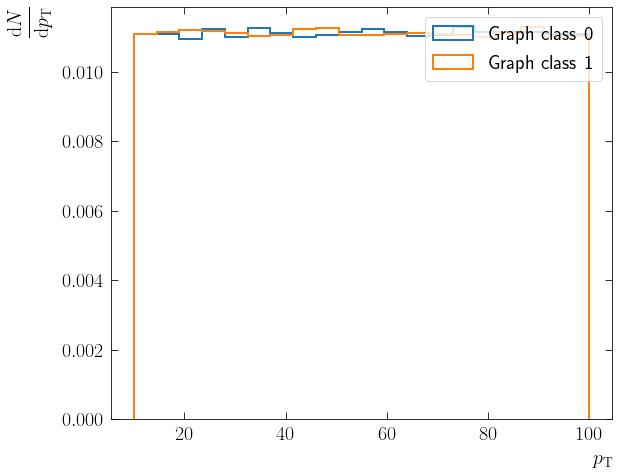

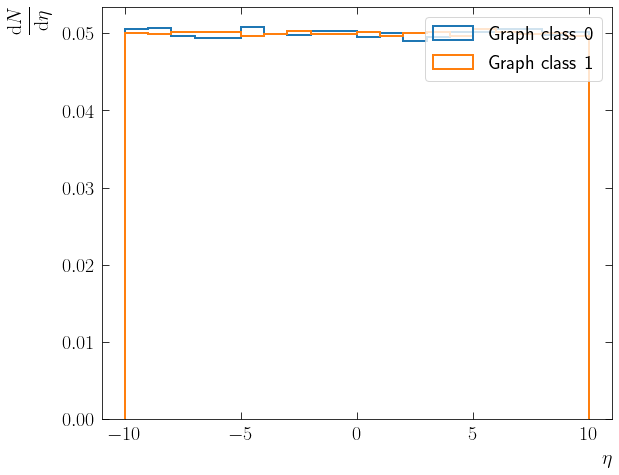

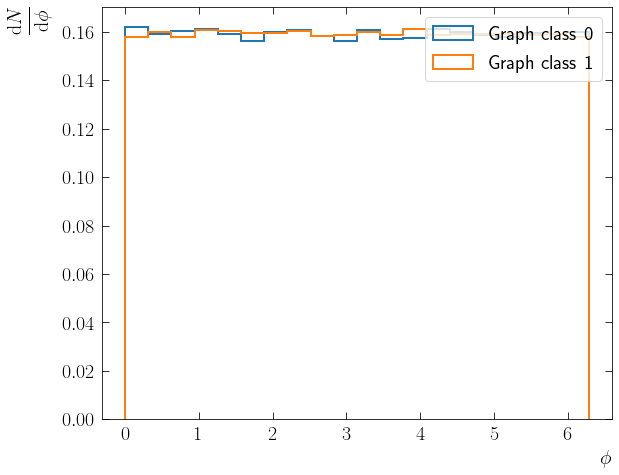

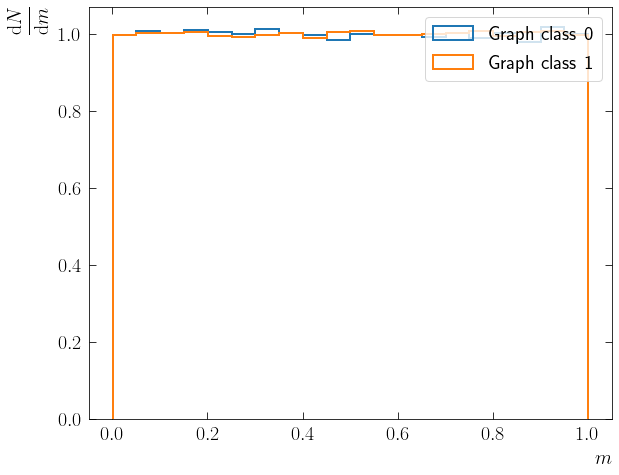

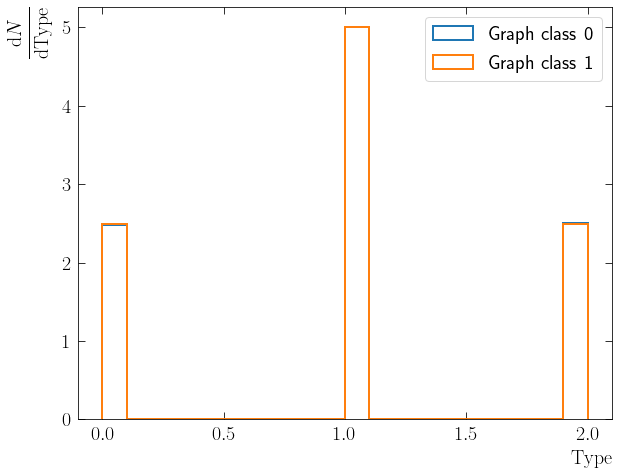

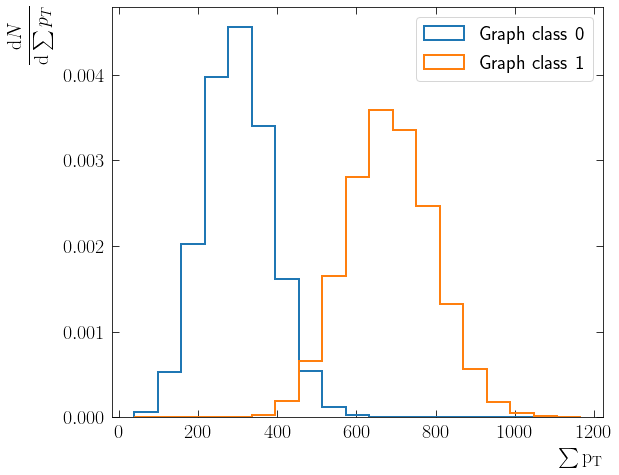

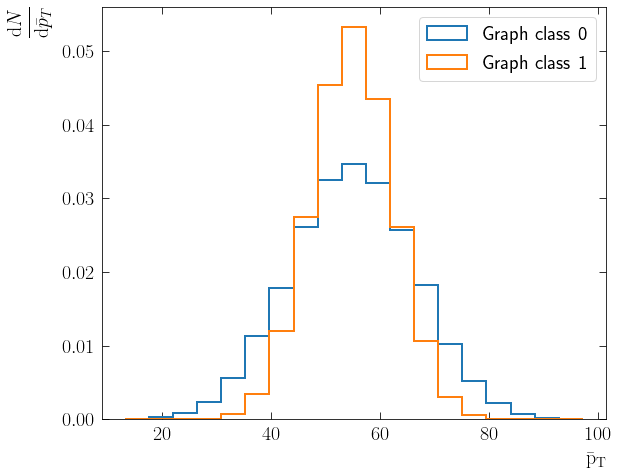

 30%|██▉       | 8/27 [06:14<14:38, 46.24s/it]

Done loading data from cached files.


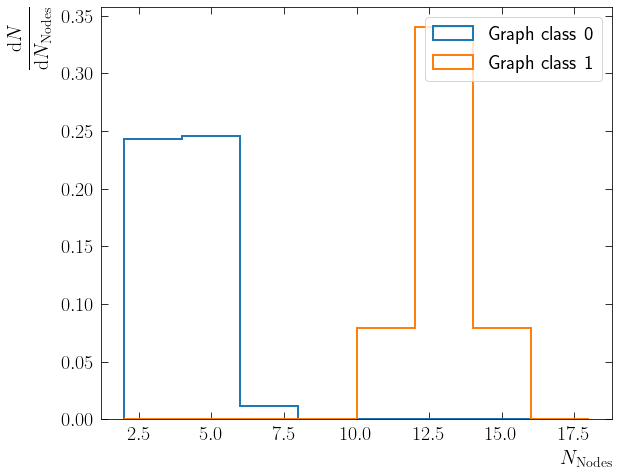

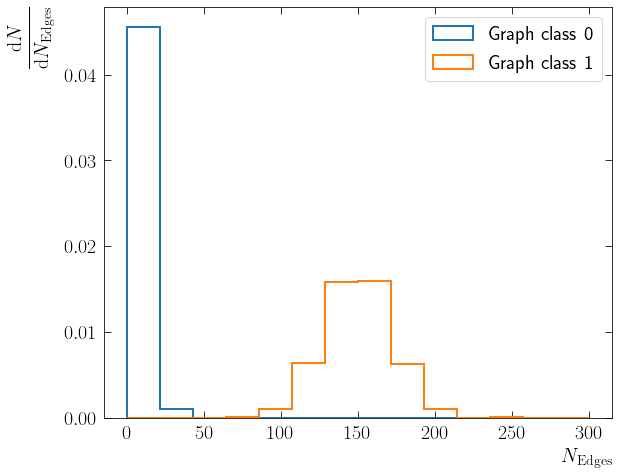

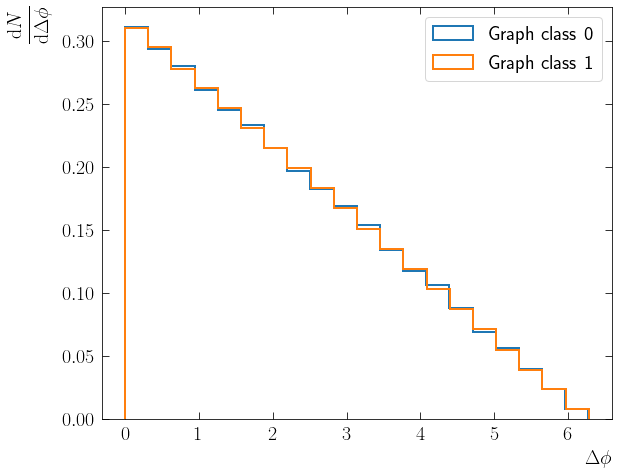

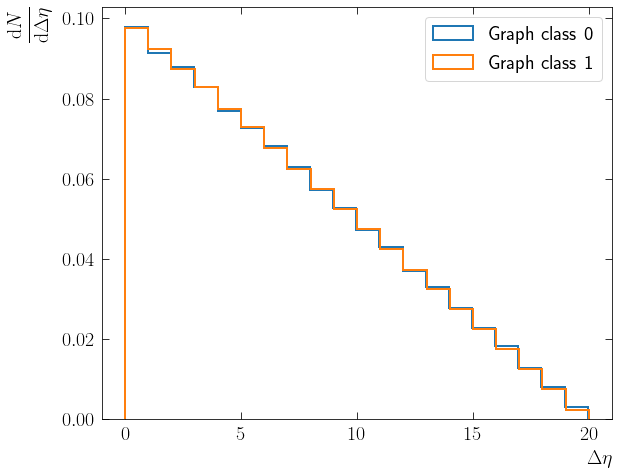

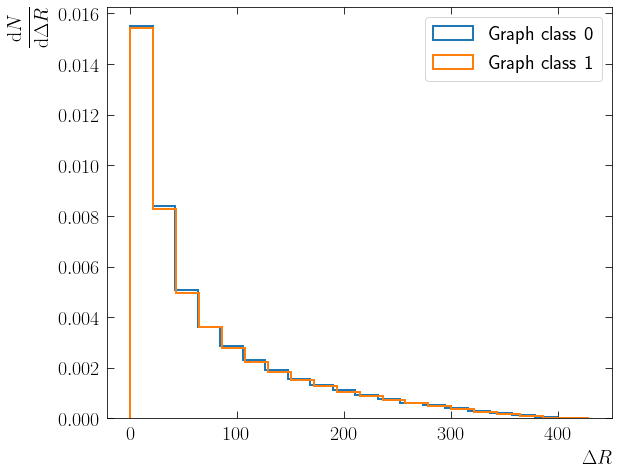

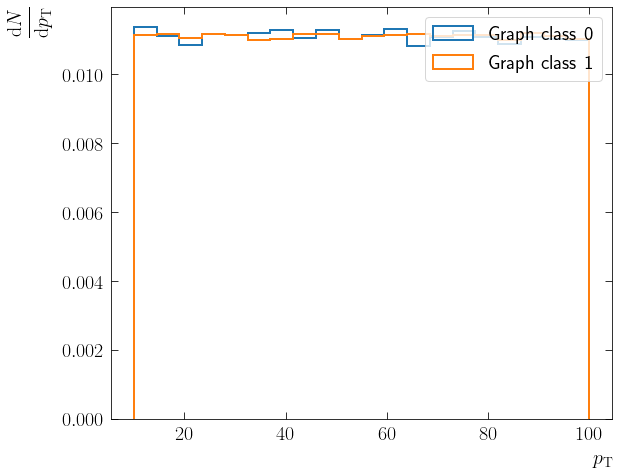

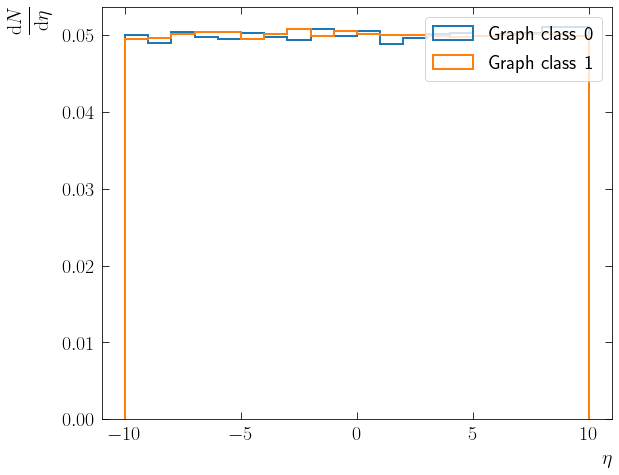

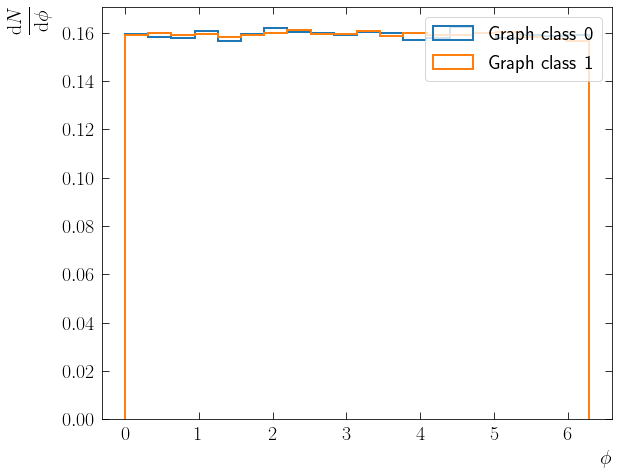

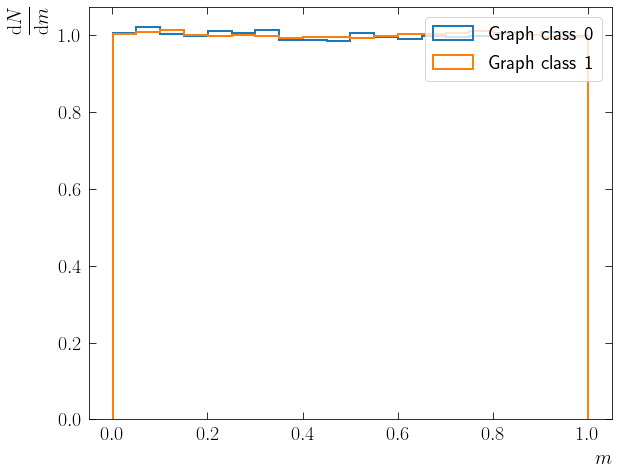

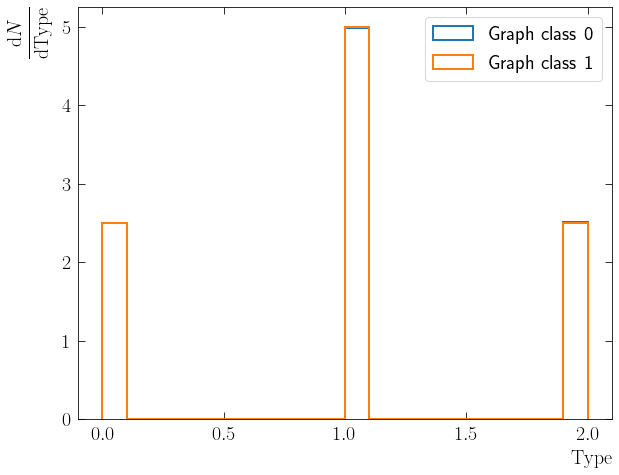

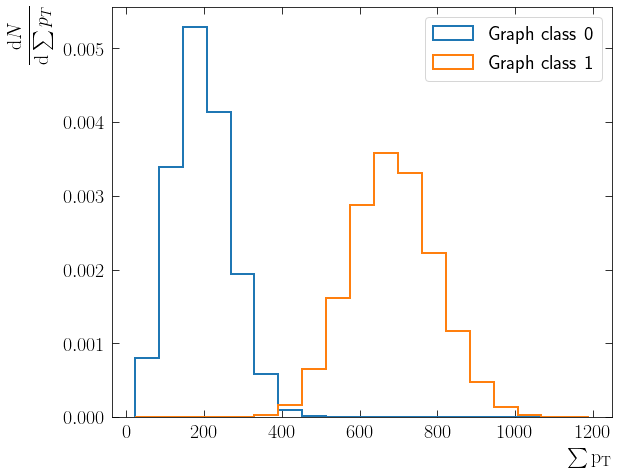

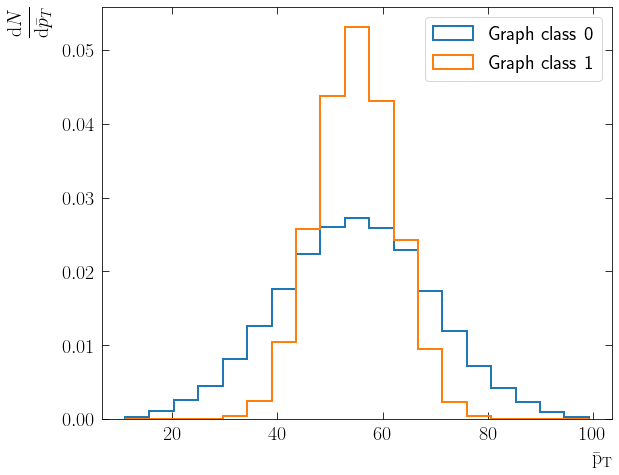

 33%|███▎      | 9/27 [07:00<13:47, 45.97s/it]

Done loading data from cached files.


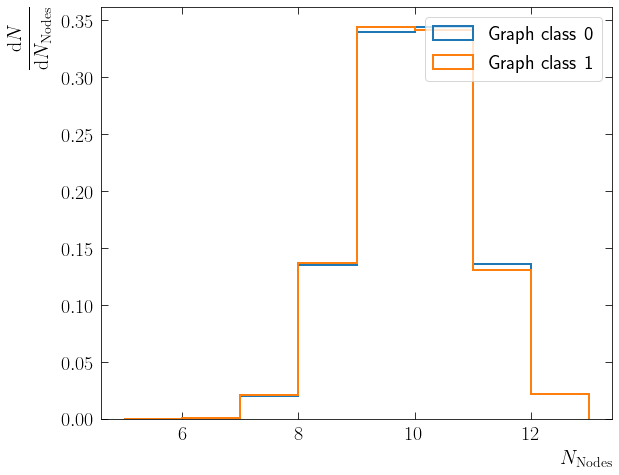

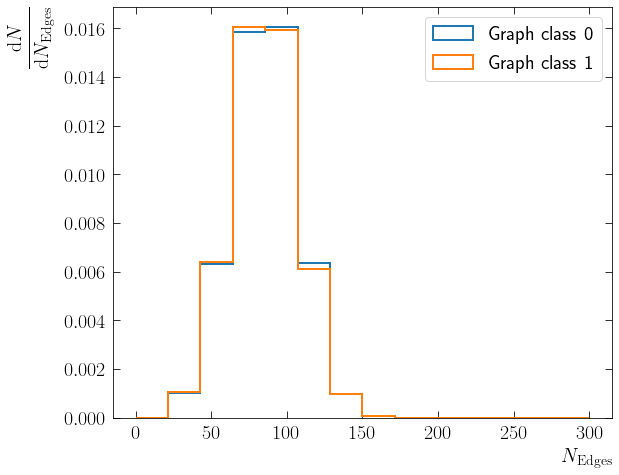

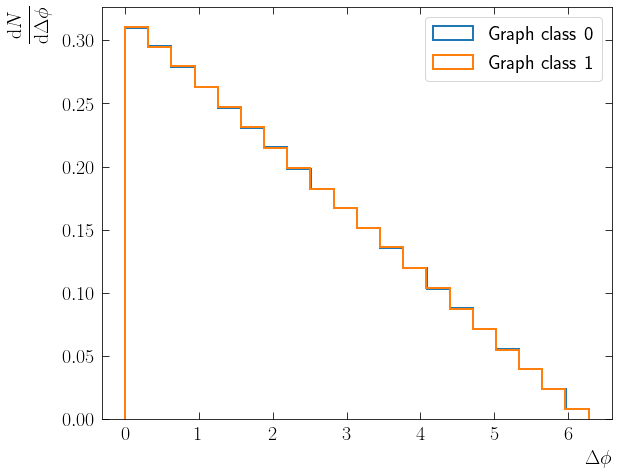

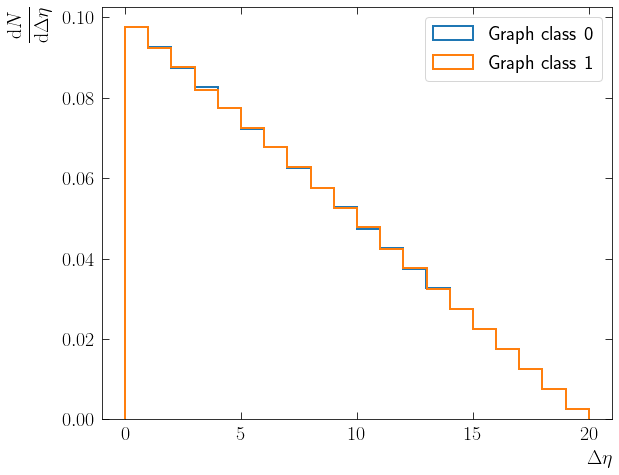

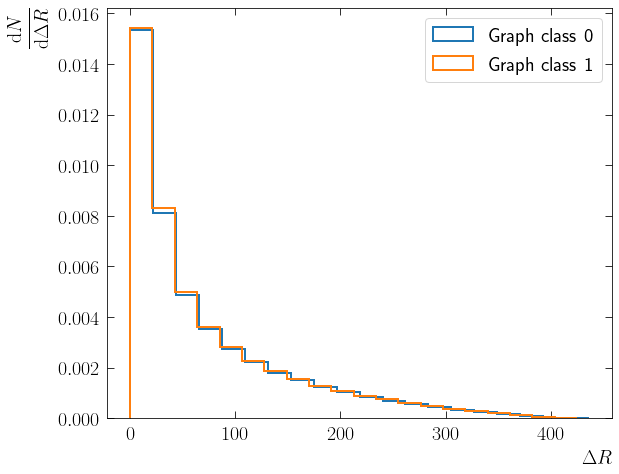

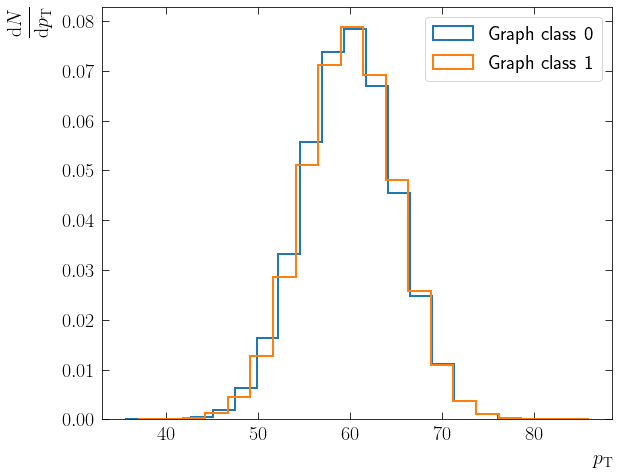

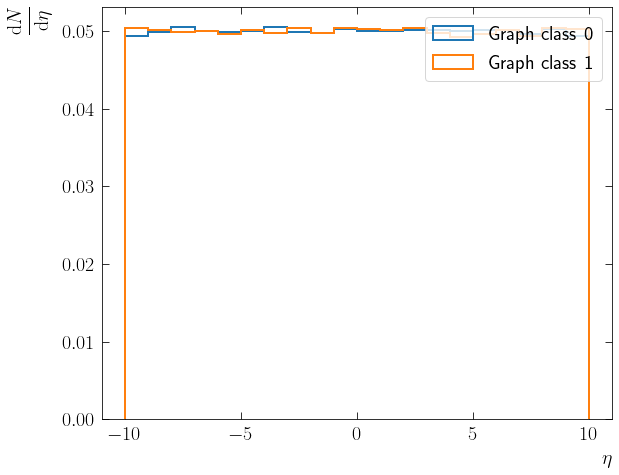

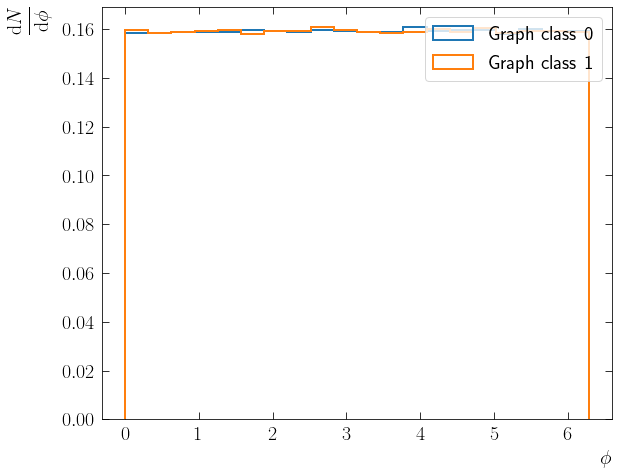

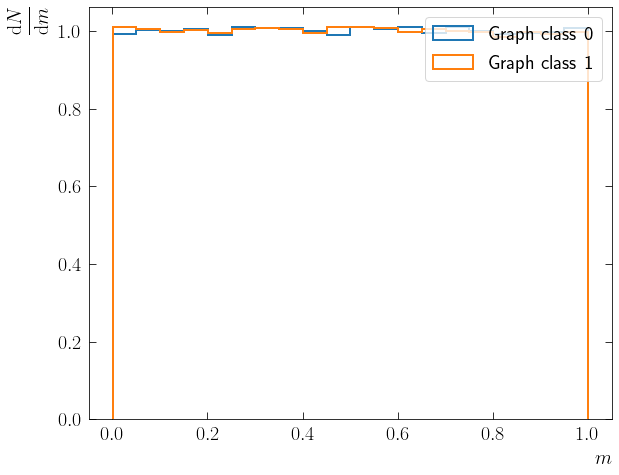

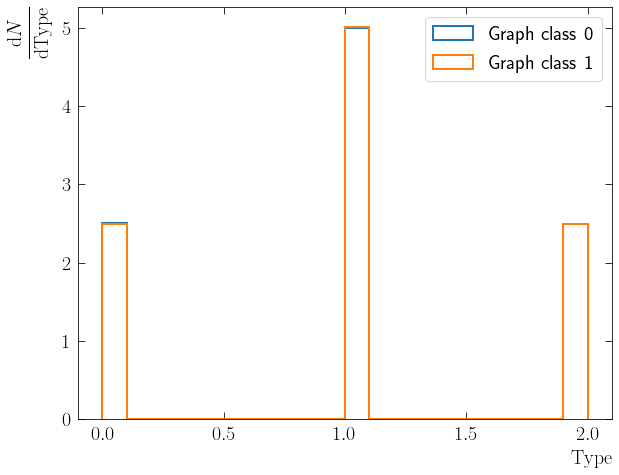

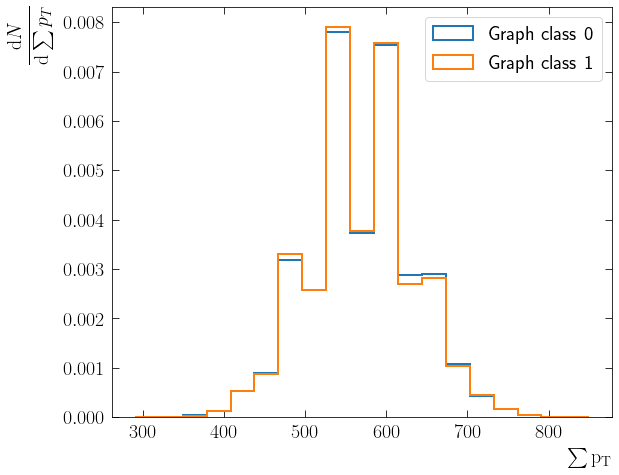

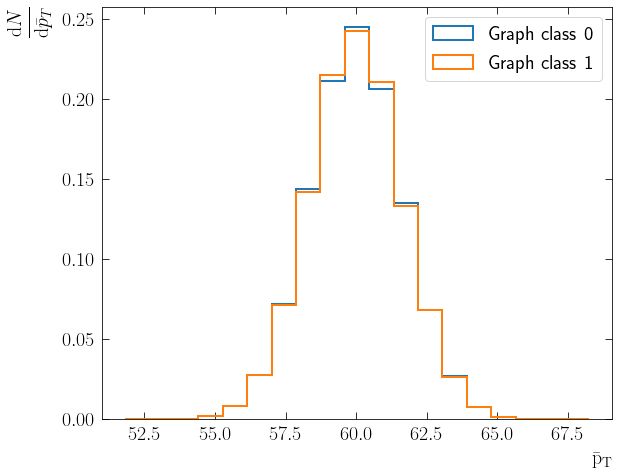

 37%|███▋      | 10/27 [07:49<13:18, 46.95s/it]

Done loading data from cached files.


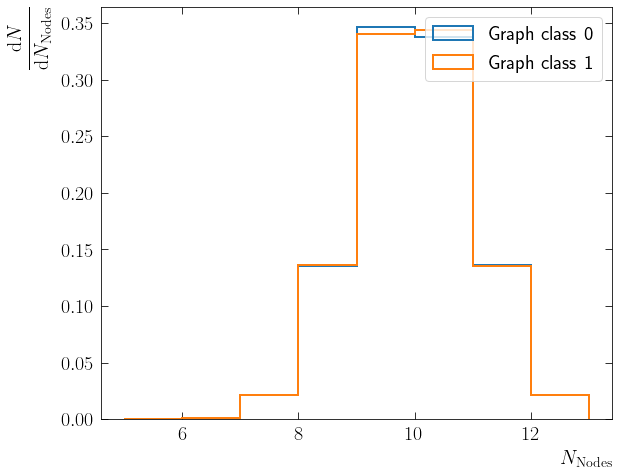

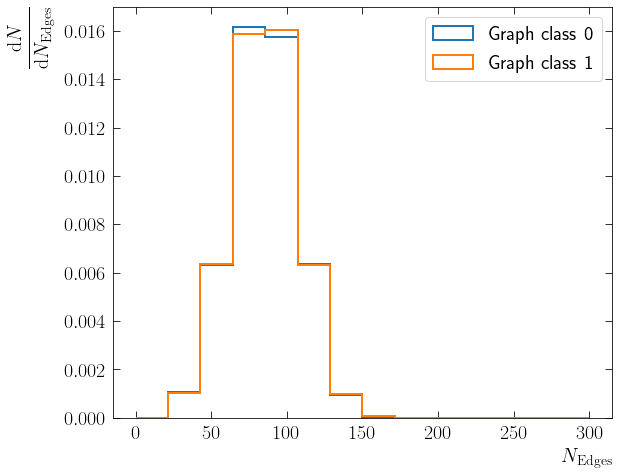

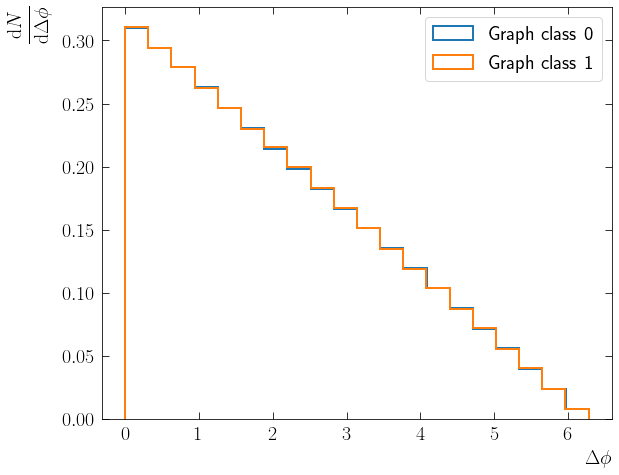

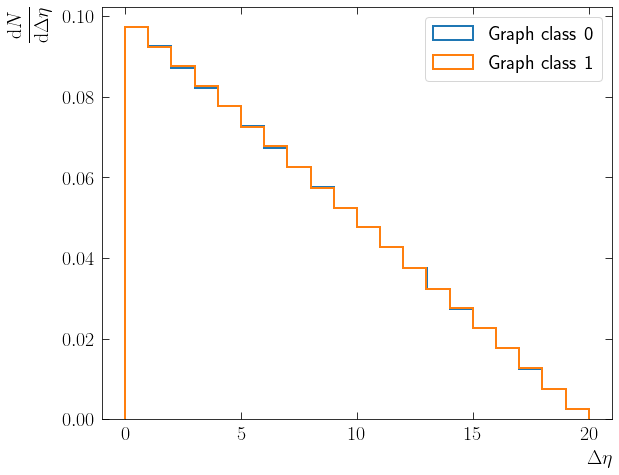

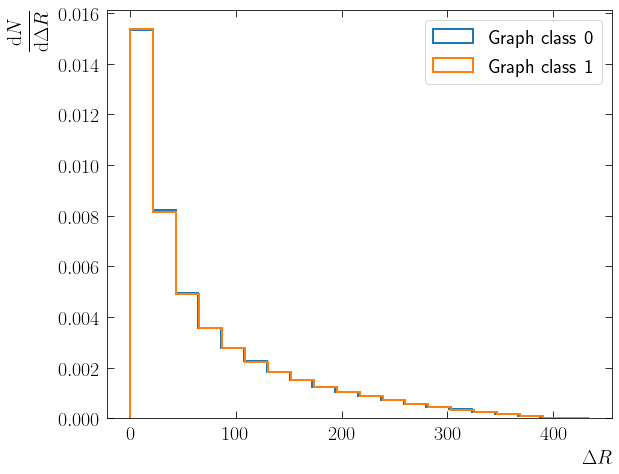

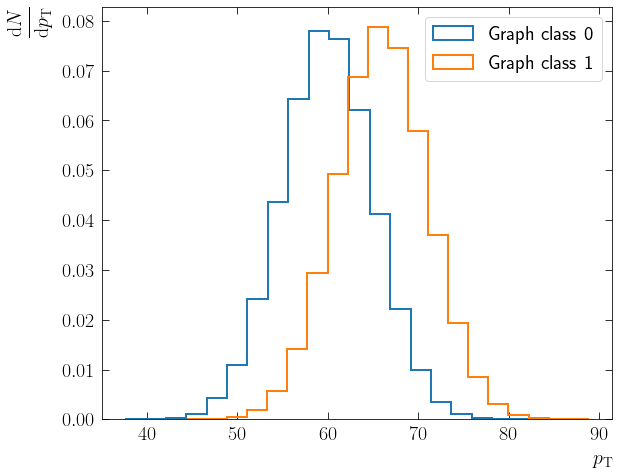

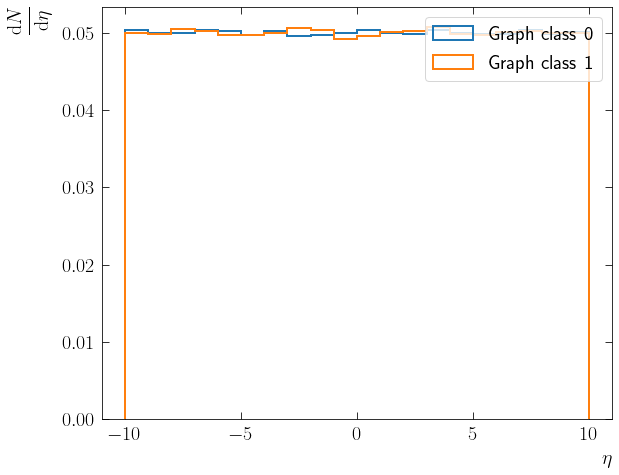

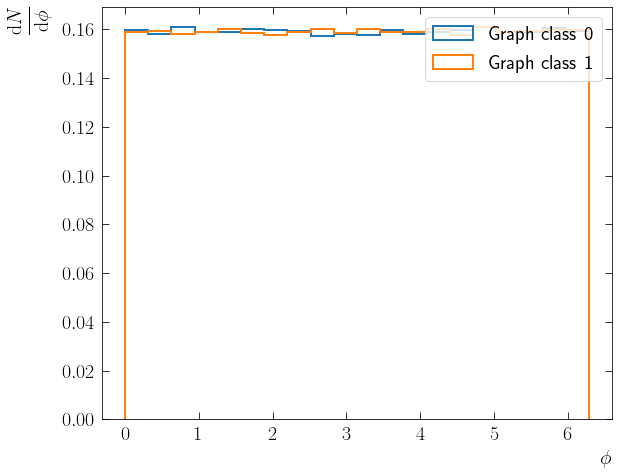

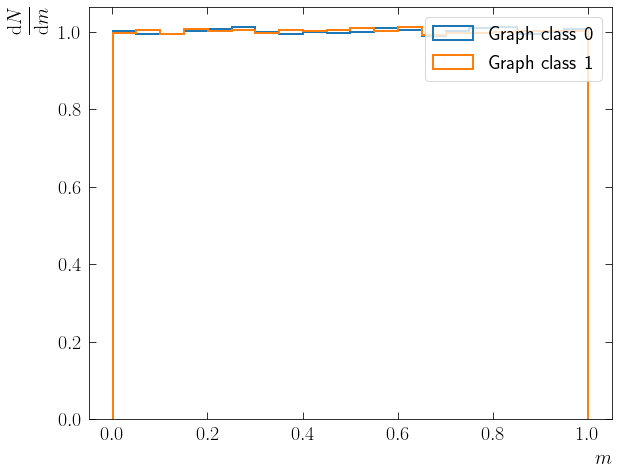

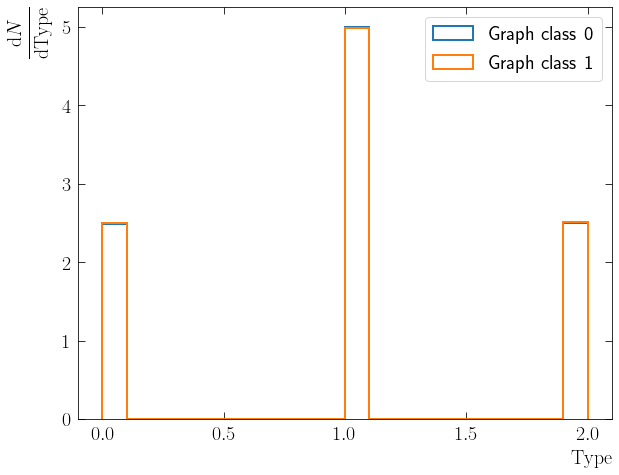

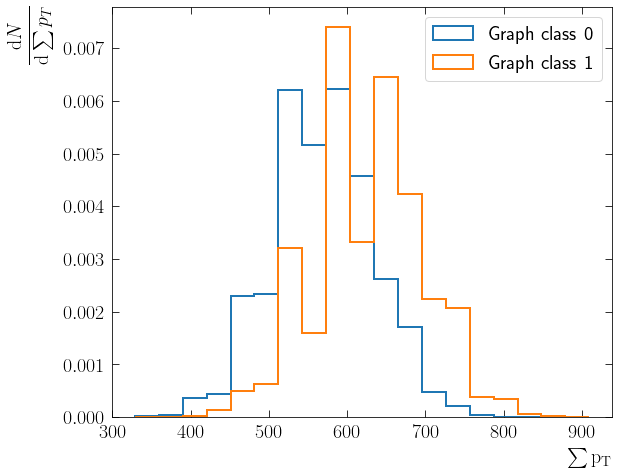

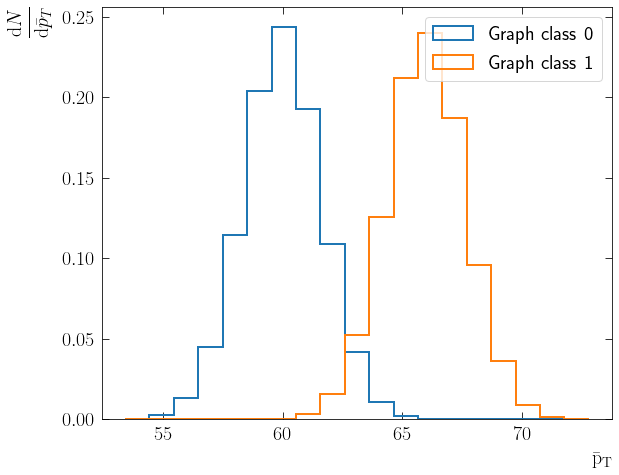

 41%|████      | 11/27 [08:36<12:34, 47.13s/it]

Done loading data from cached files.


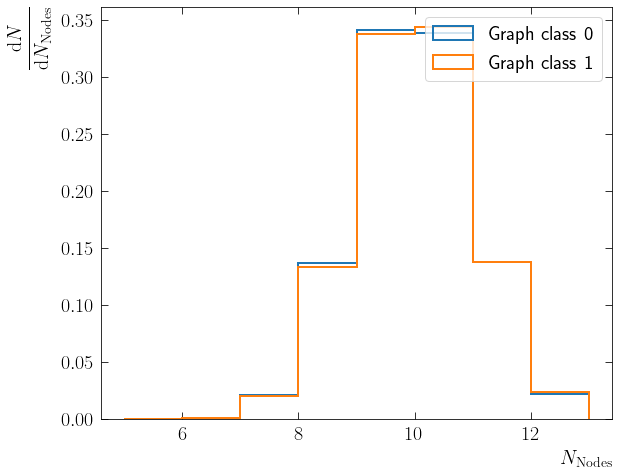

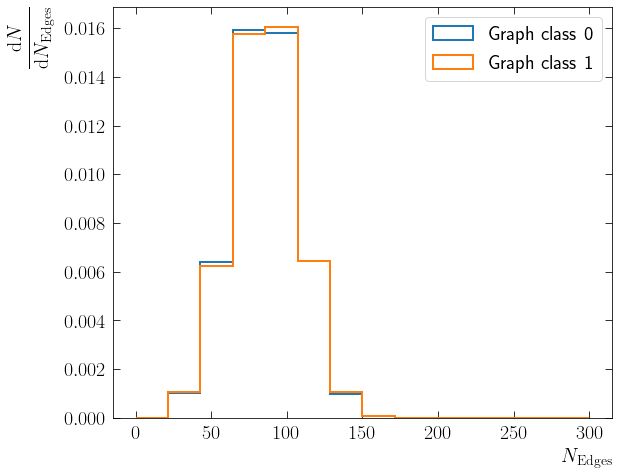

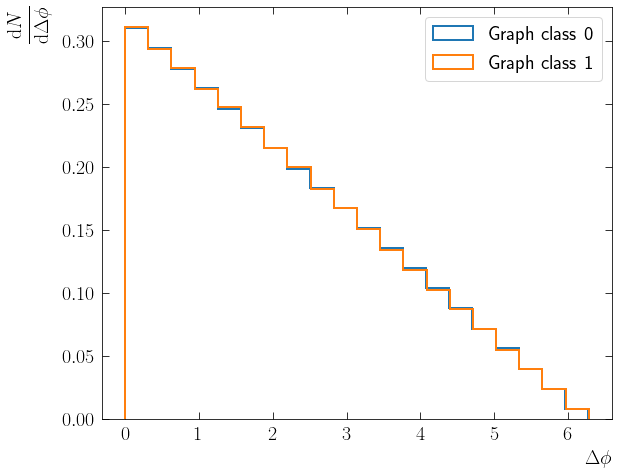

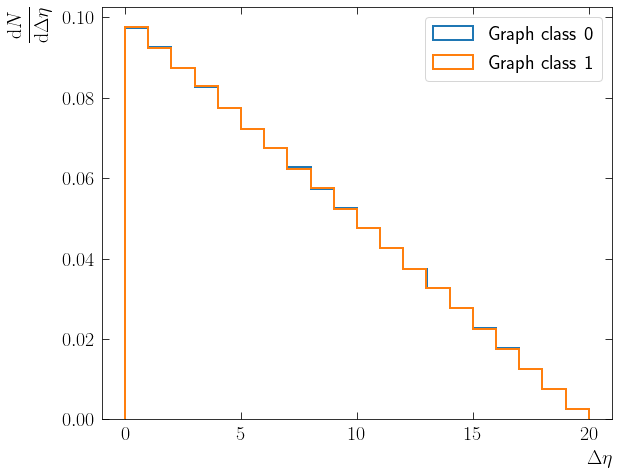

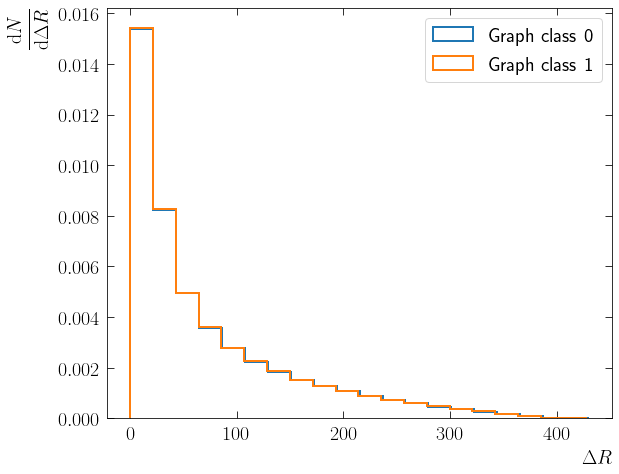

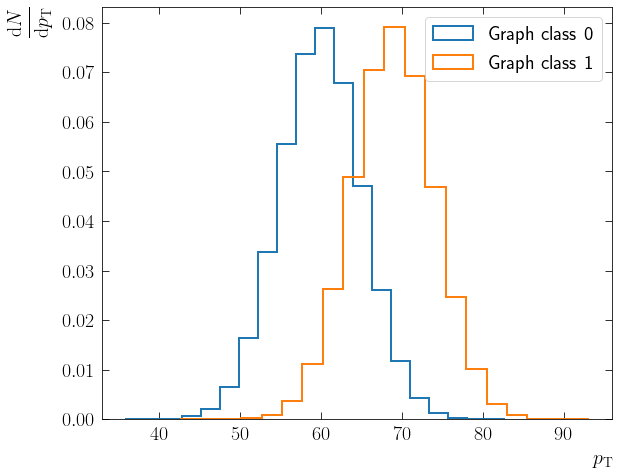

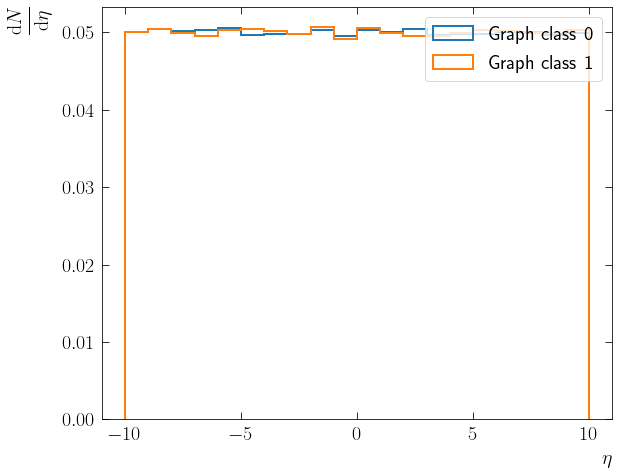

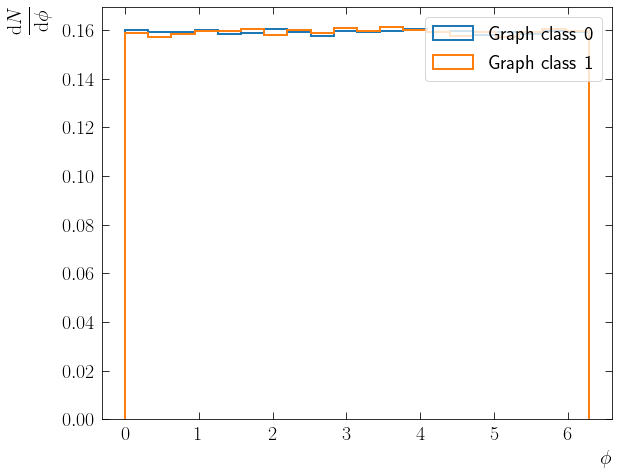

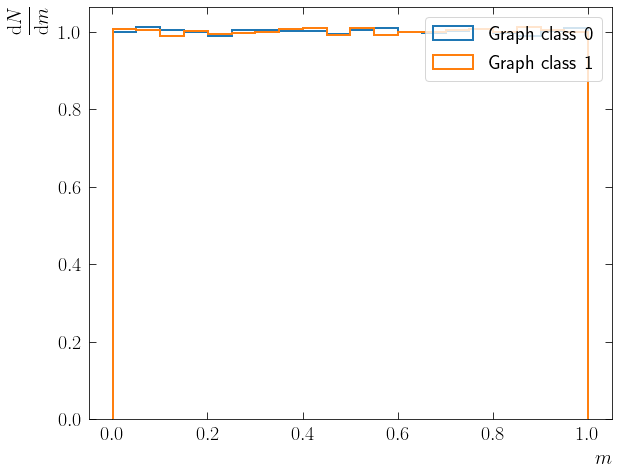

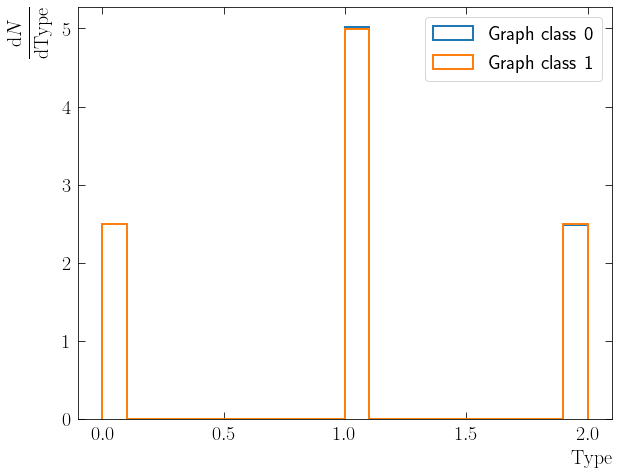

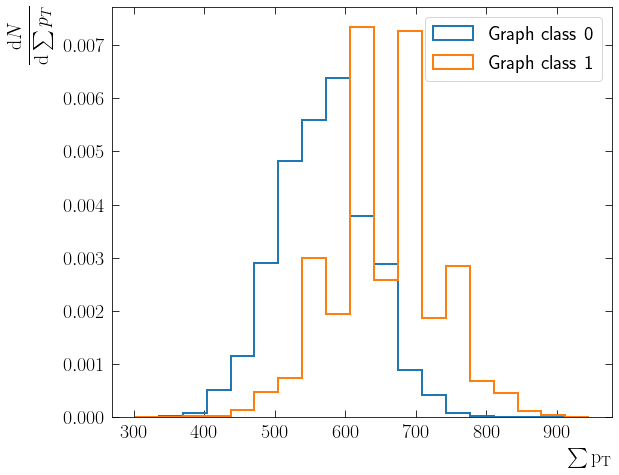

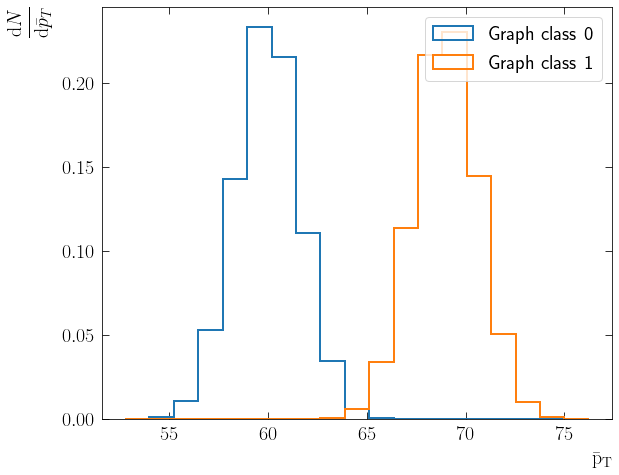

 44%|████▍     | 12/27 [09:24<11:48, 47.21s/it]

Done loading data from cached files.


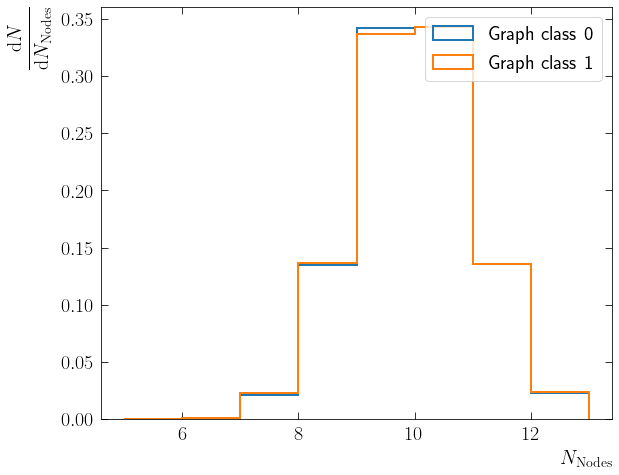

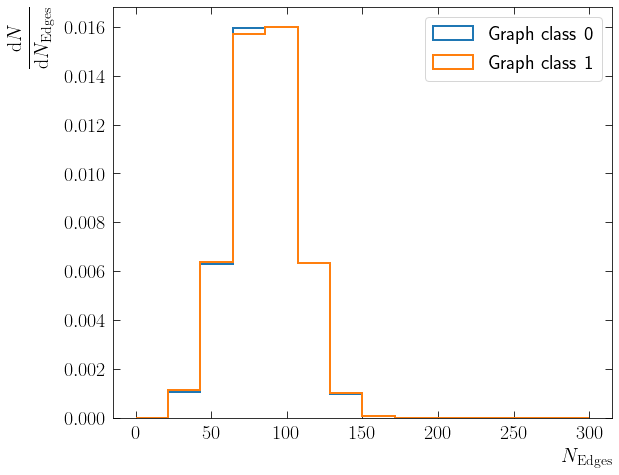

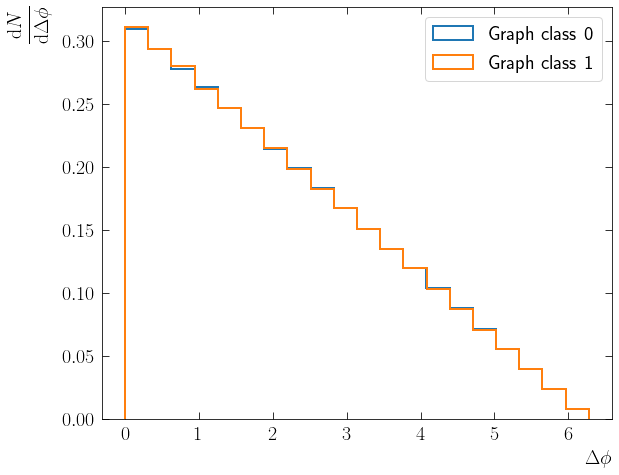

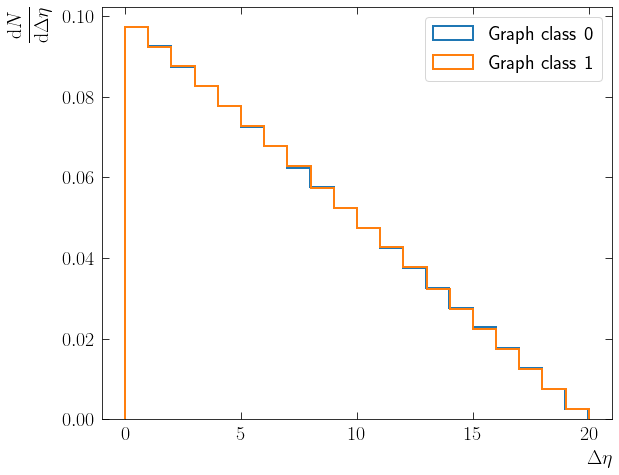

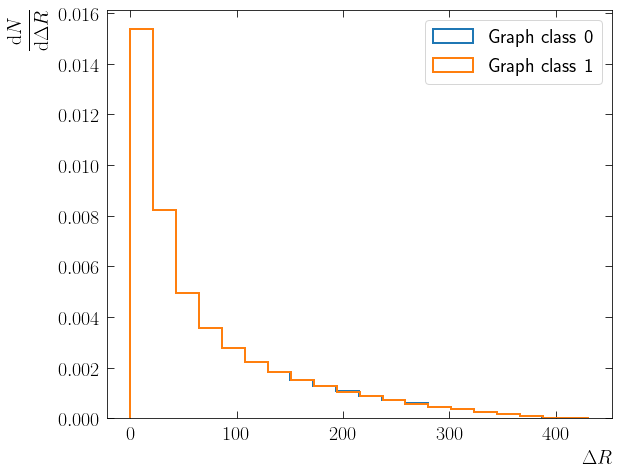

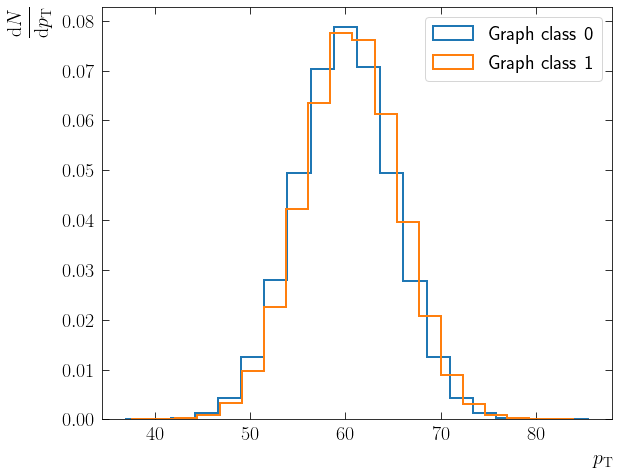

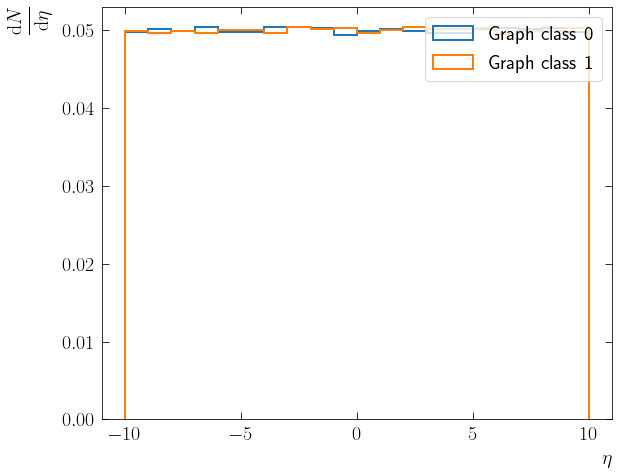

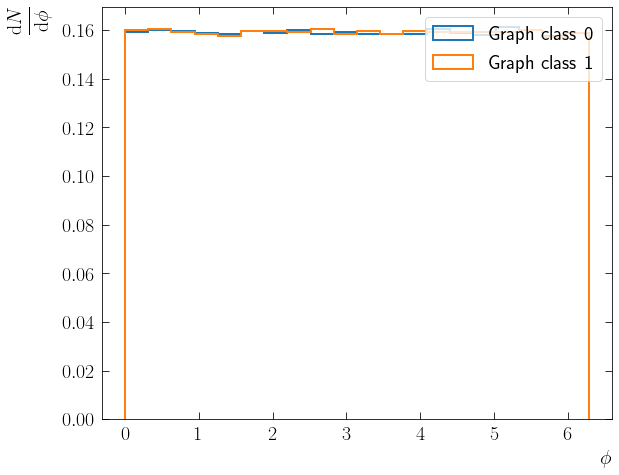

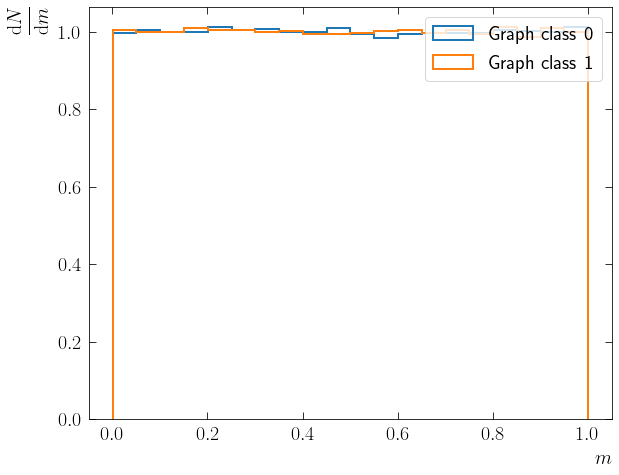

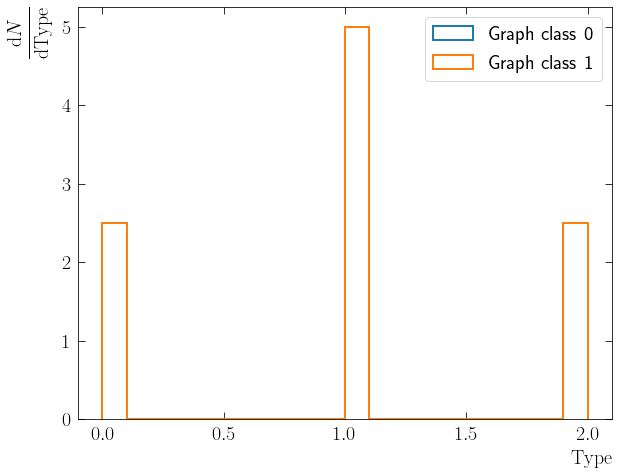

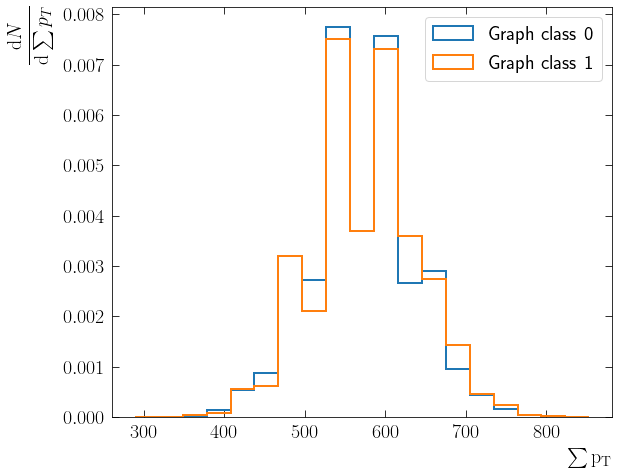

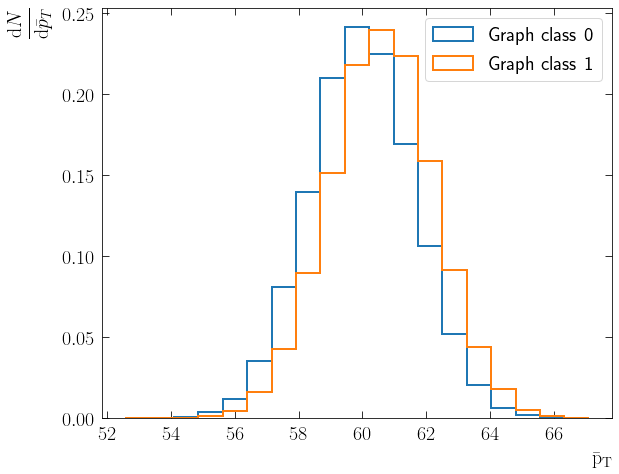

 48%|████▊     | 13/27 [10:12<11:04, 47.48s/it]

Done loading data from cached files.


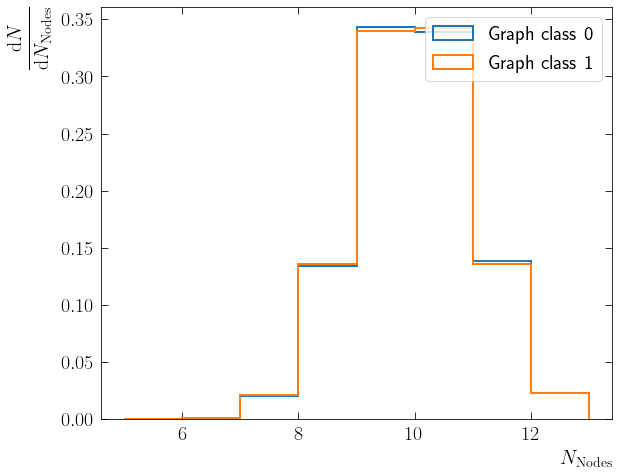

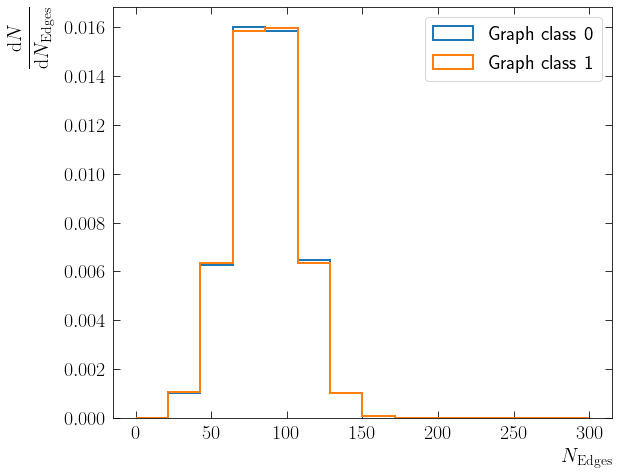

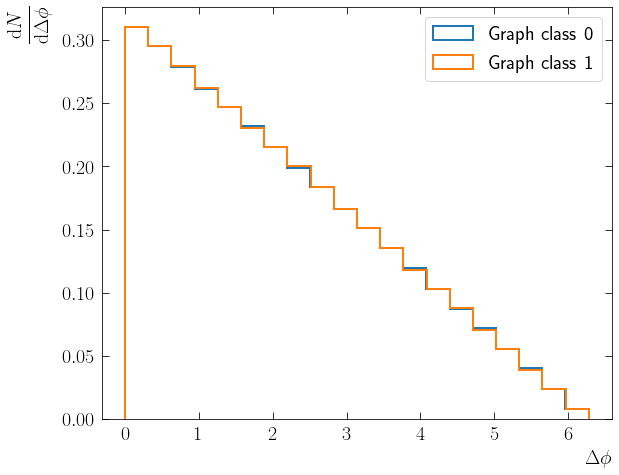

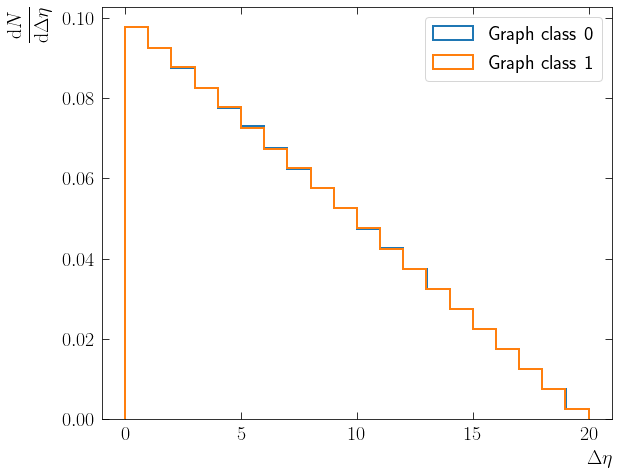

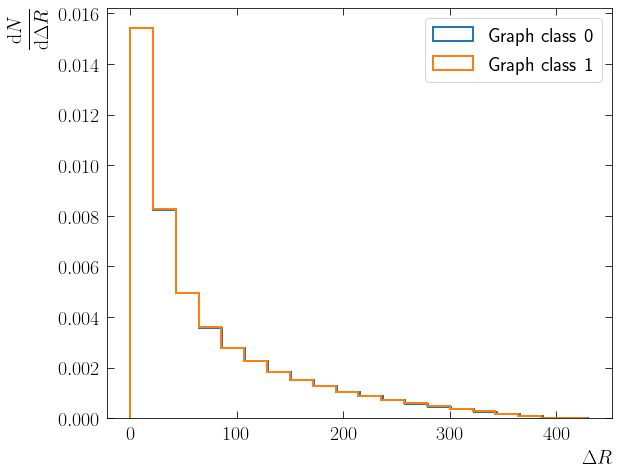

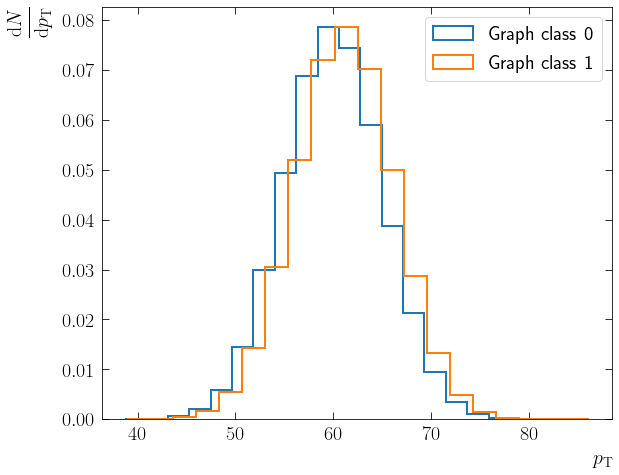

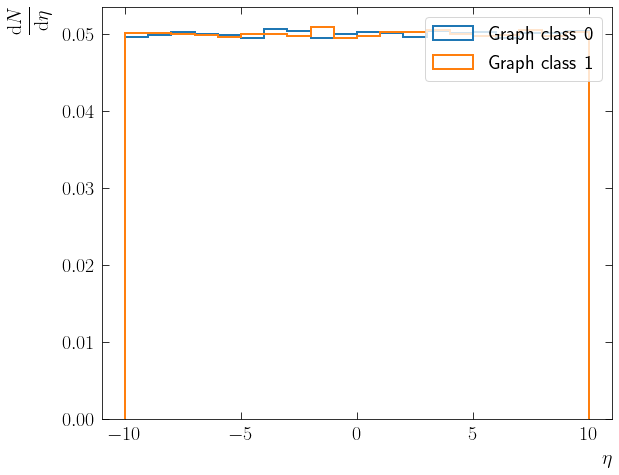

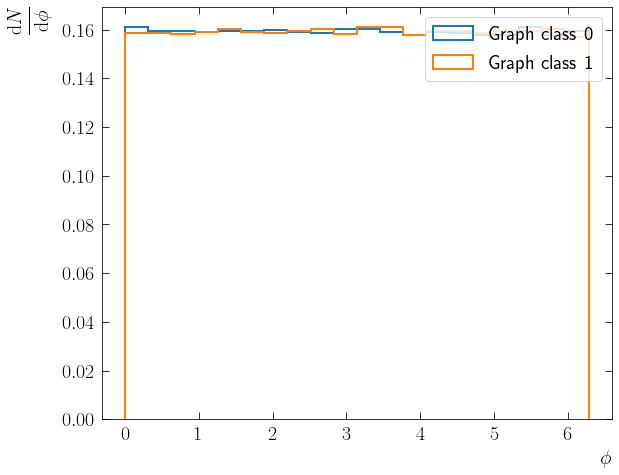

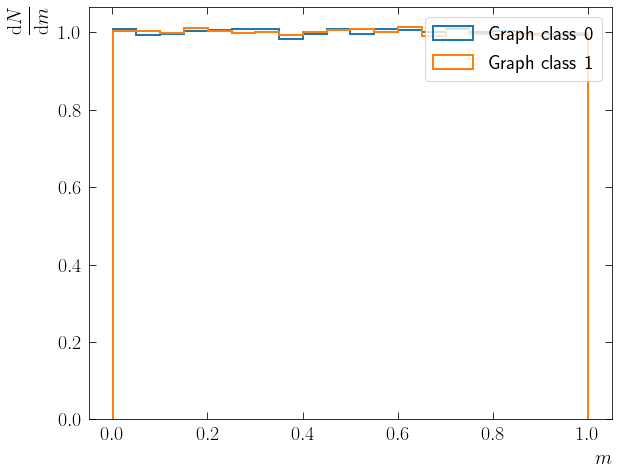

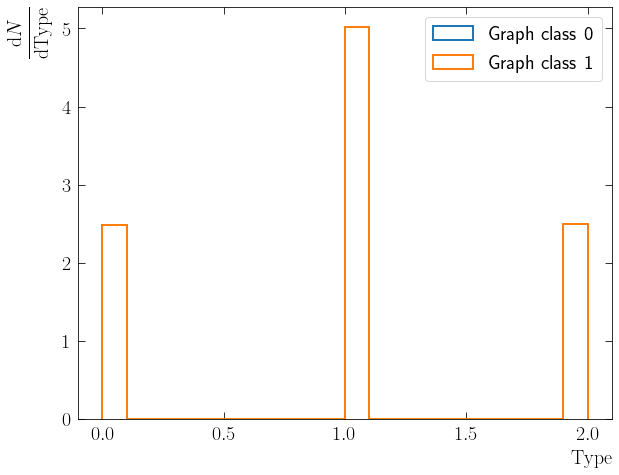

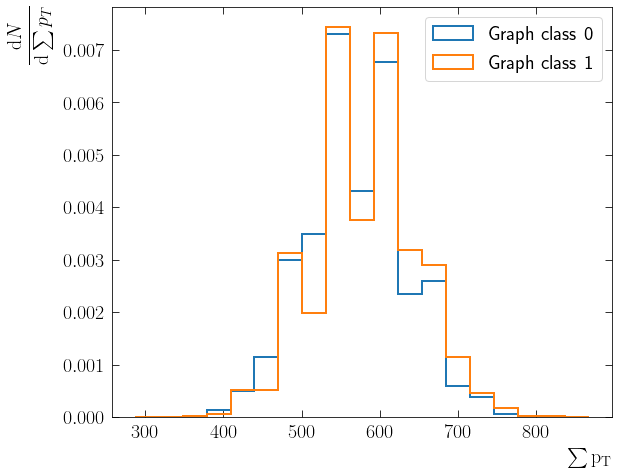

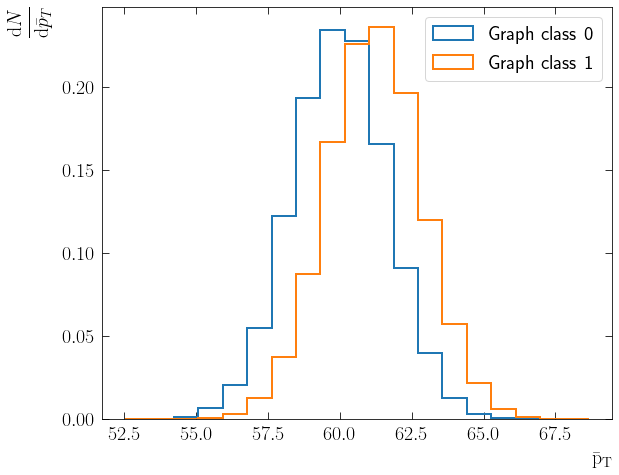

 52%|█████▏    | 14/27 [10:57<10:07, 46.72s/it]

Done loading data from cached files.


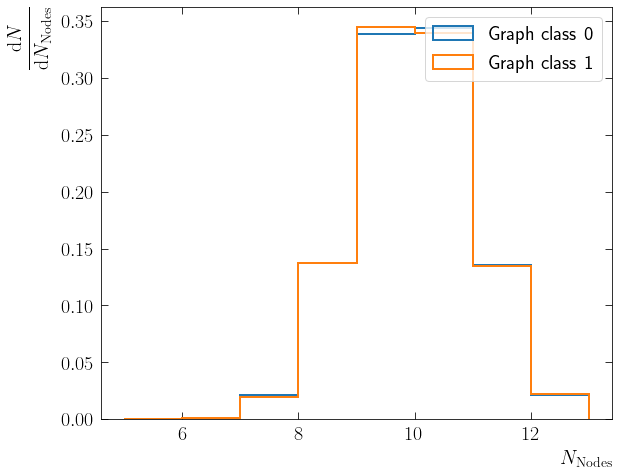

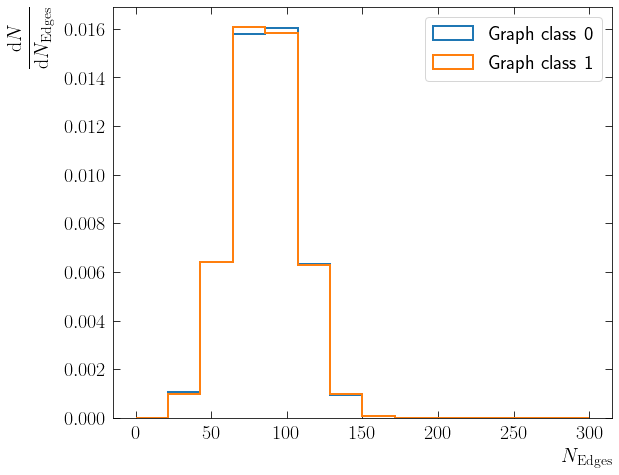

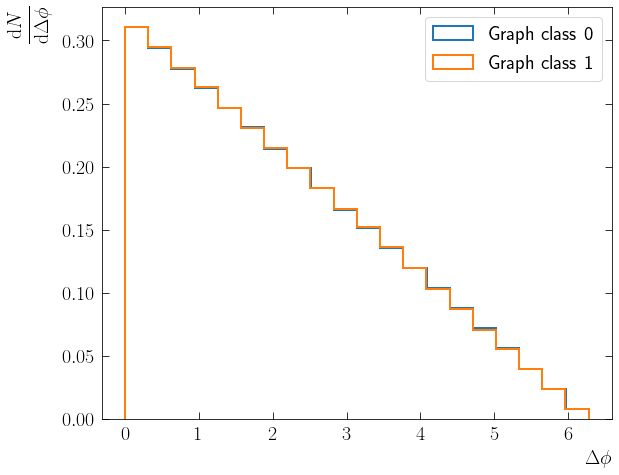

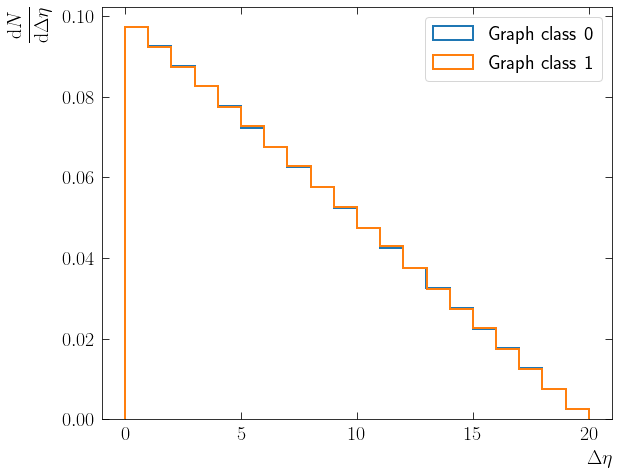

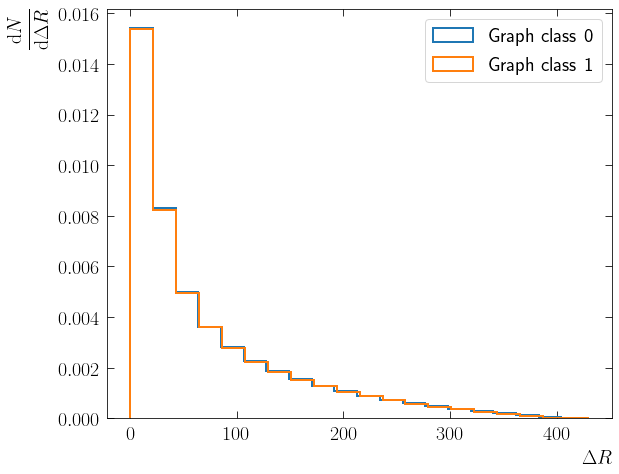

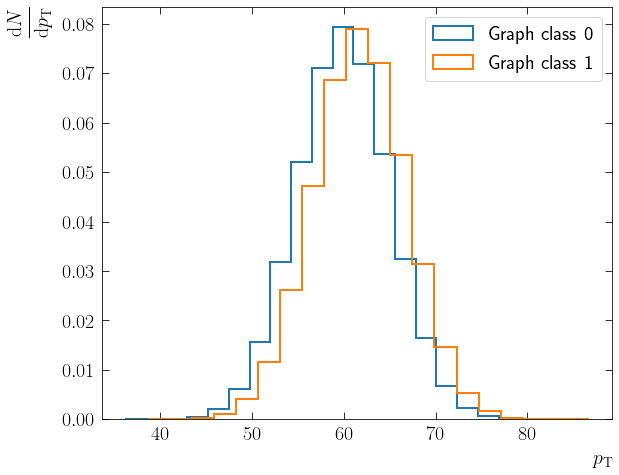

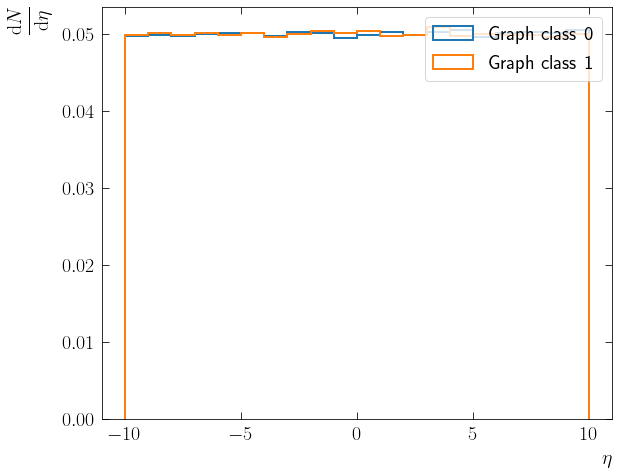

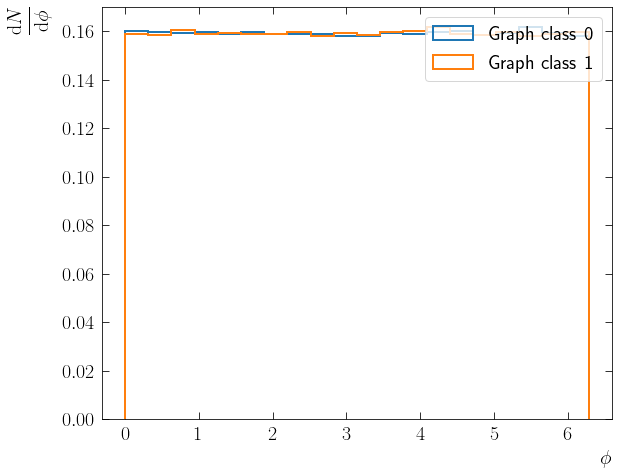

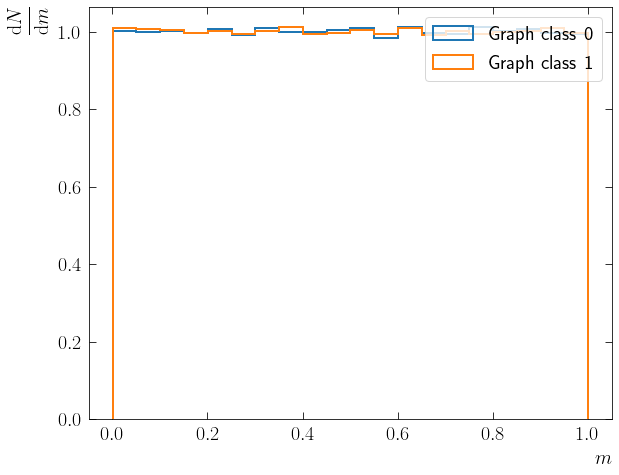

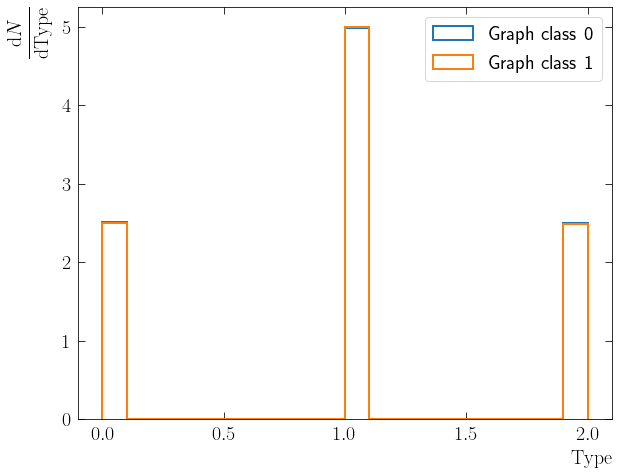

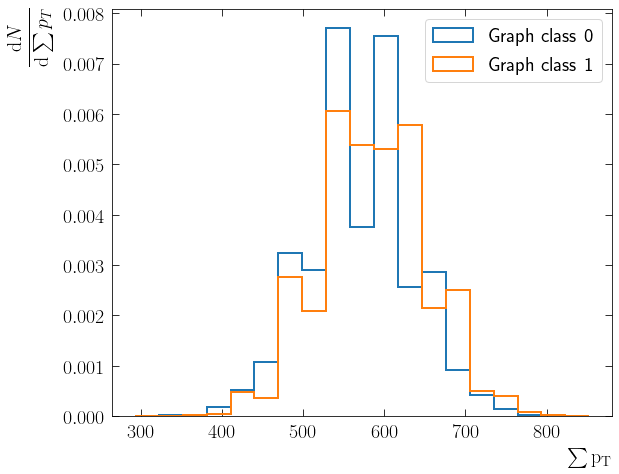

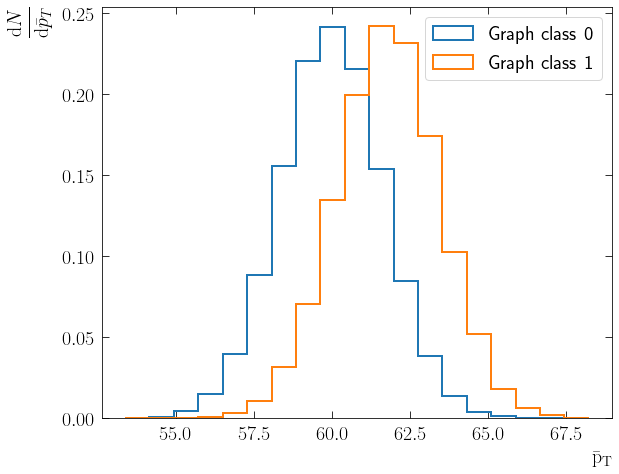

 56%|█████▌    | 15/27 [11:42<09:16, 46.37s/it]

Done loading data from cached files.


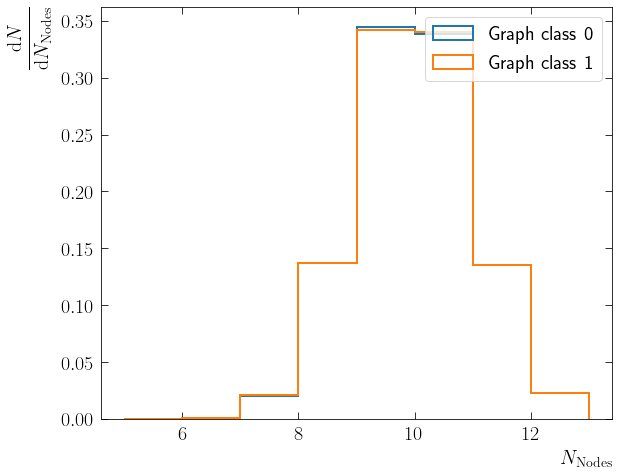

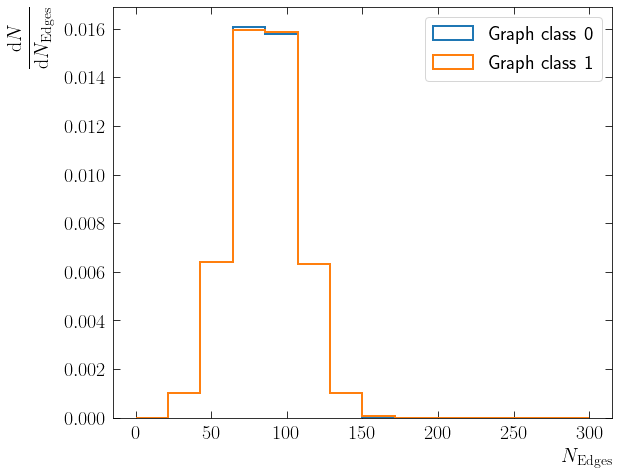

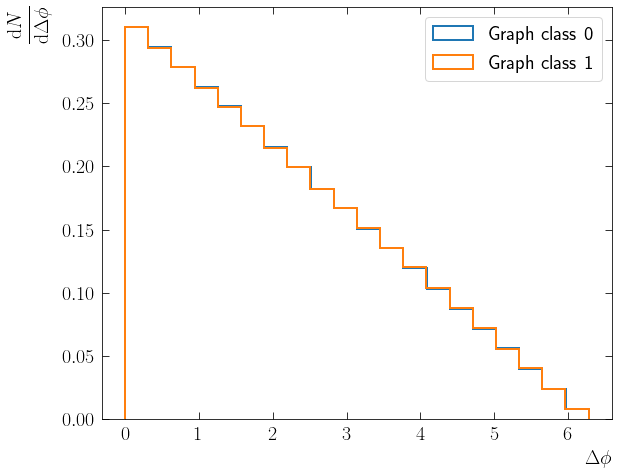

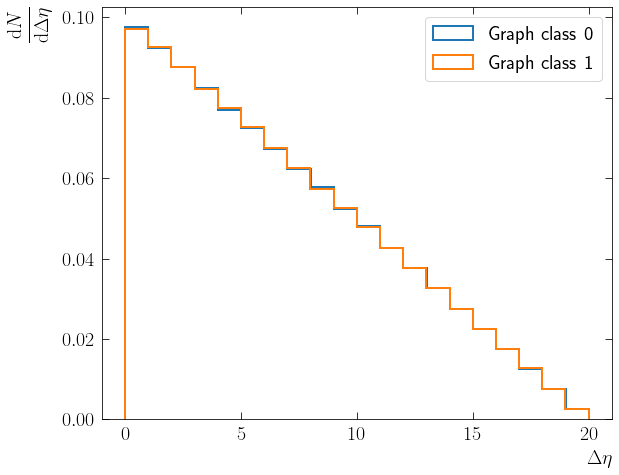

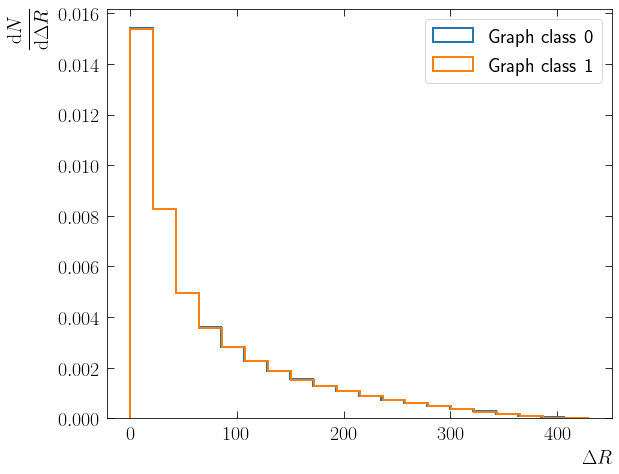

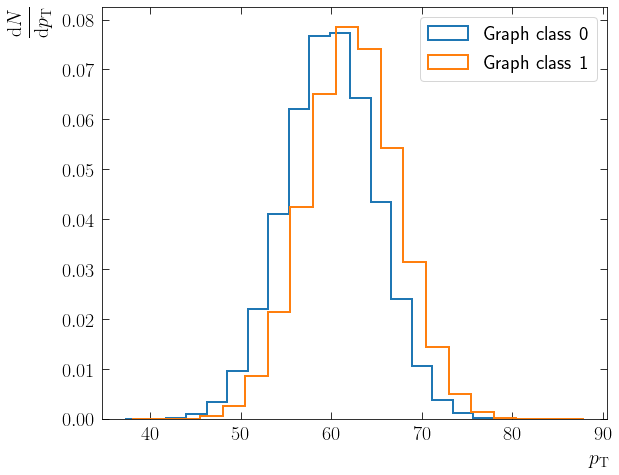

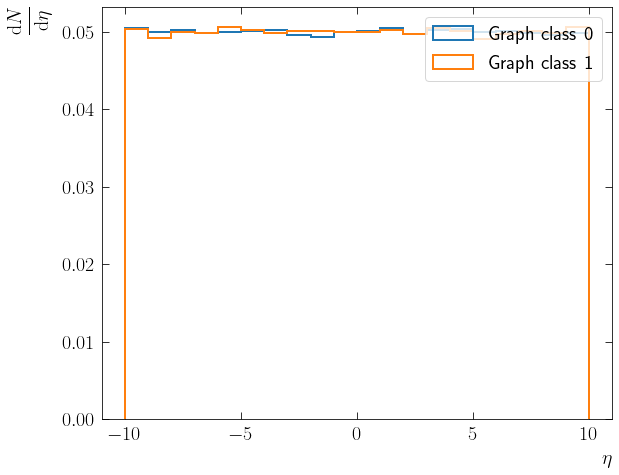

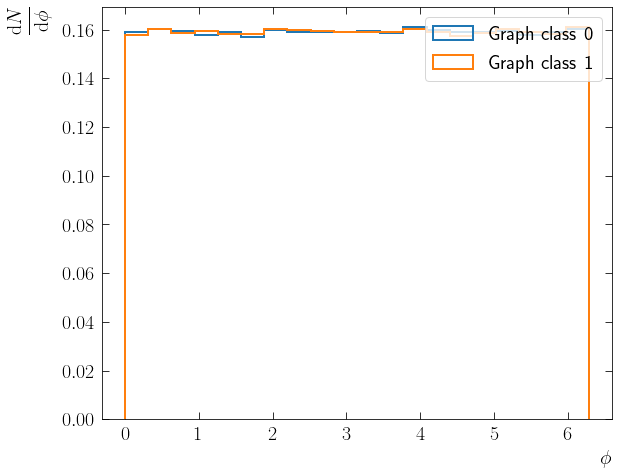

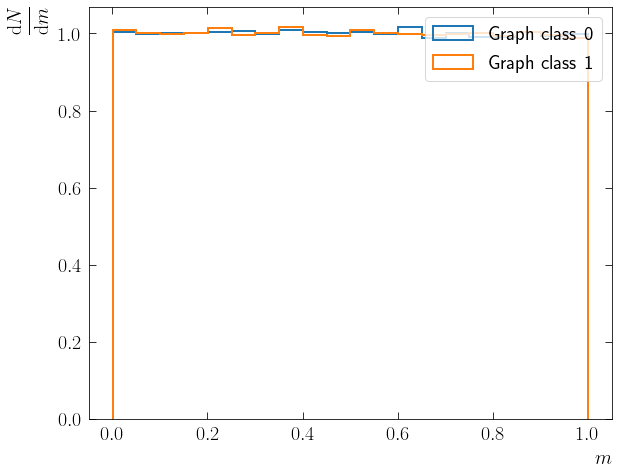

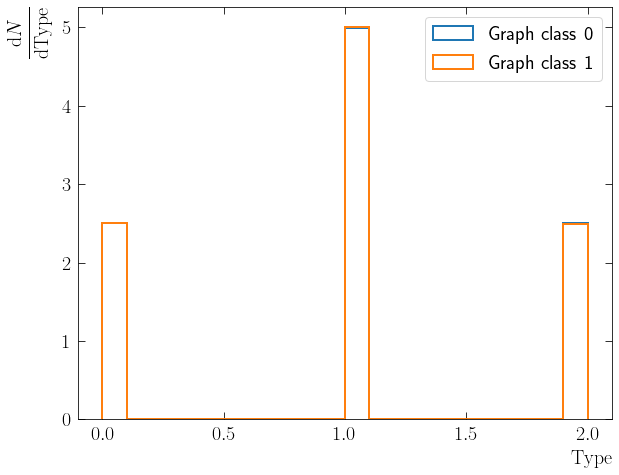

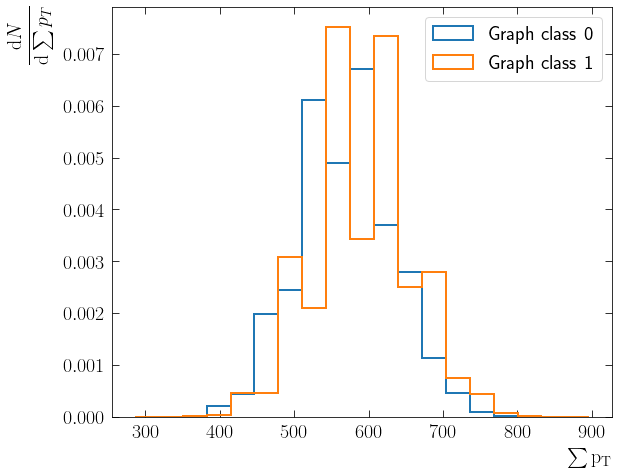

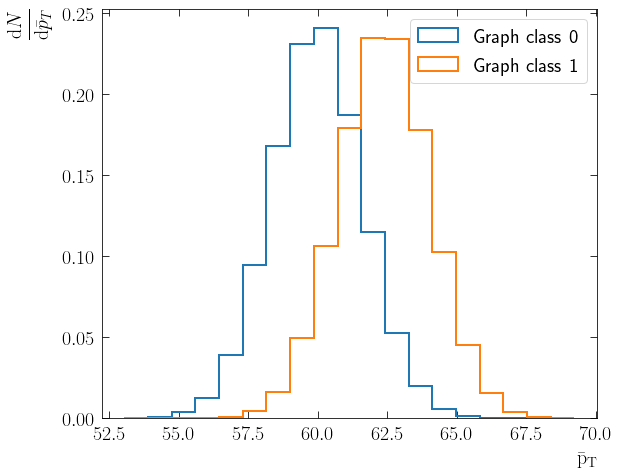

 59%|█████▉    | 16/27 [12:28<08:28, 46.24s/it]

Done loading data from cached files.


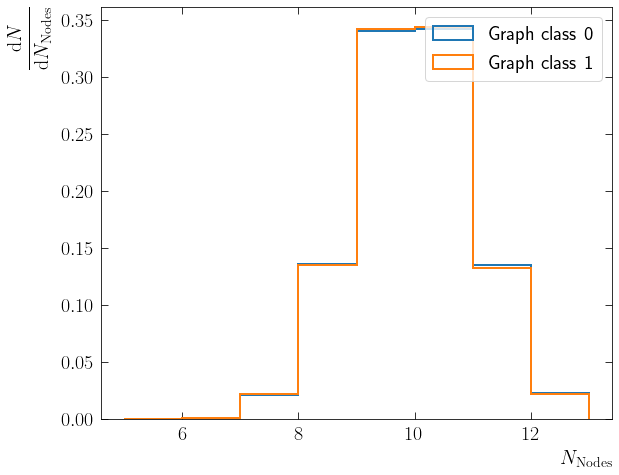

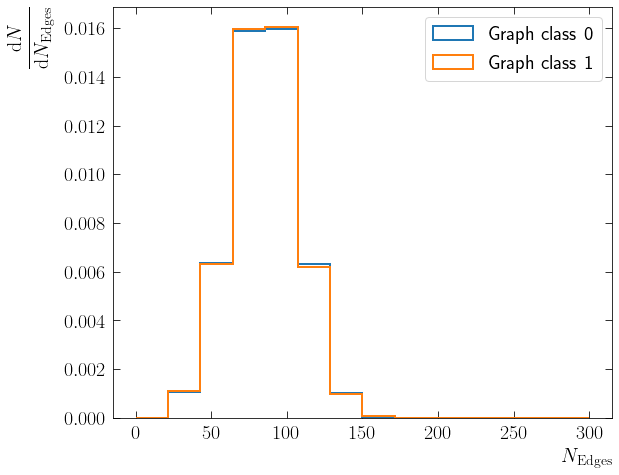

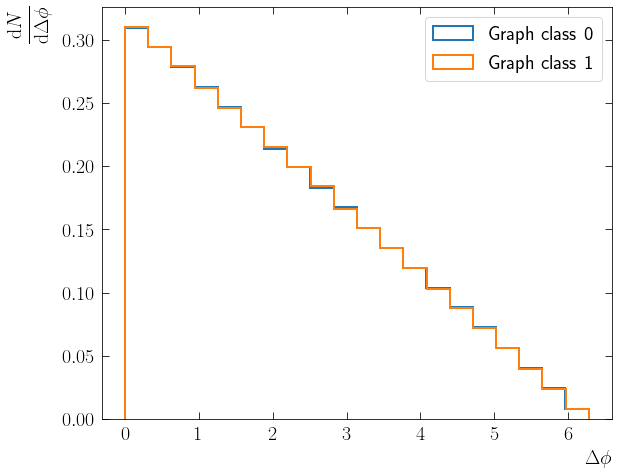

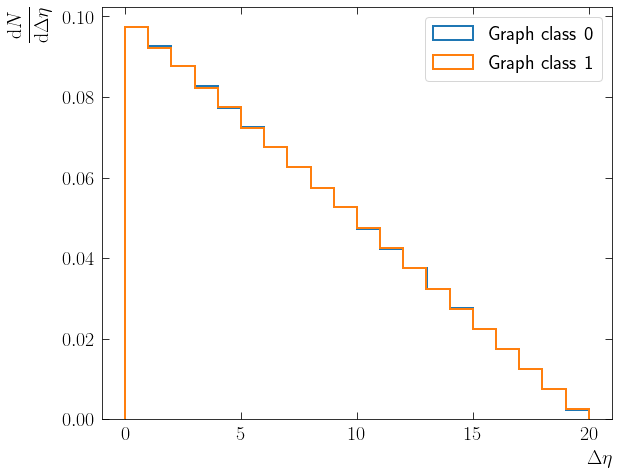

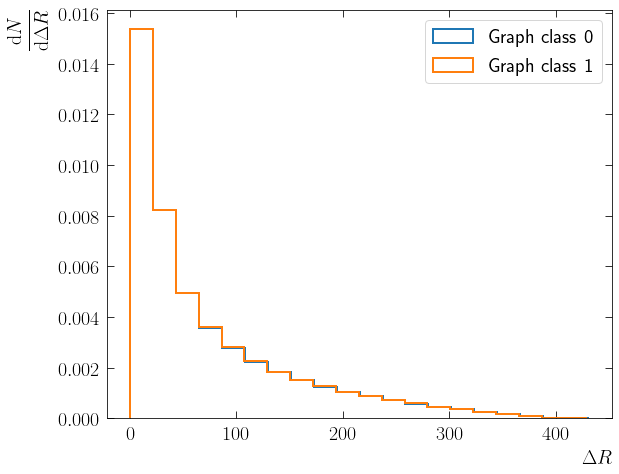

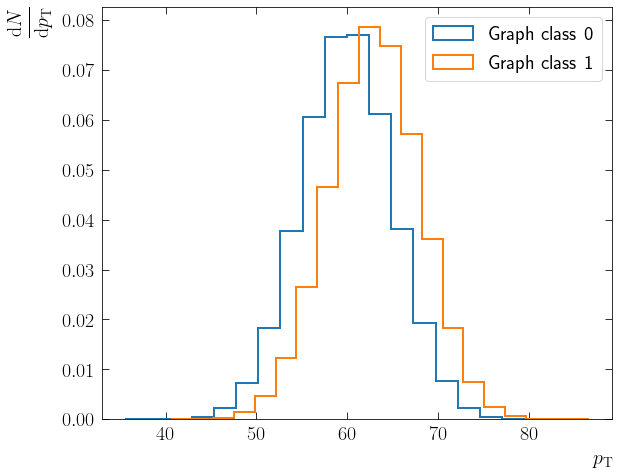

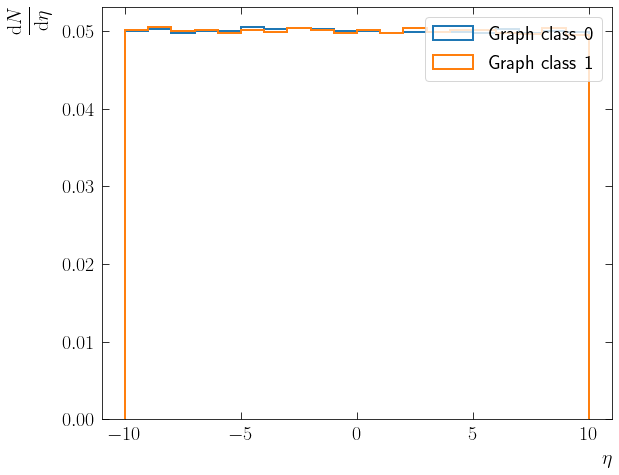

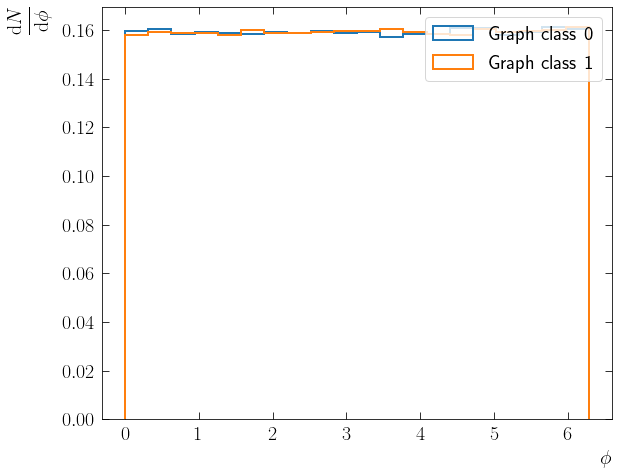

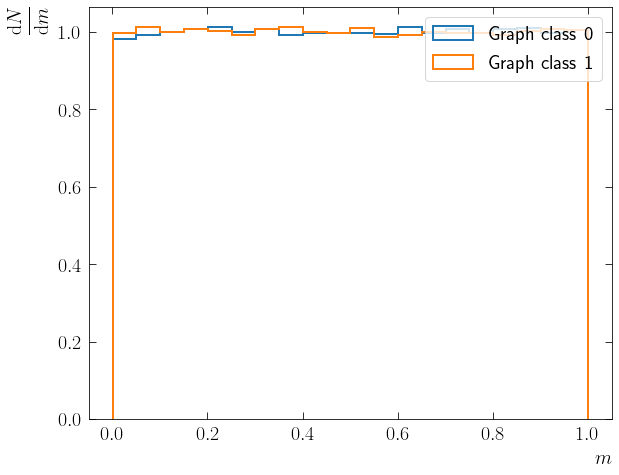

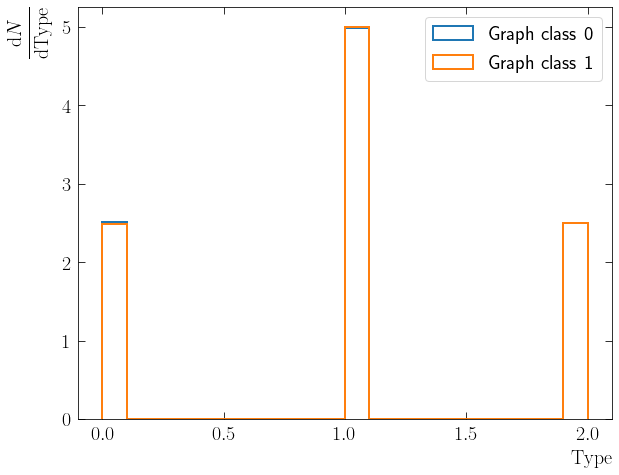

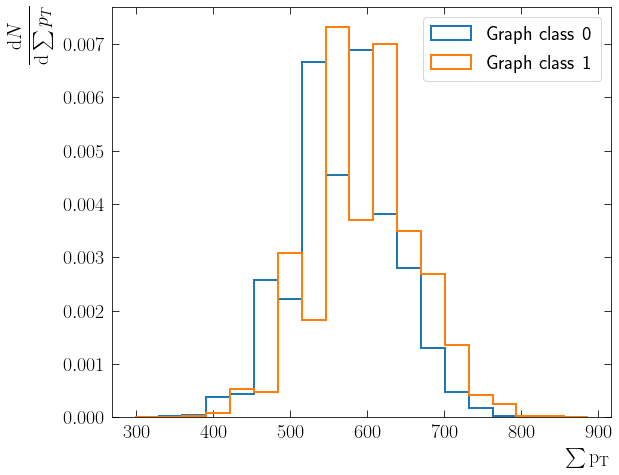

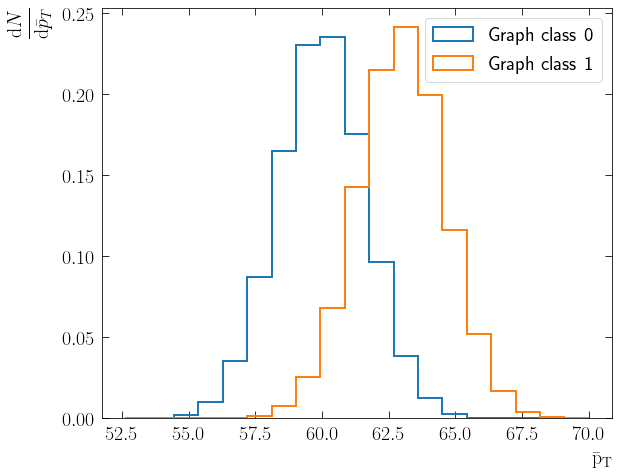

 63%|██████▎   | 17/27 [13:15<07:42, 46.25s/it]

Done loading data from cached files.


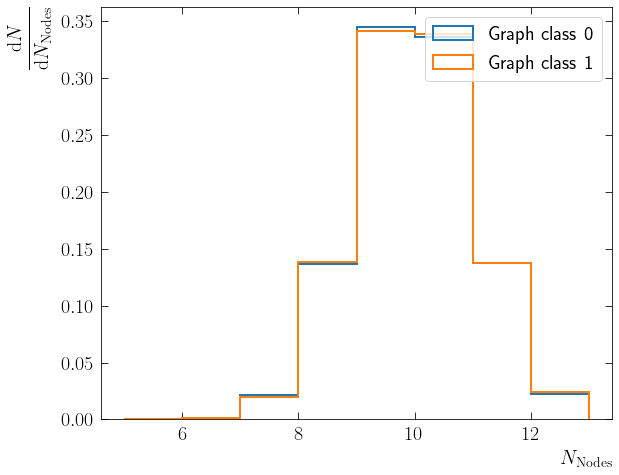

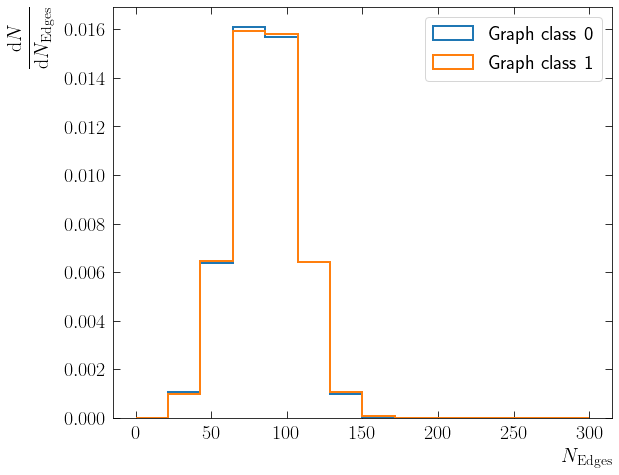

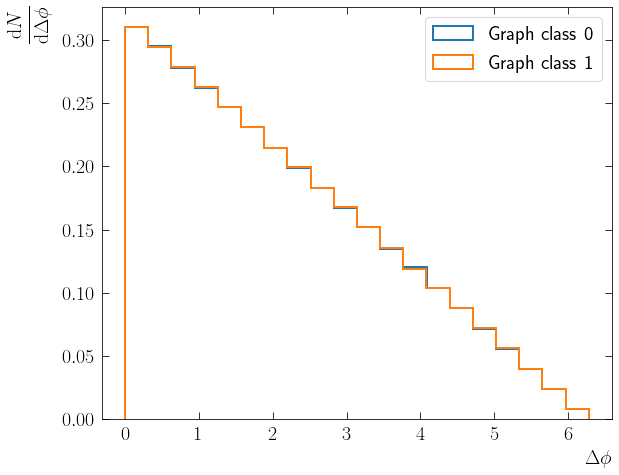

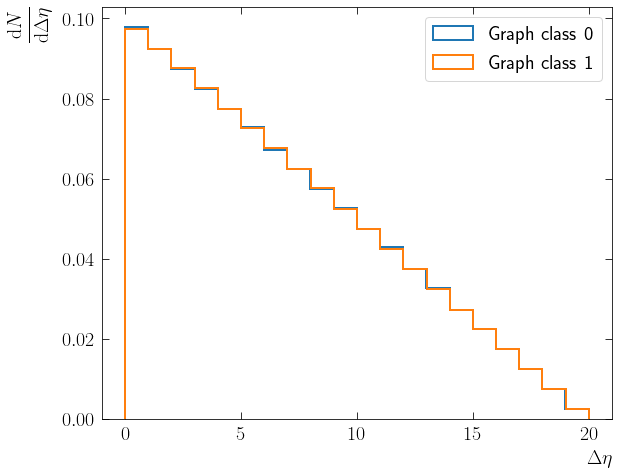

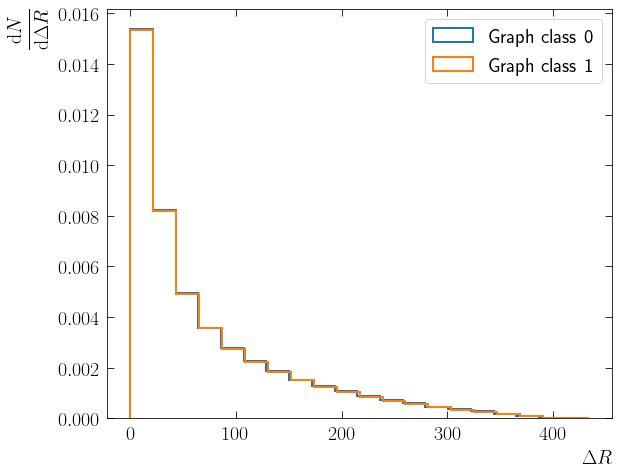

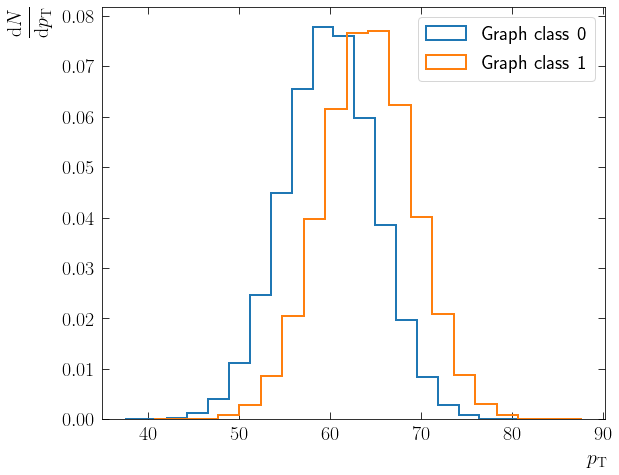

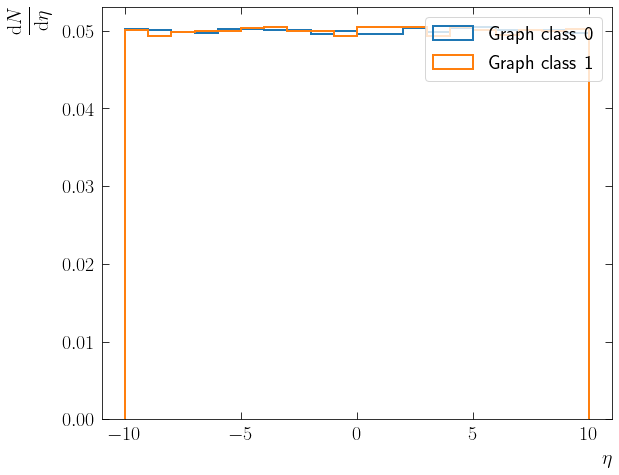

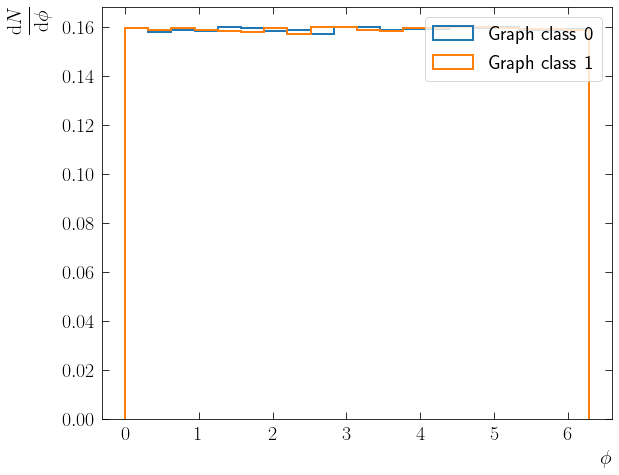

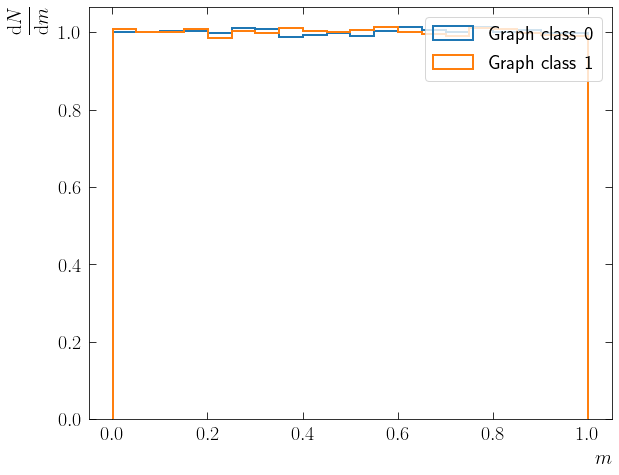

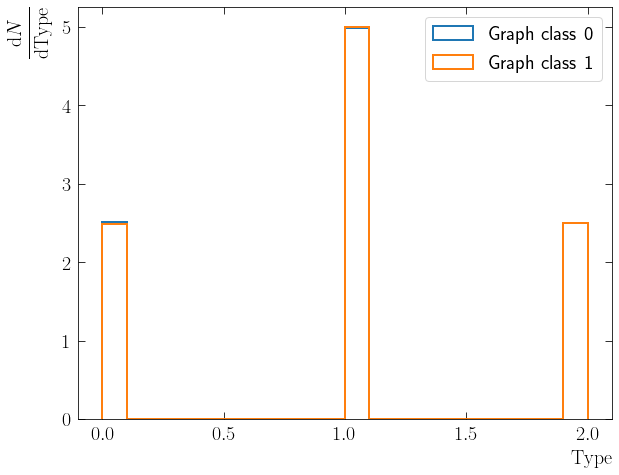

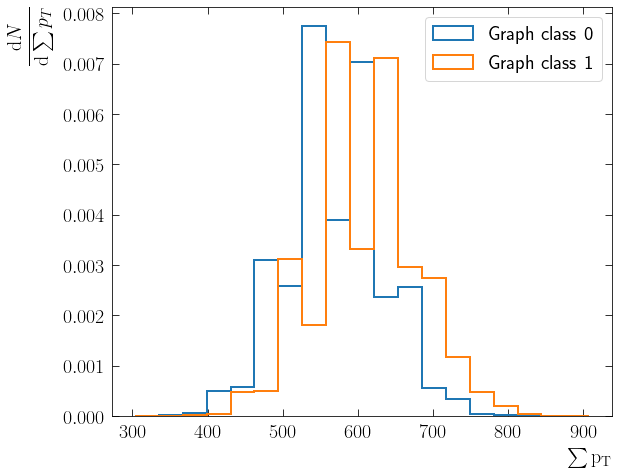

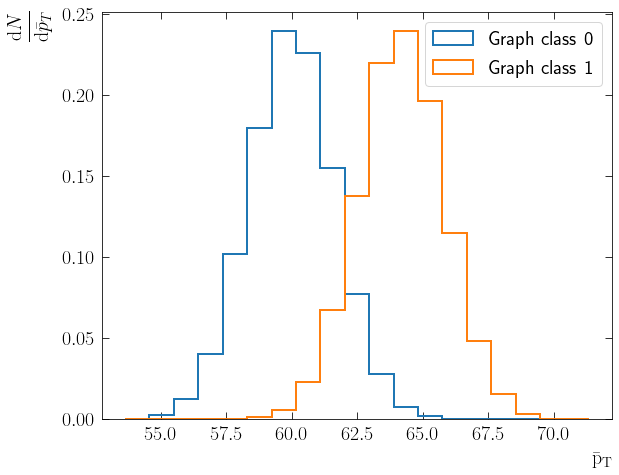

 67%|██████▋   | 18/27 [13:59<06:51, 45.75s/it]

Done loading data from cached files.


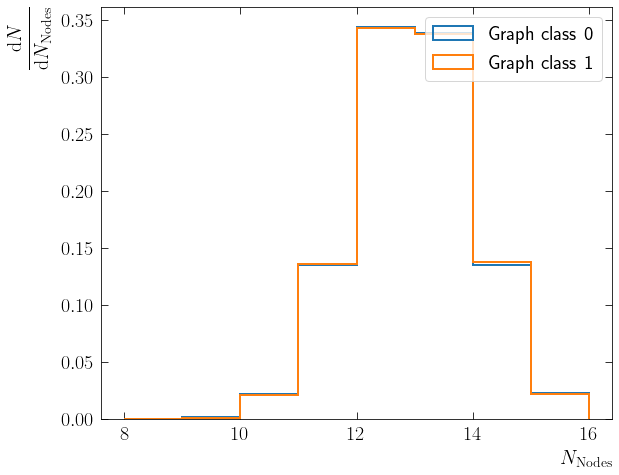

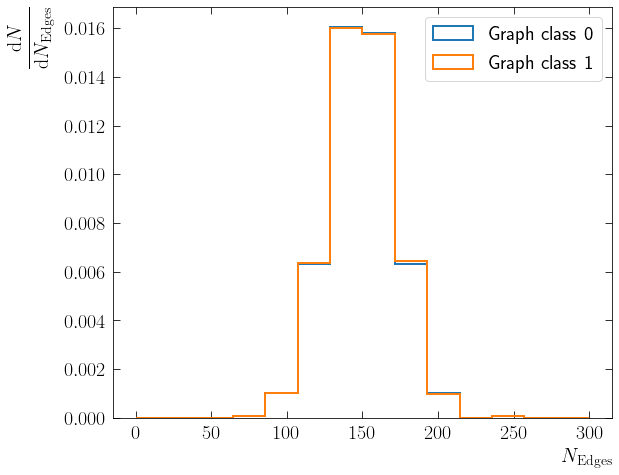

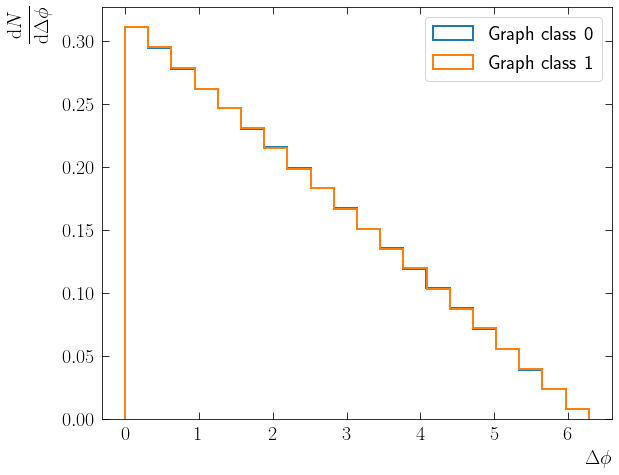

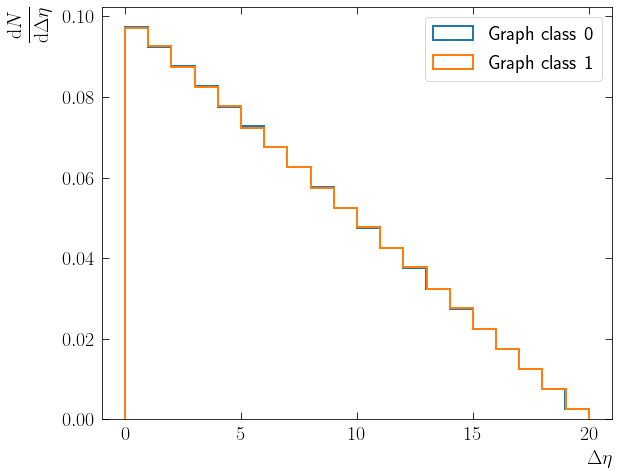

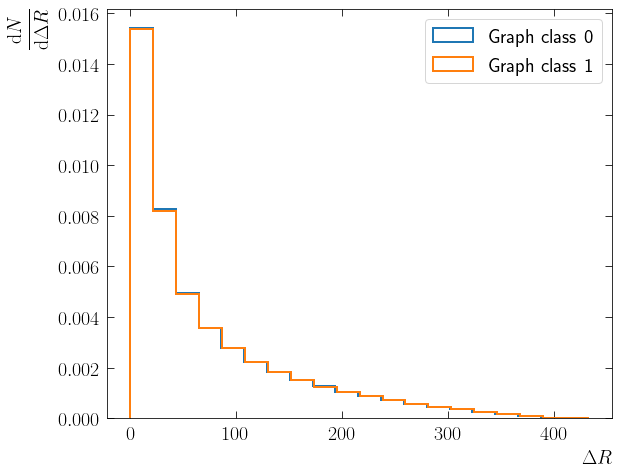

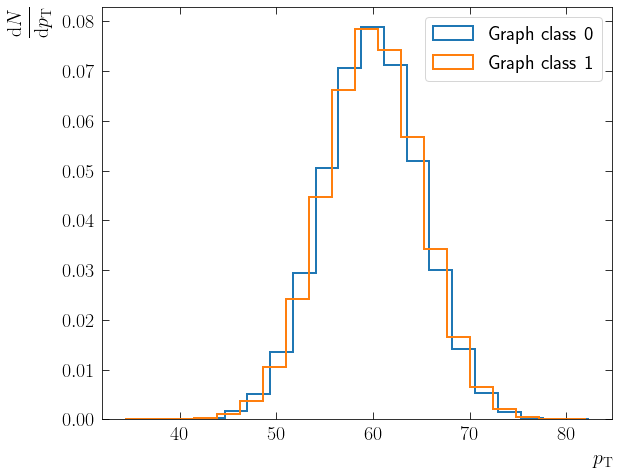

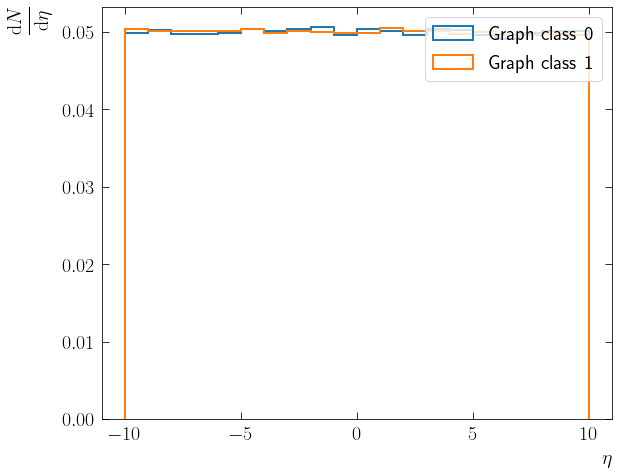

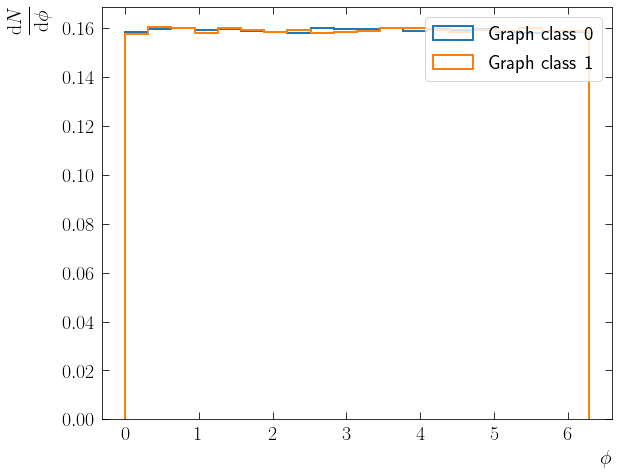

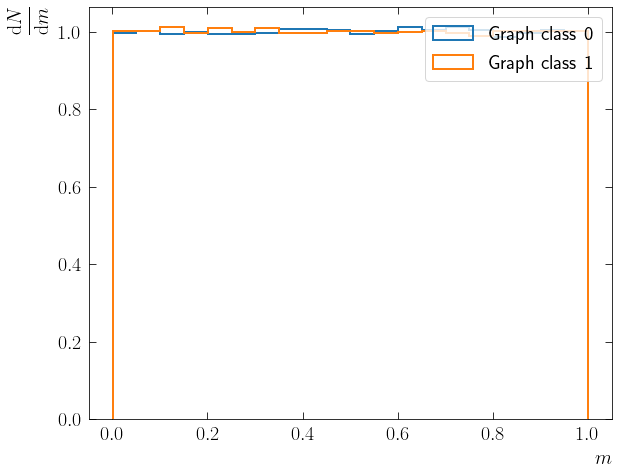

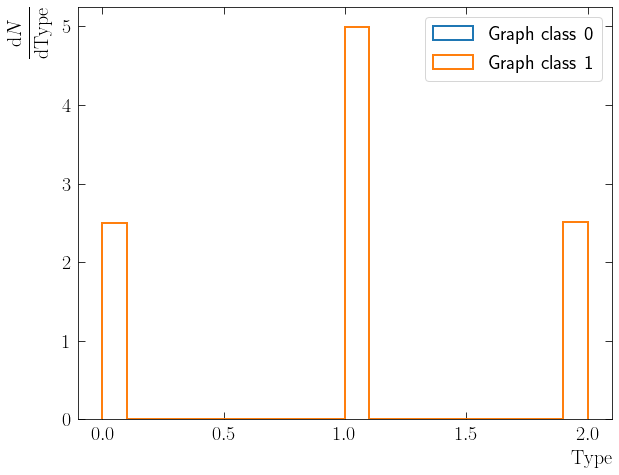

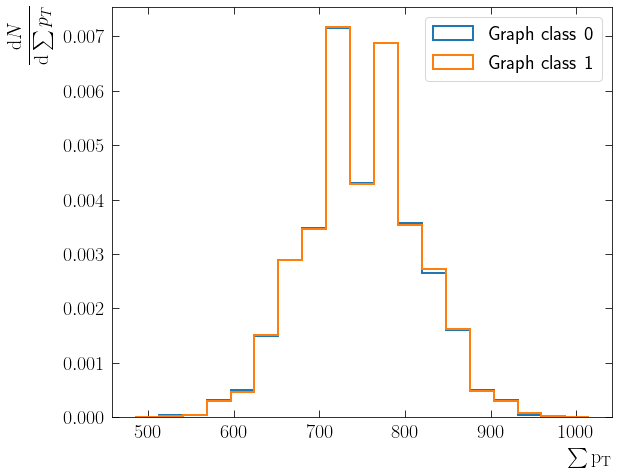

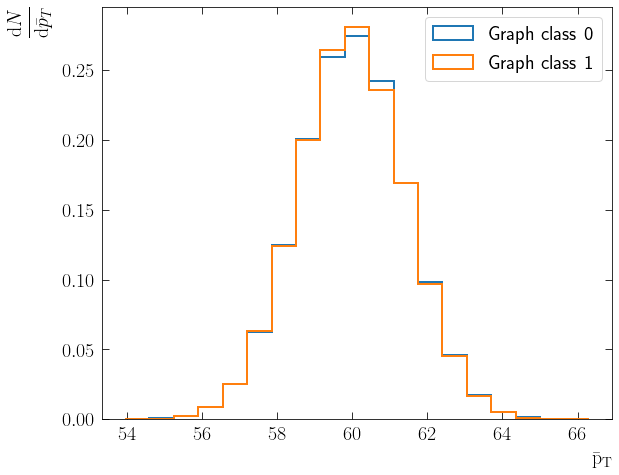

 70%|███████   | 19/27 [14:47<06:10, 46.29s/it]

Done loading data from cached files.


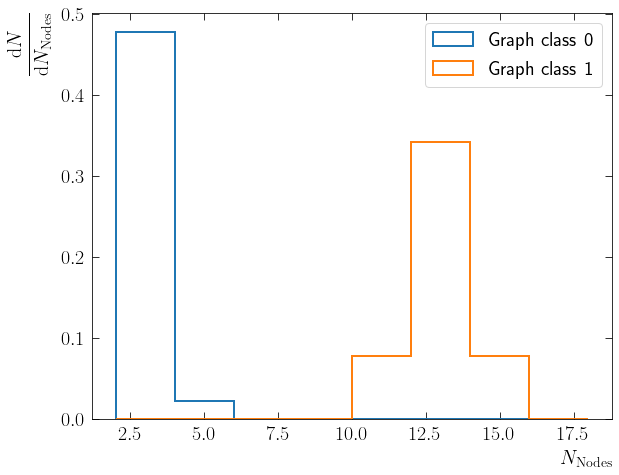

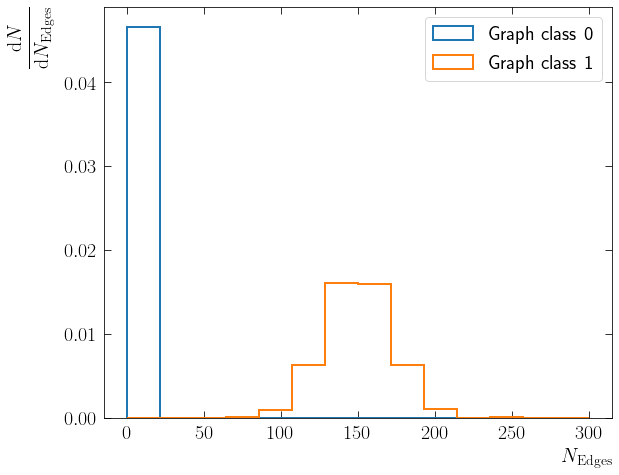

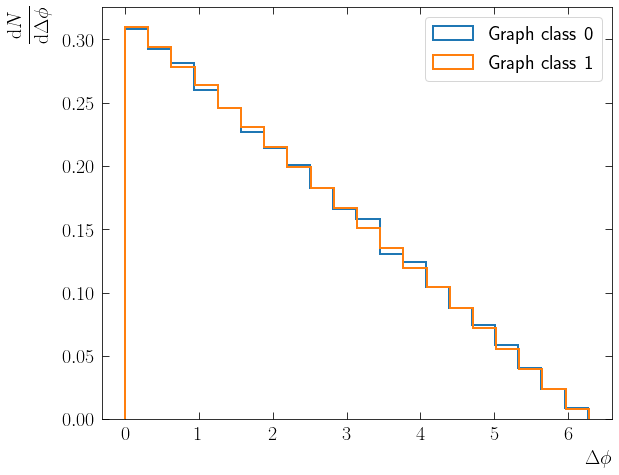

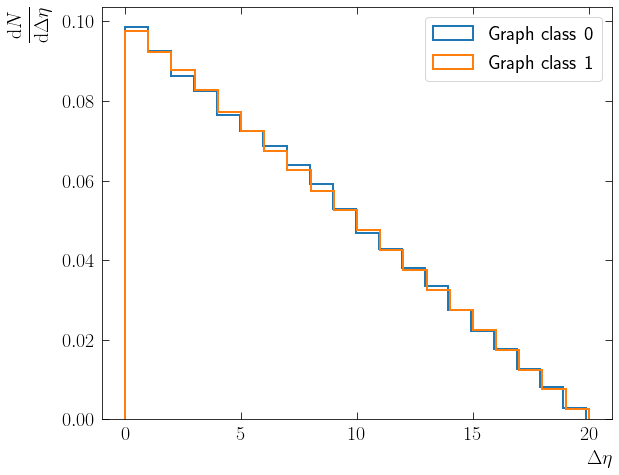

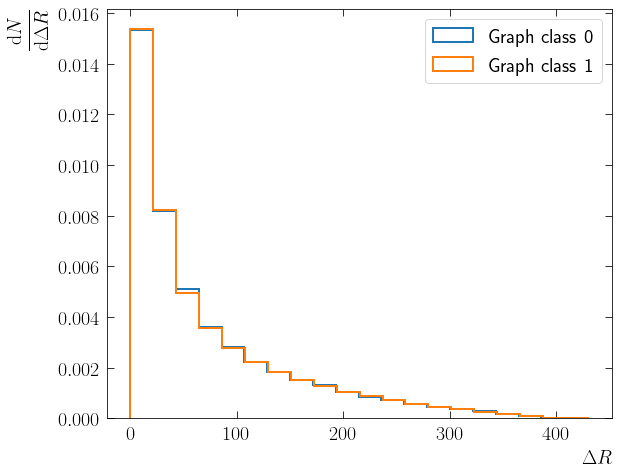

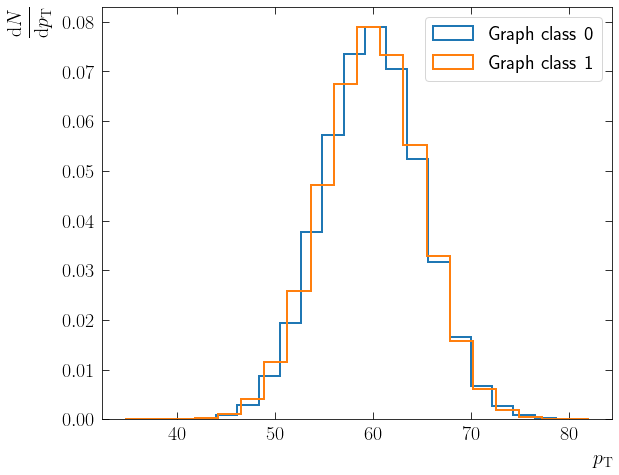

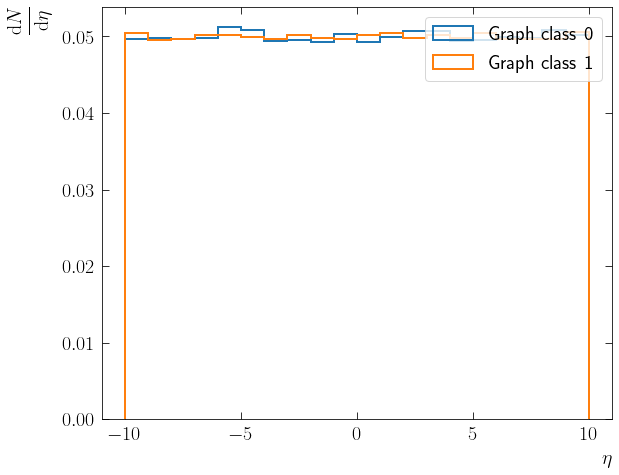

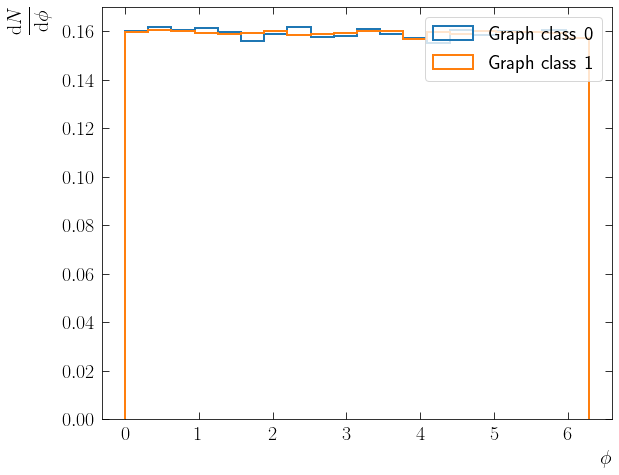

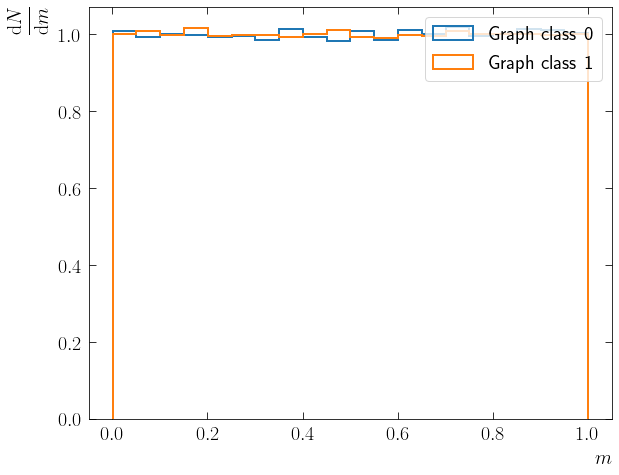

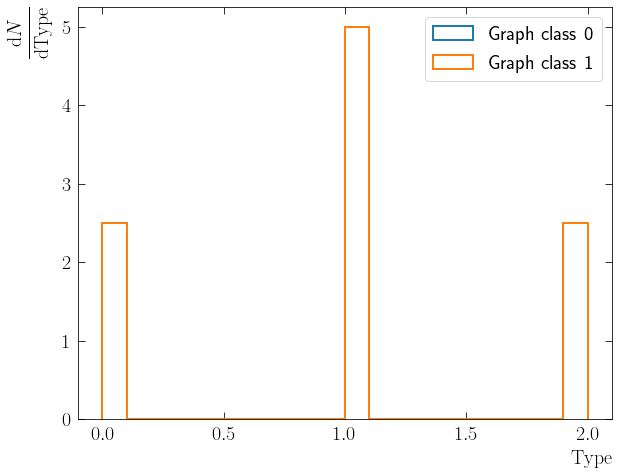

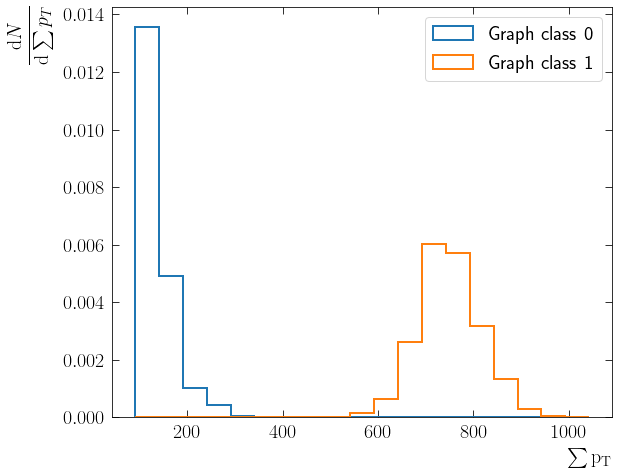

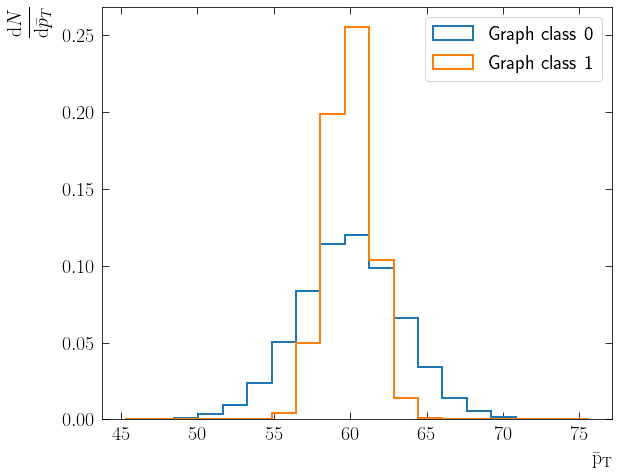

 74%|███████▍  | 20/27 [15:32<05:22, 46.10s/it]

Done loading data from cached files.


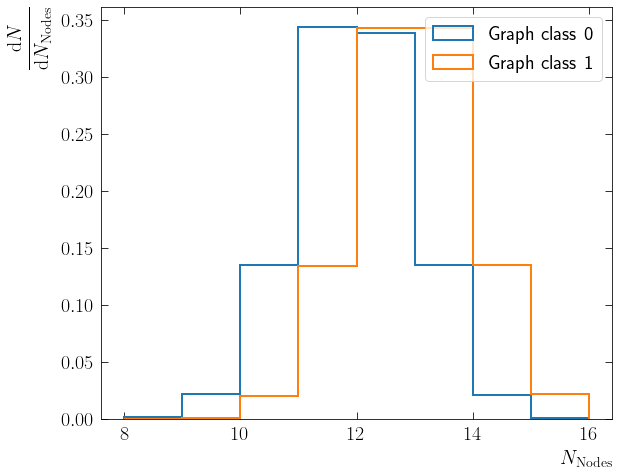

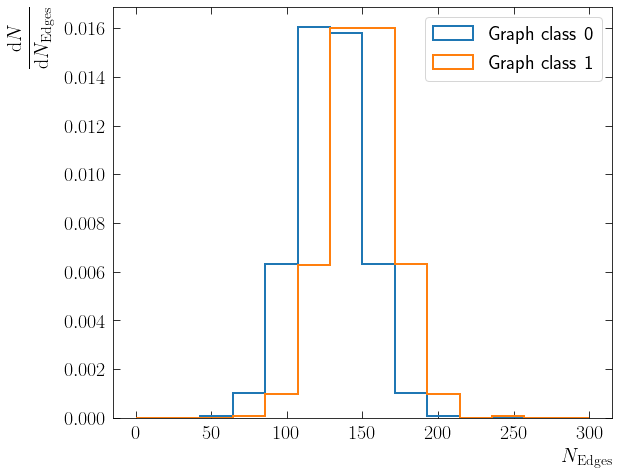

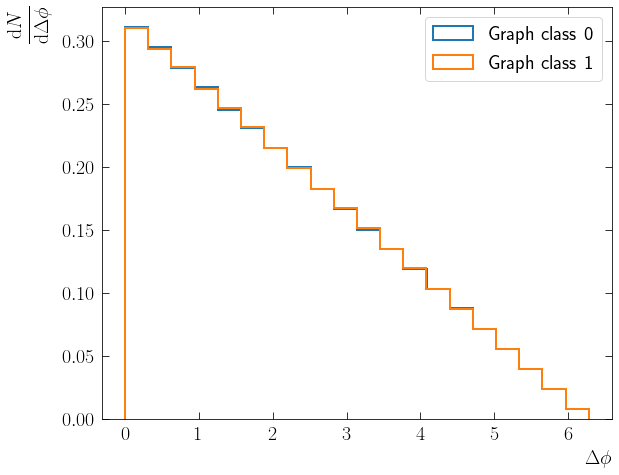

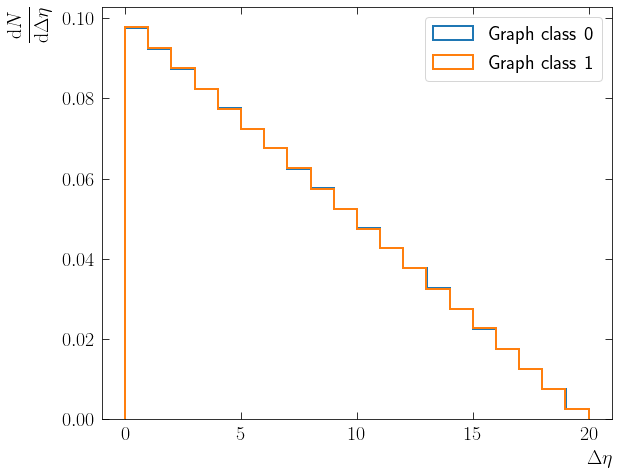

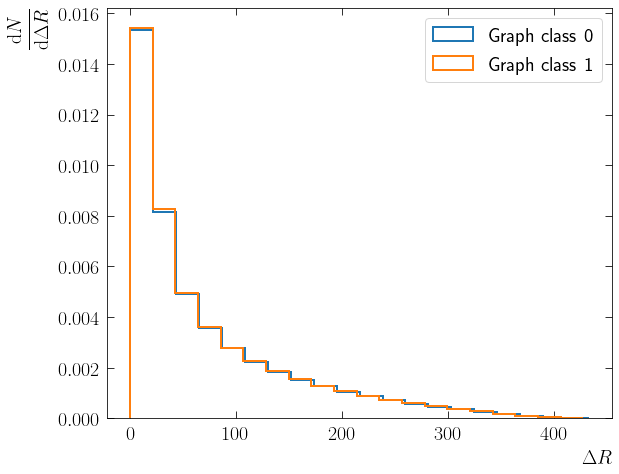

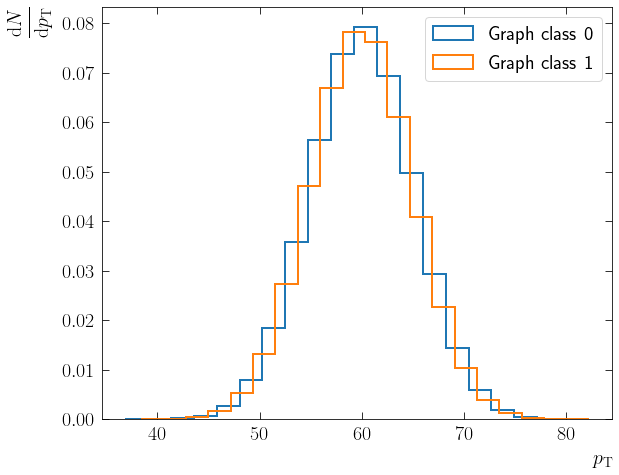

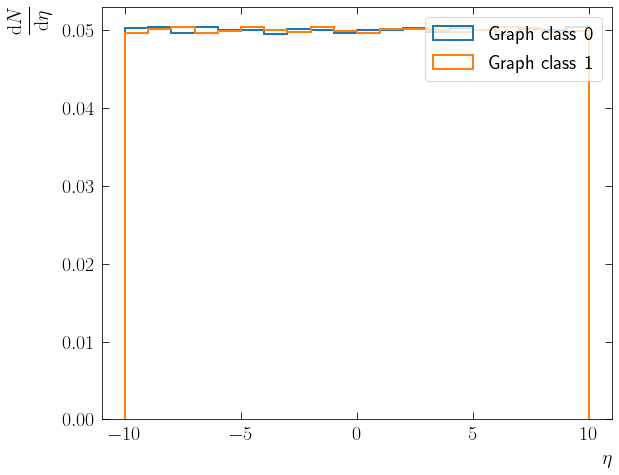

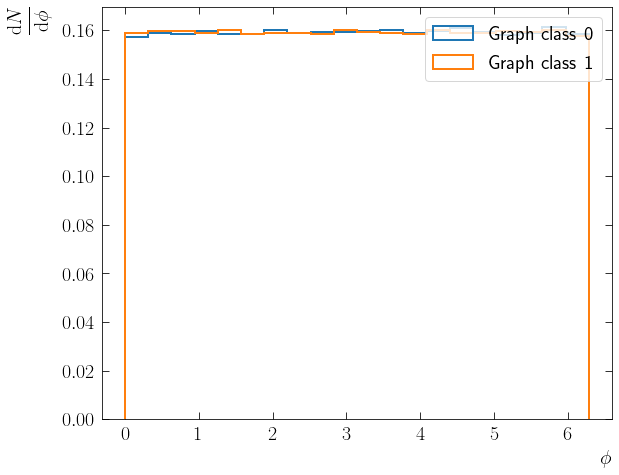

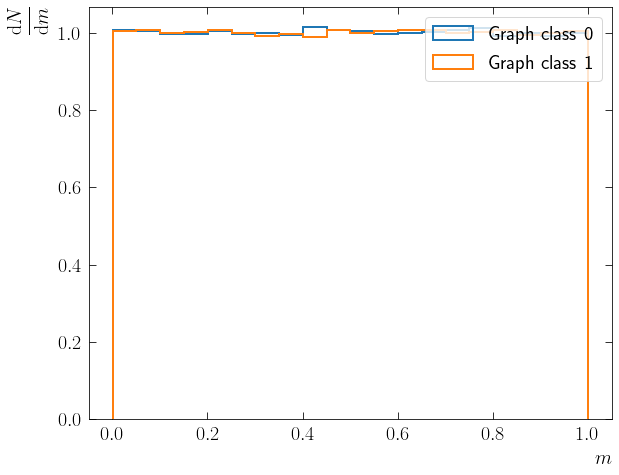

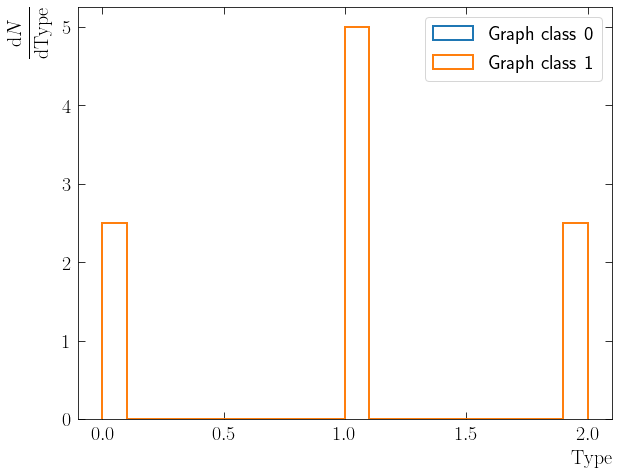

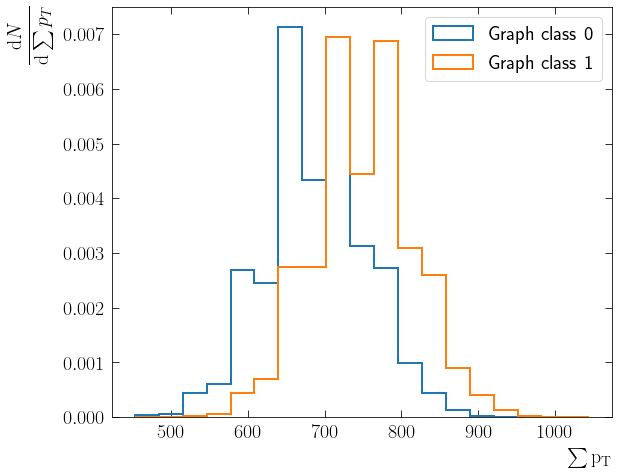

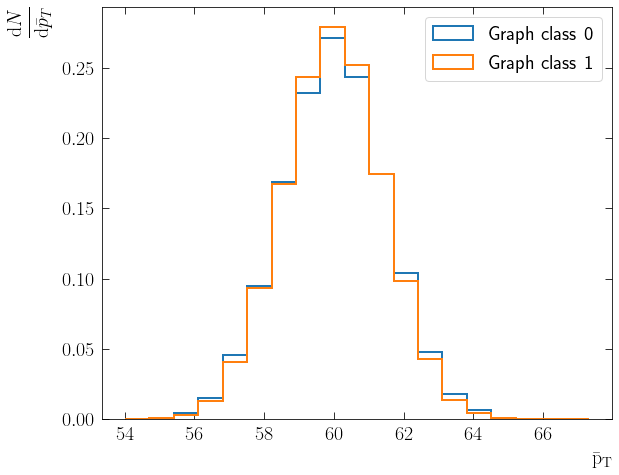

 78%|███████▊  | 21/27 [16:20<04:40, 46.70s/it]

Done loading data from cached files.


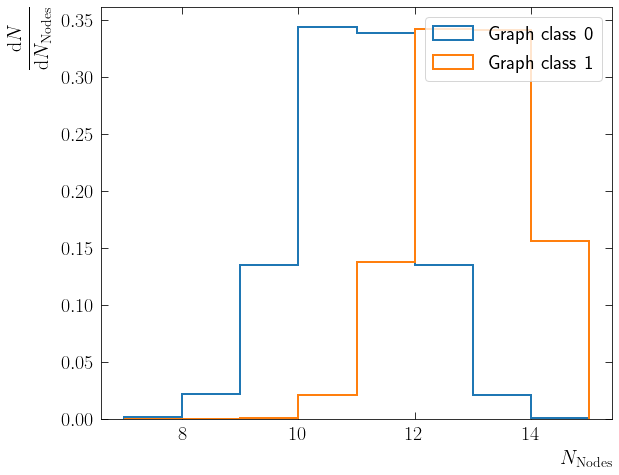

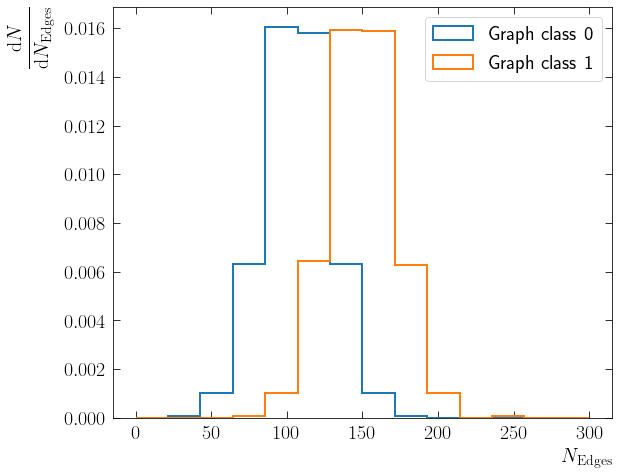

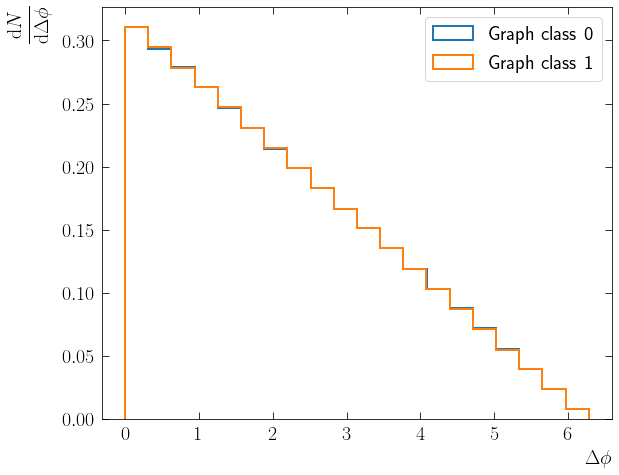

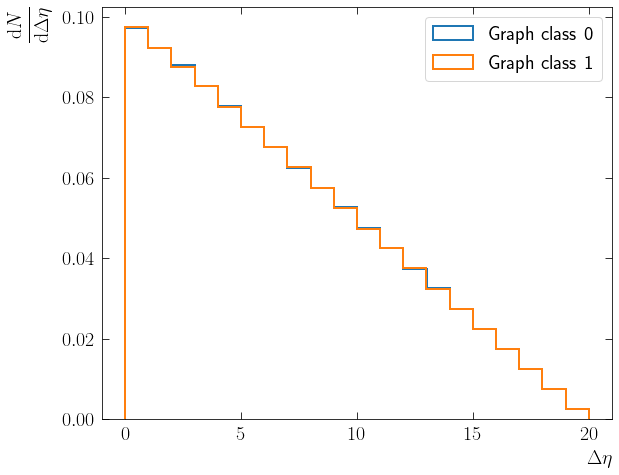

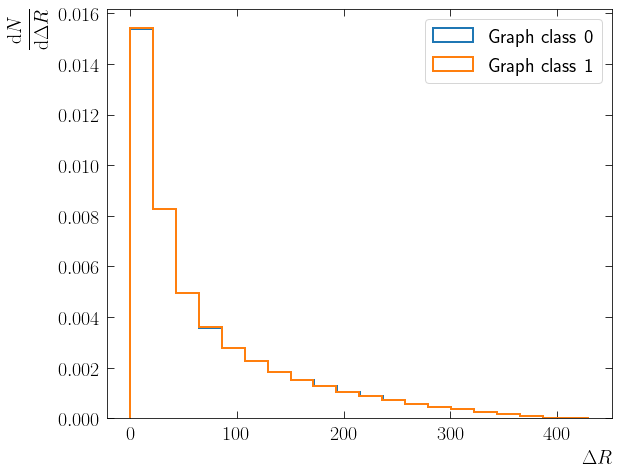

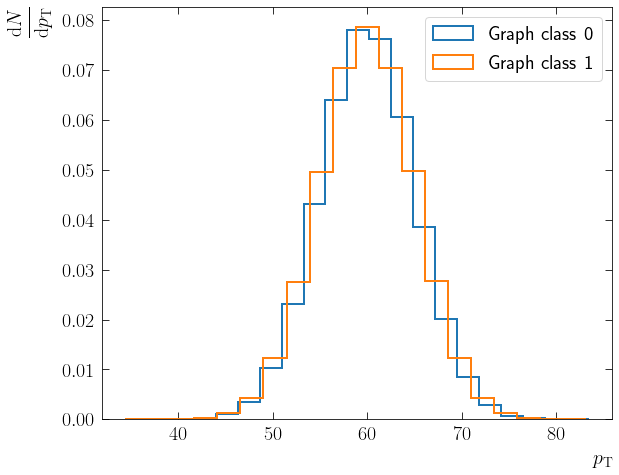

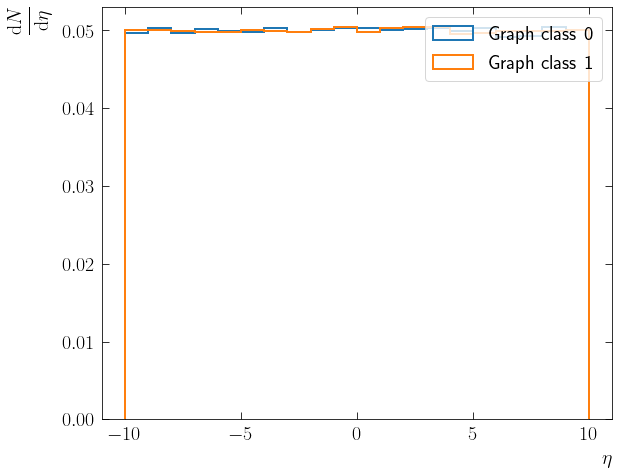

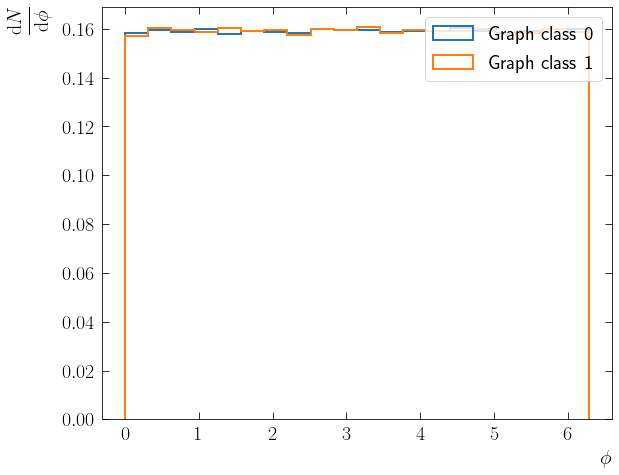

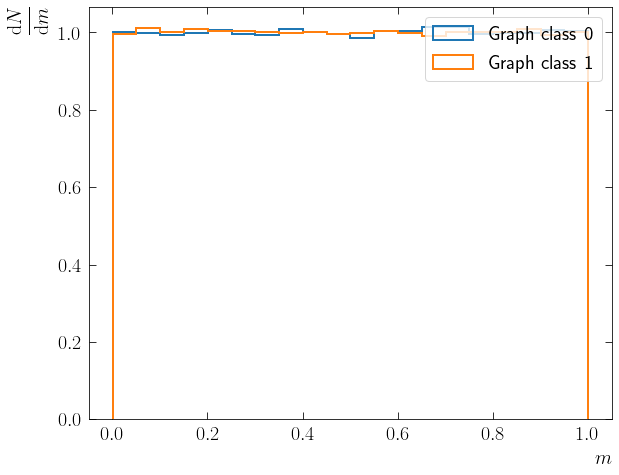

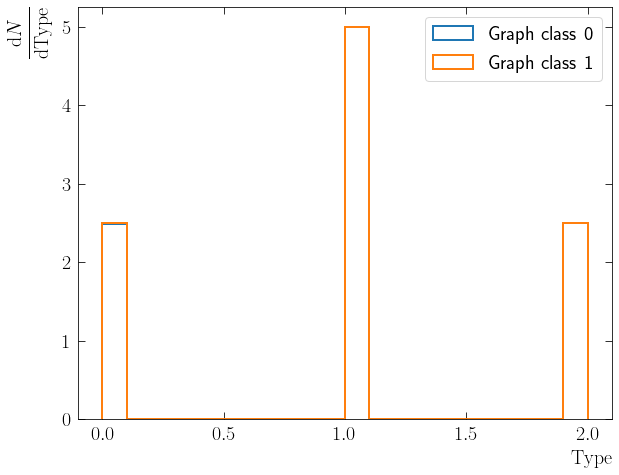

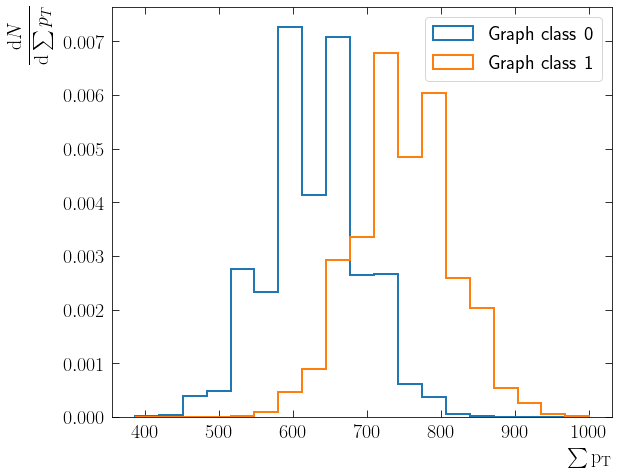

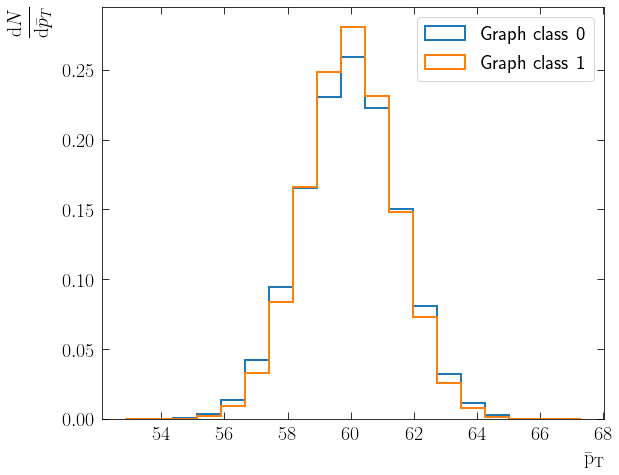

 81%|████████▏ | 22/27 [17:08<03:54, 46.87s/it]

Done loading data from cached files.


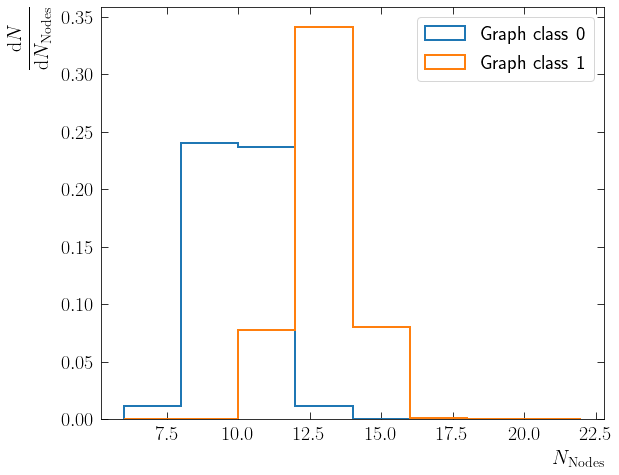

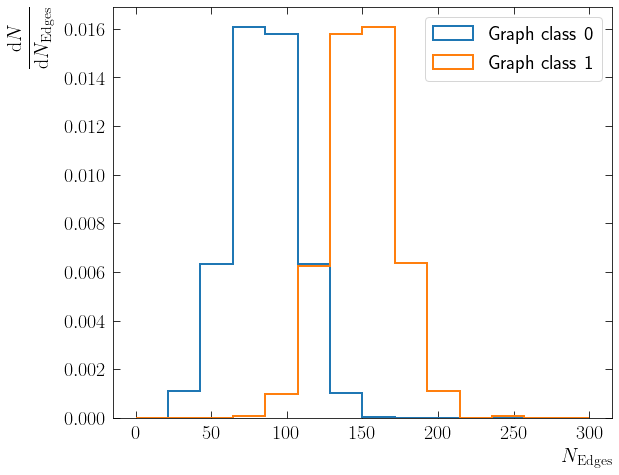

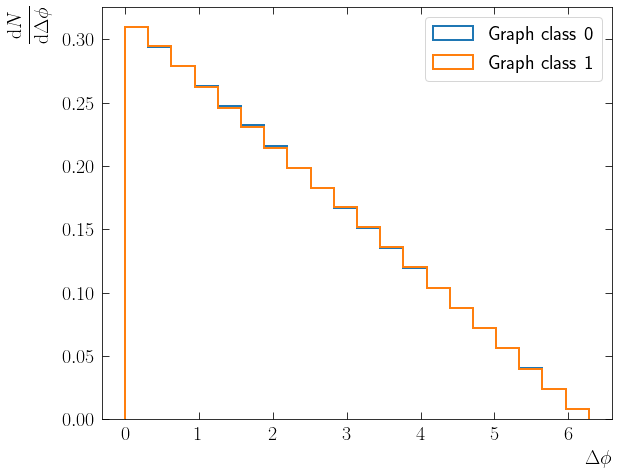

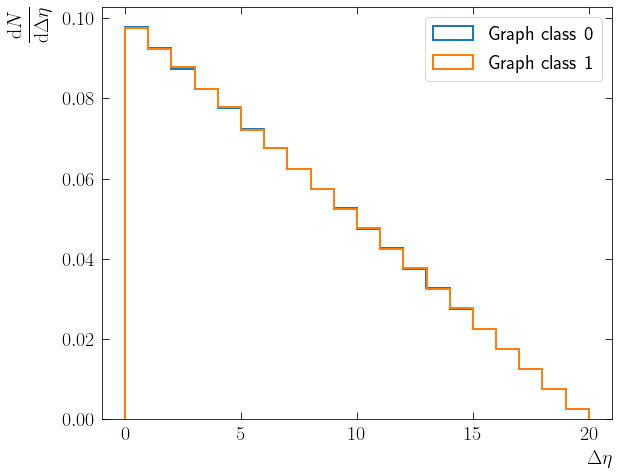

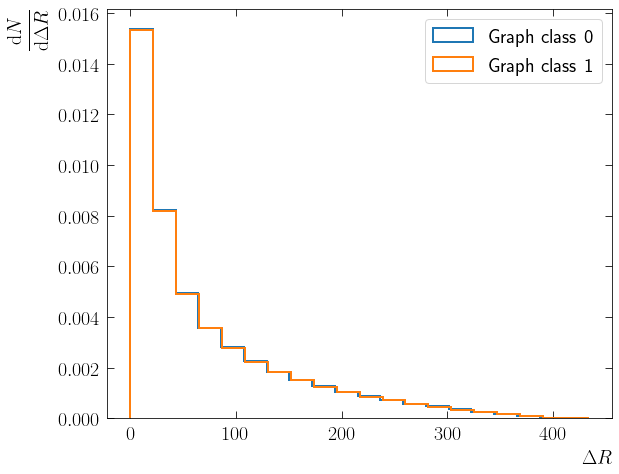

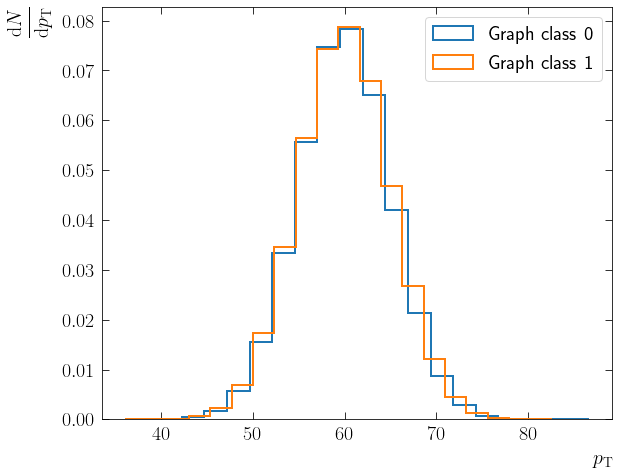

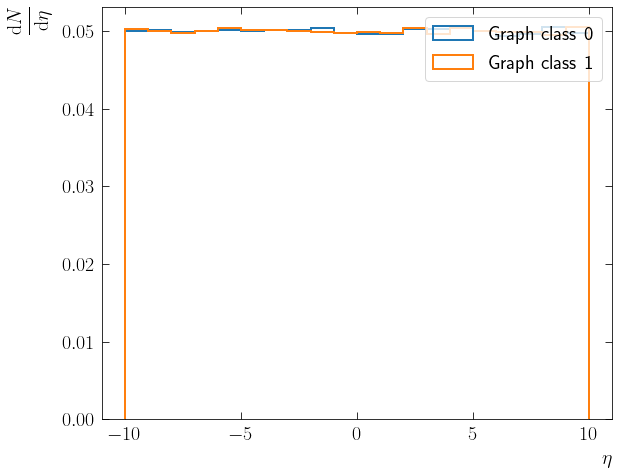

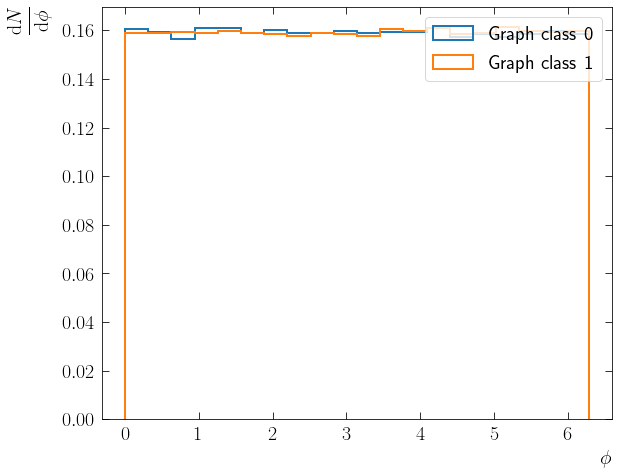

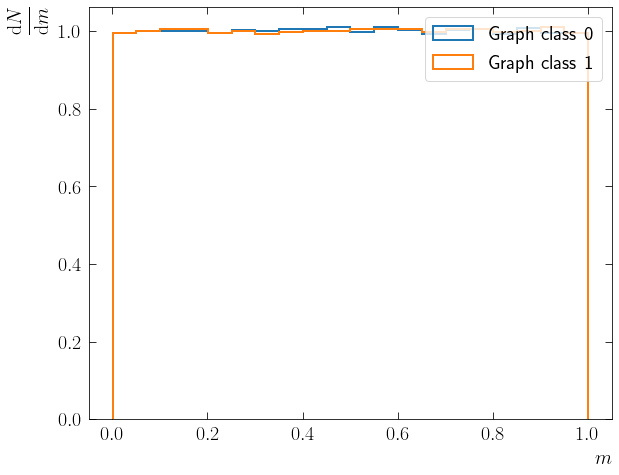

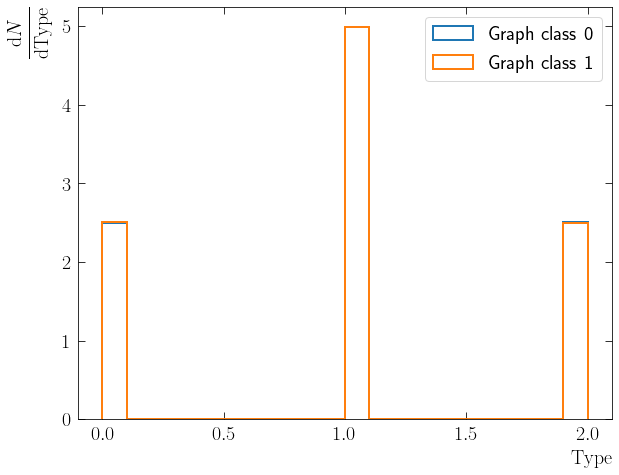

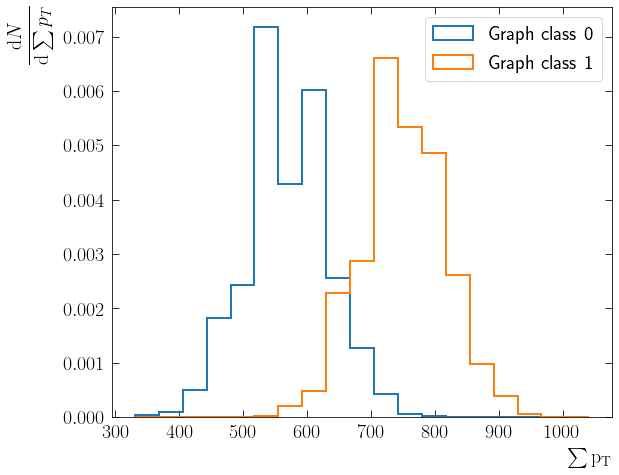

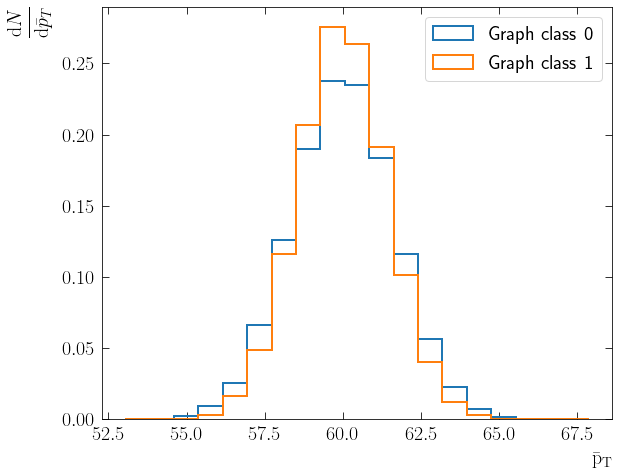

 85%|████████▌ | 23/27 [17:54<03:06, 46.73s/it]

Done loading data from cached files.


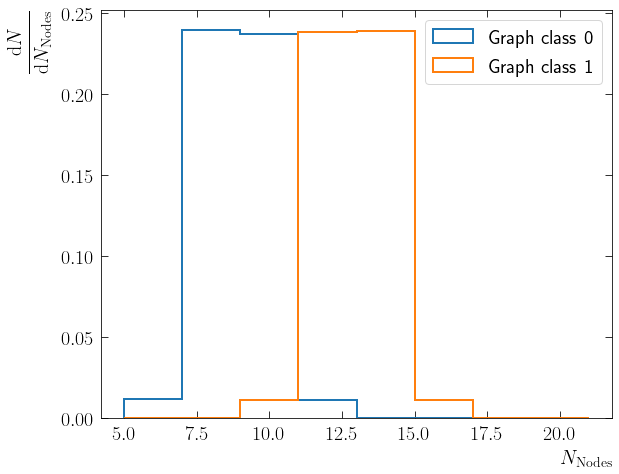

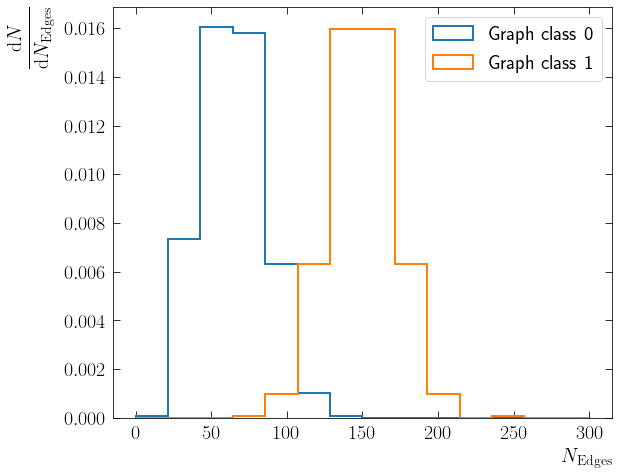

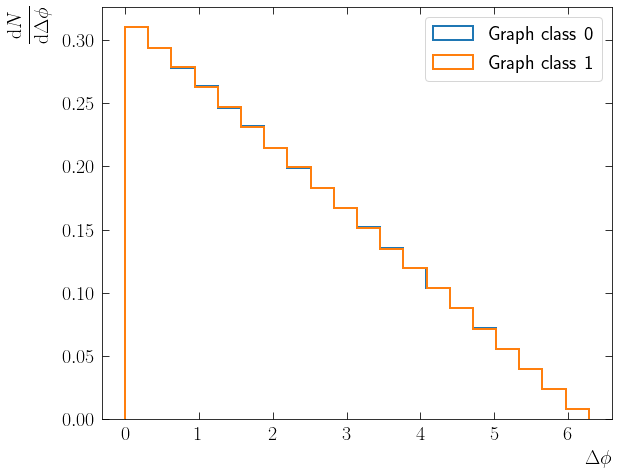

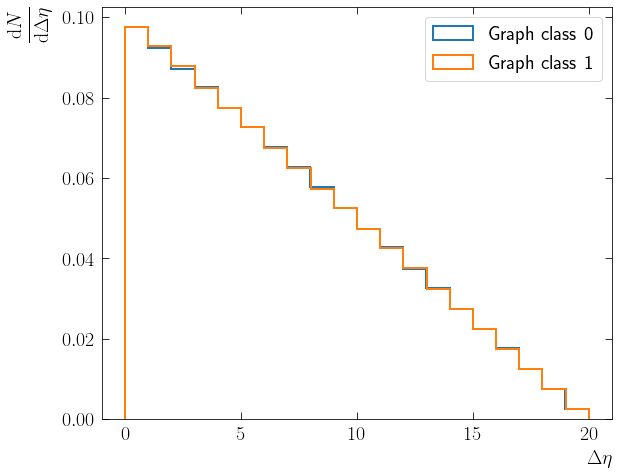

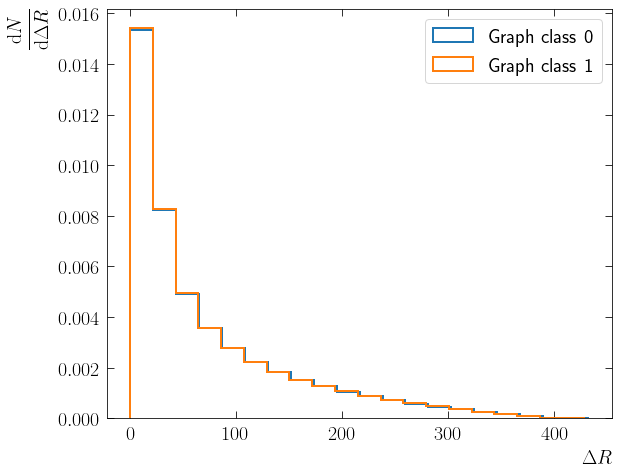

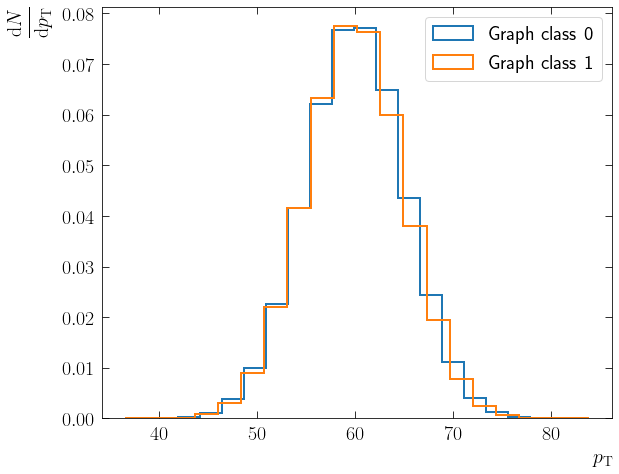

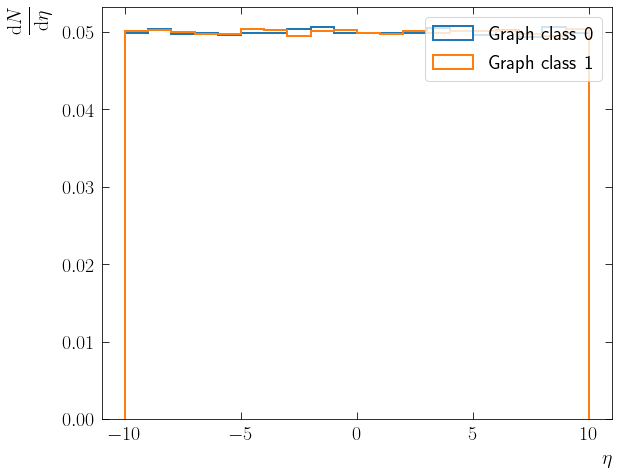

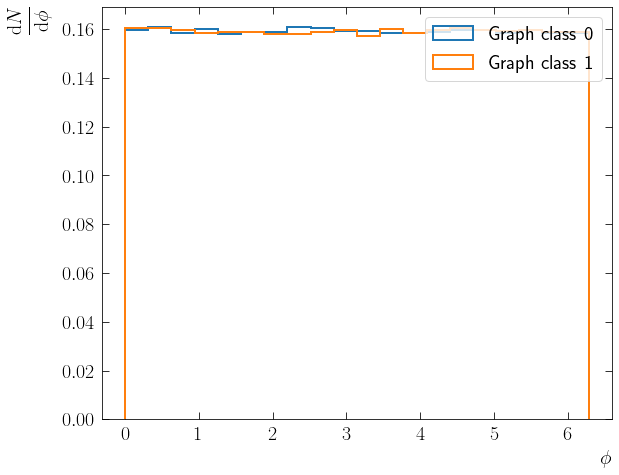

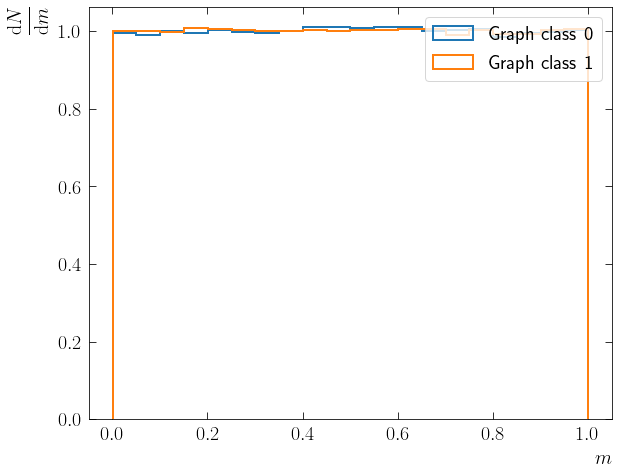

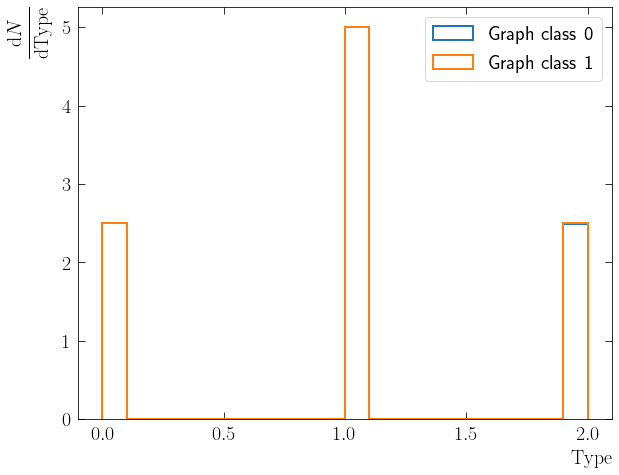

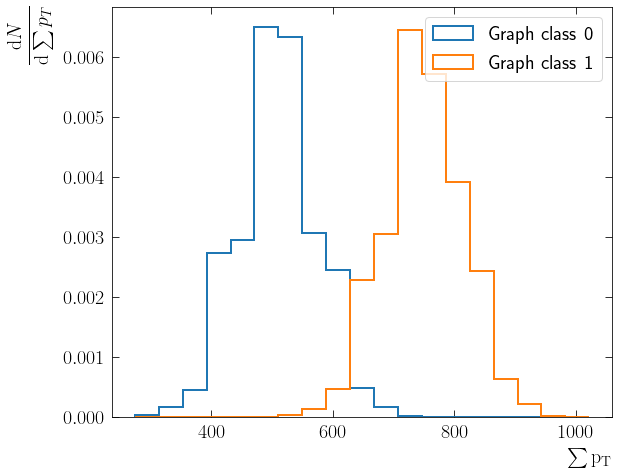

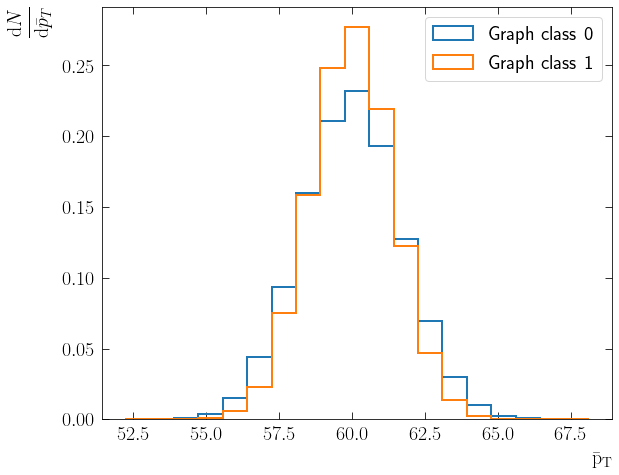

 89%|████████▉ | 24/27 [18:41<02:20, 46.67s/it]

Done loading data from cached files.


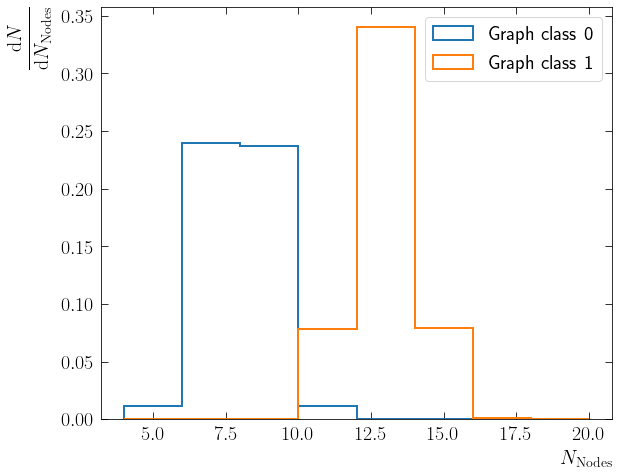

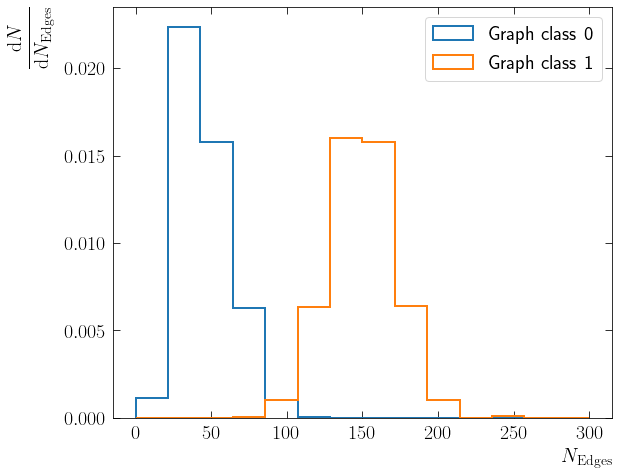

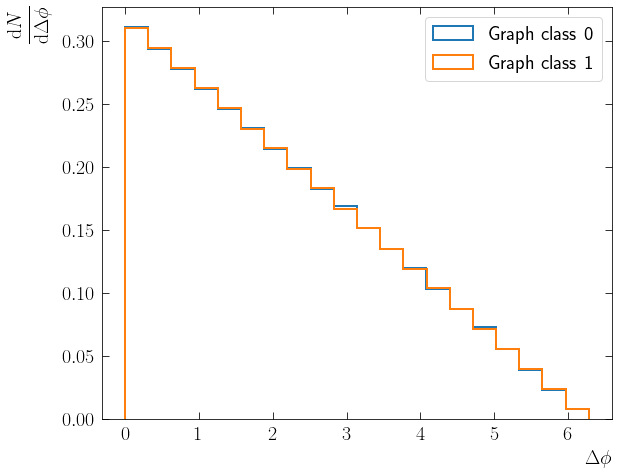

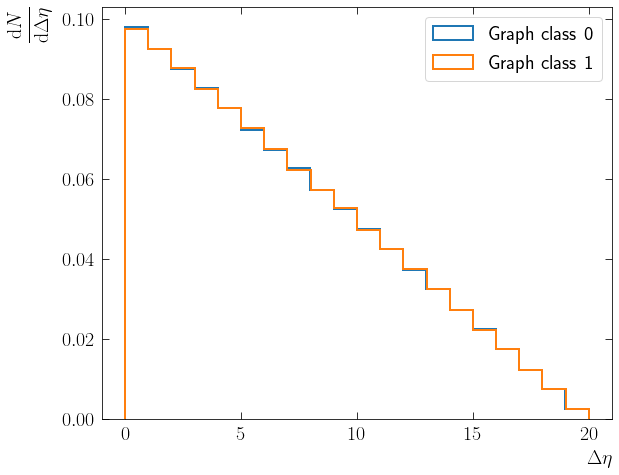

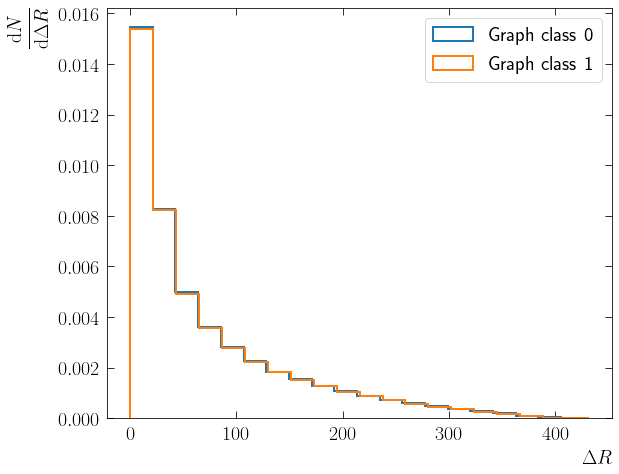

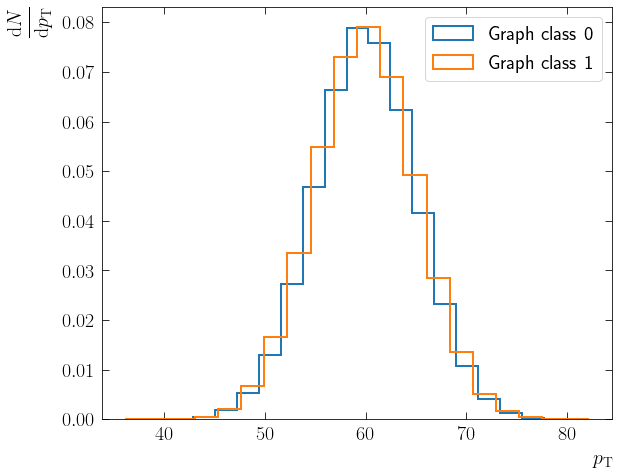

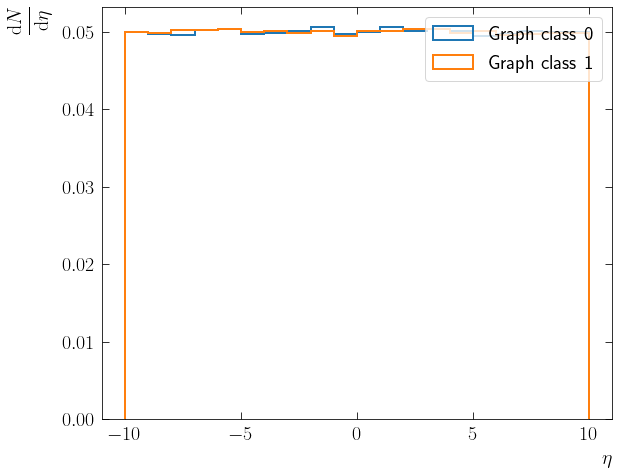

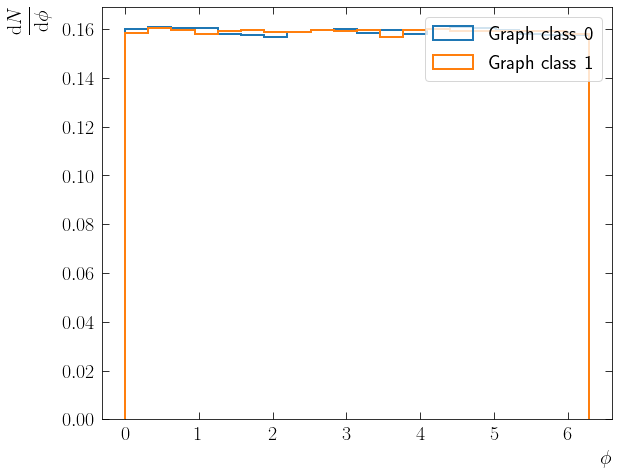

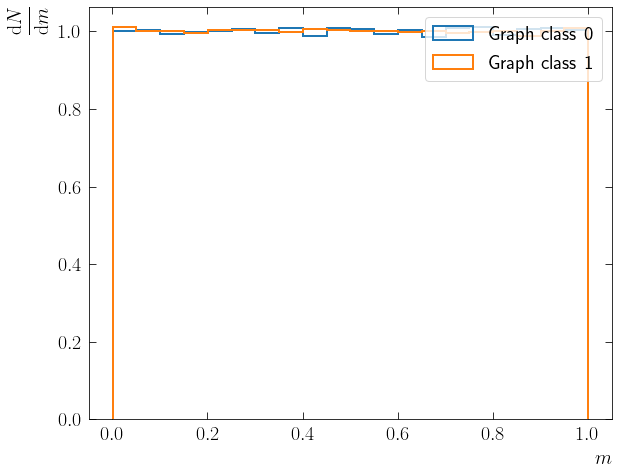

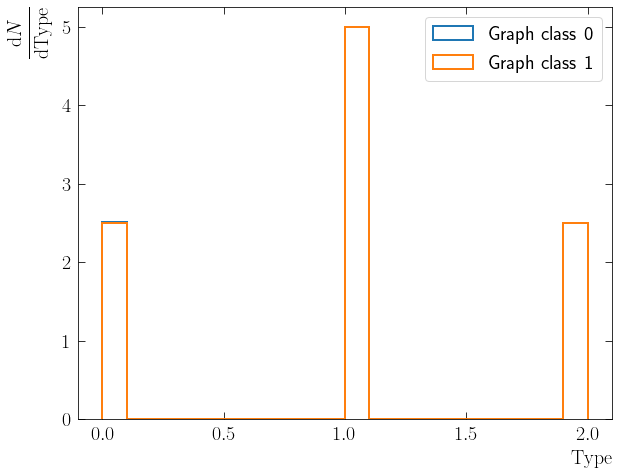

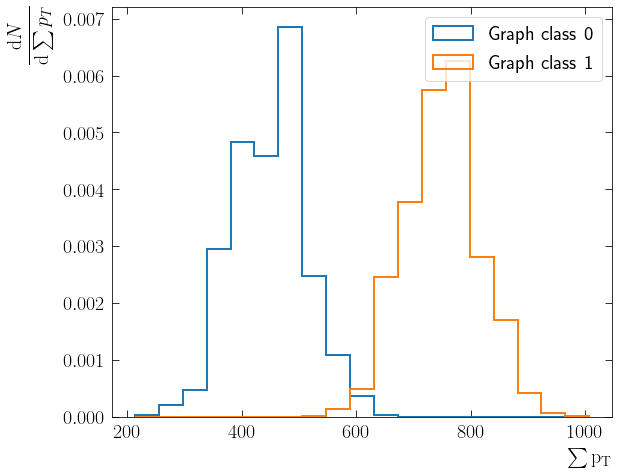

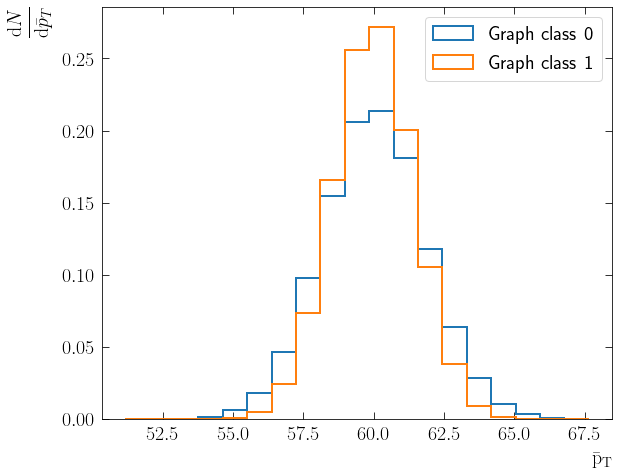

 93%|█████████▎| 25/27 [19:27<01:33, 46.52s/it]

Done loading data from cached files.


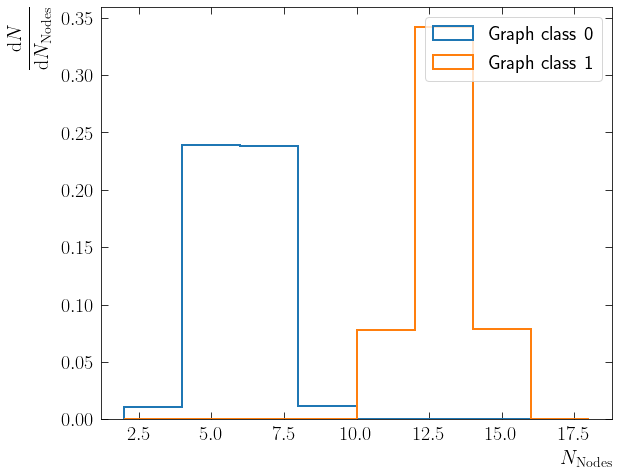

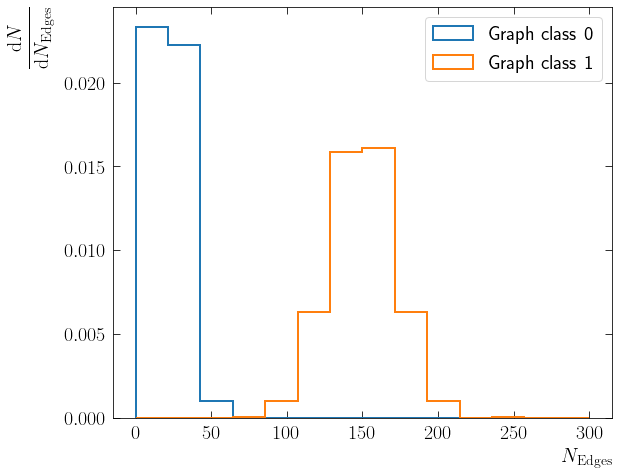

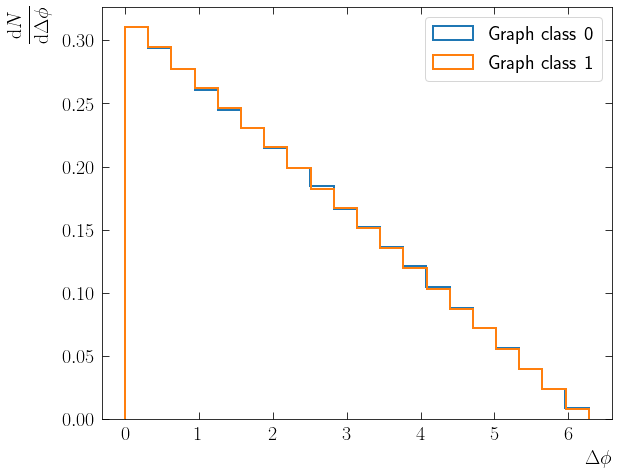

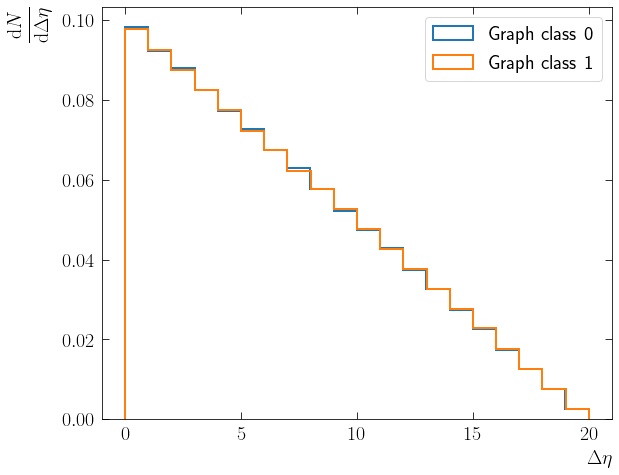

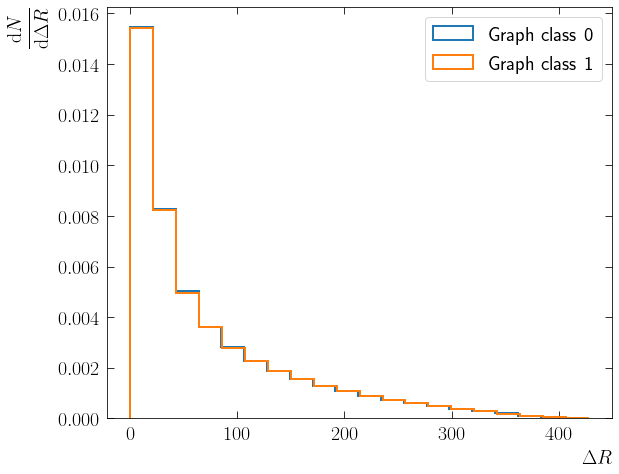

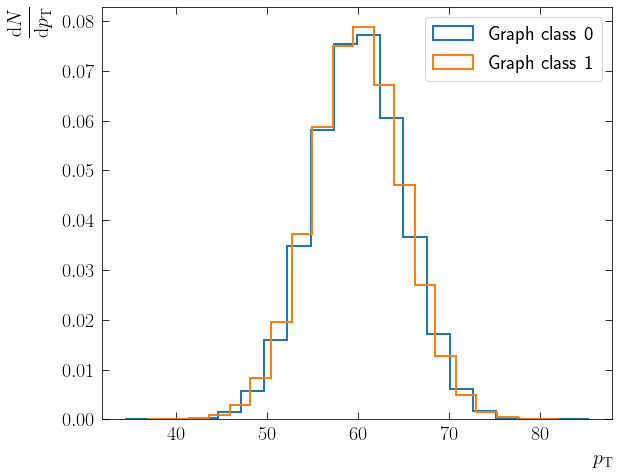

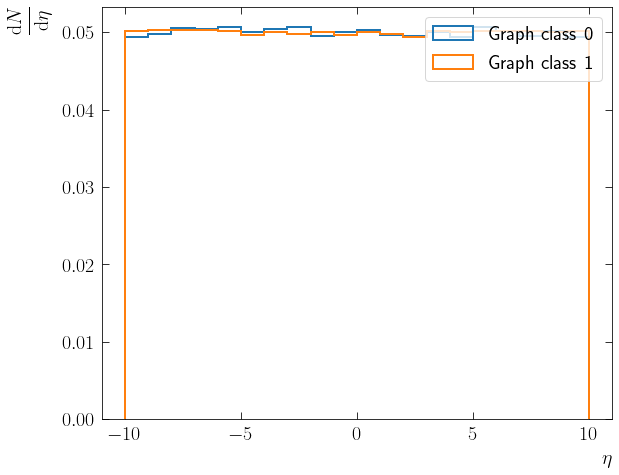

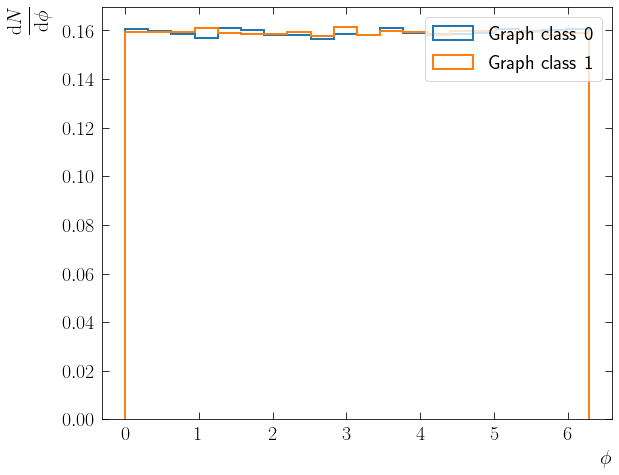

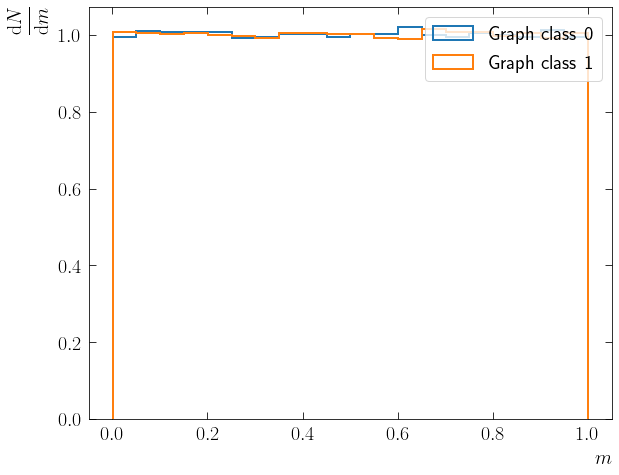

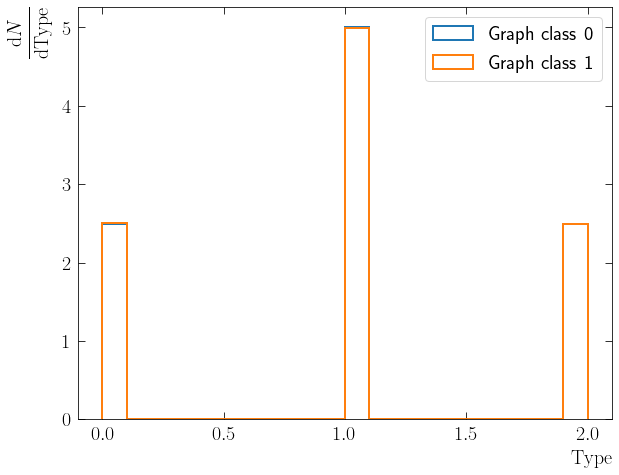

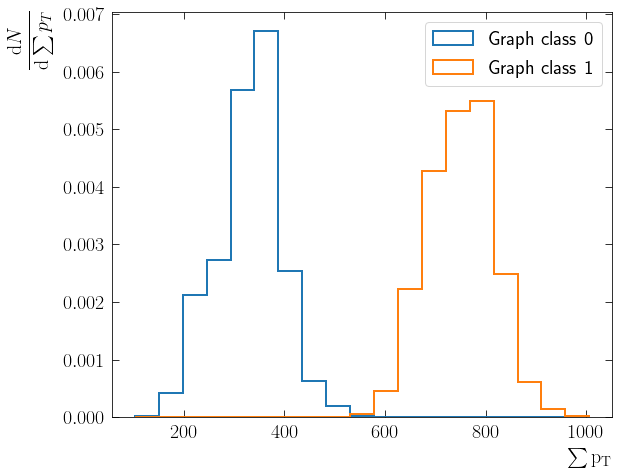

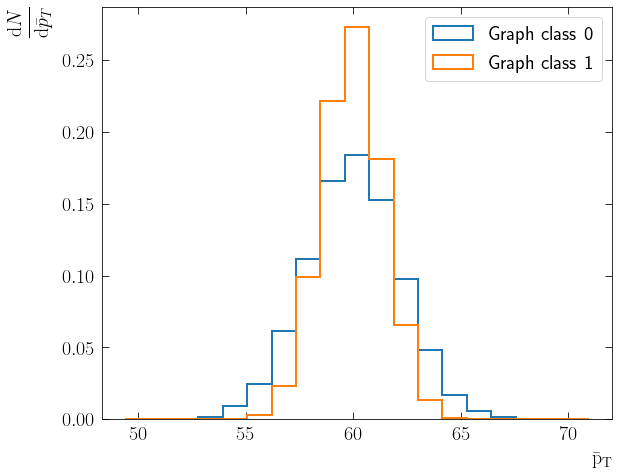

 96%|█████████▋| 26/27 [20:12<00:46, 46.22s/it]

Done loading data from cached files.


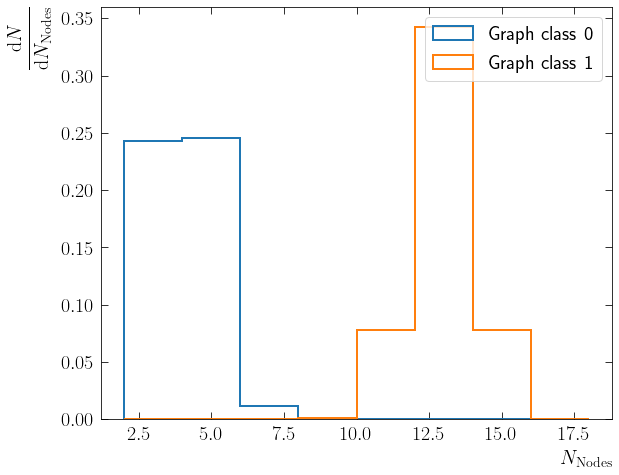

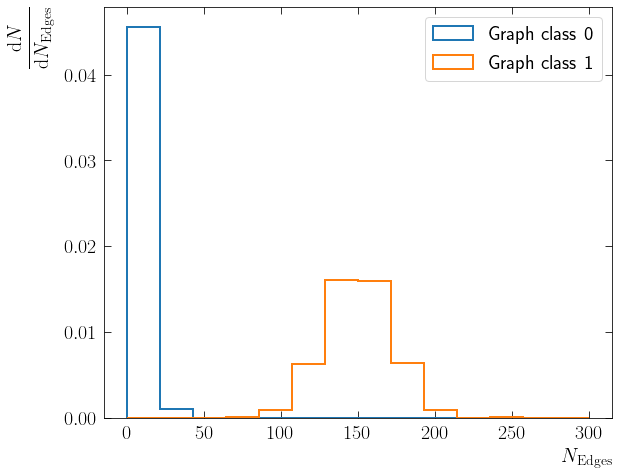

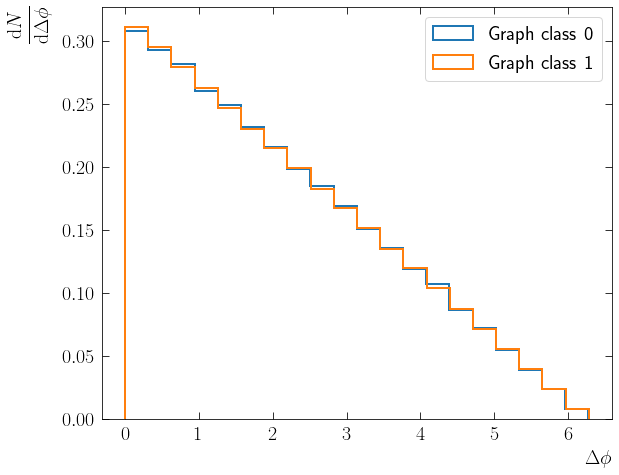

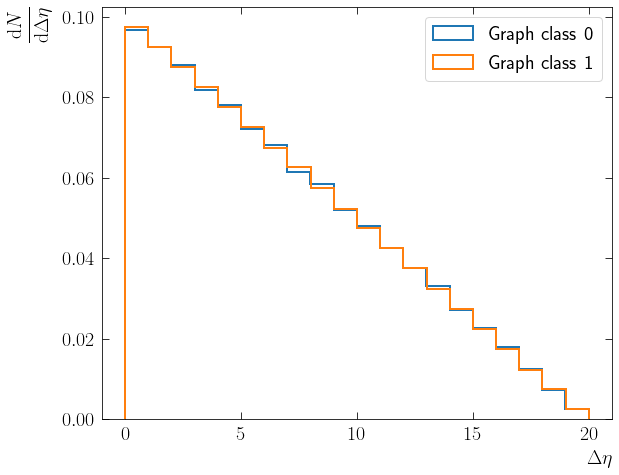

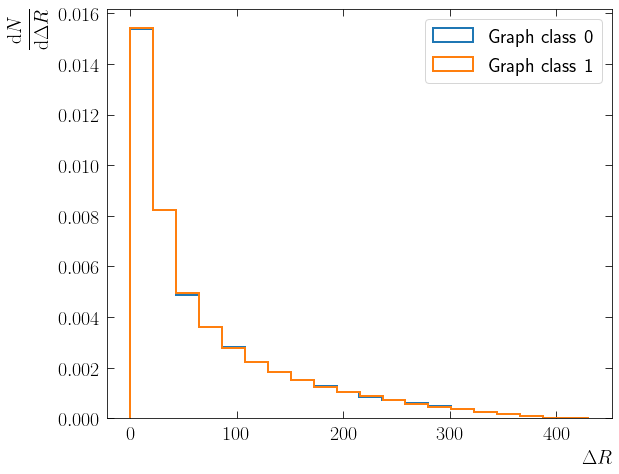

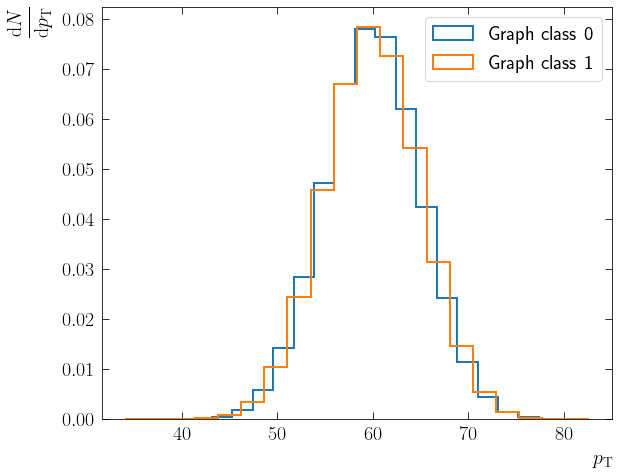

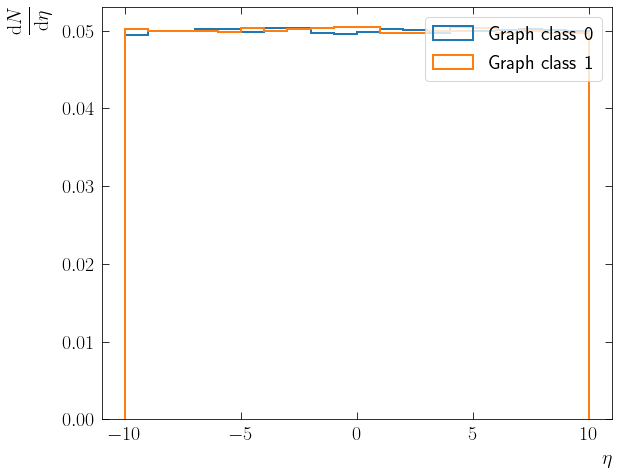

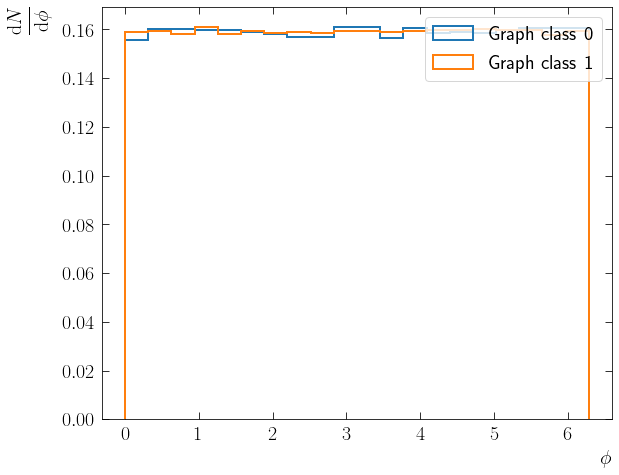

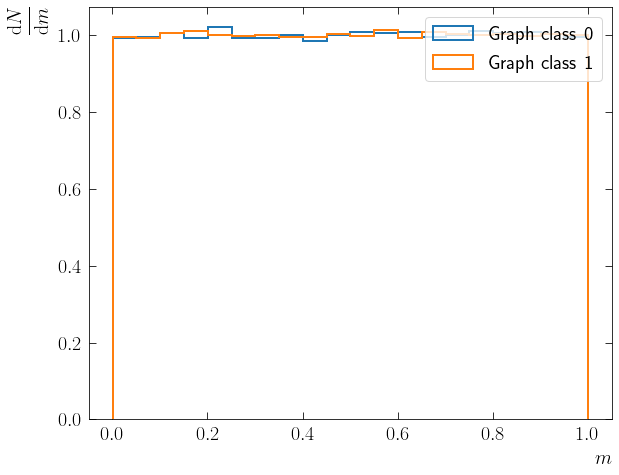

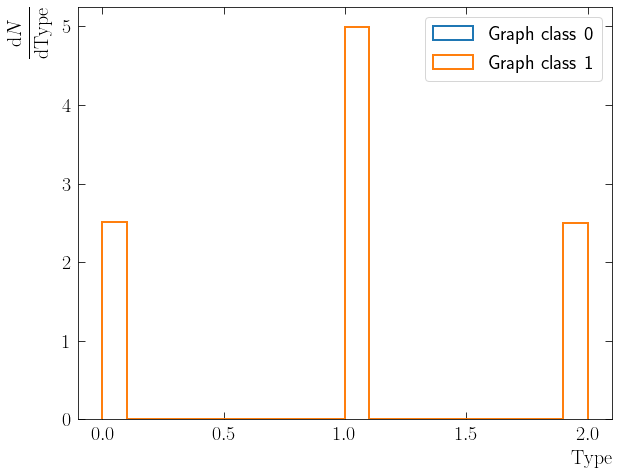

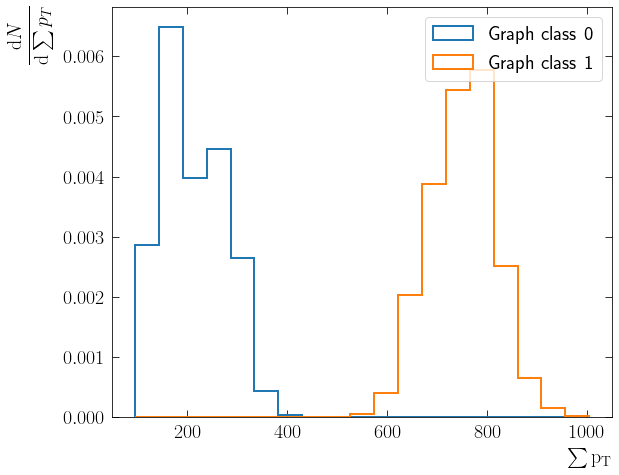

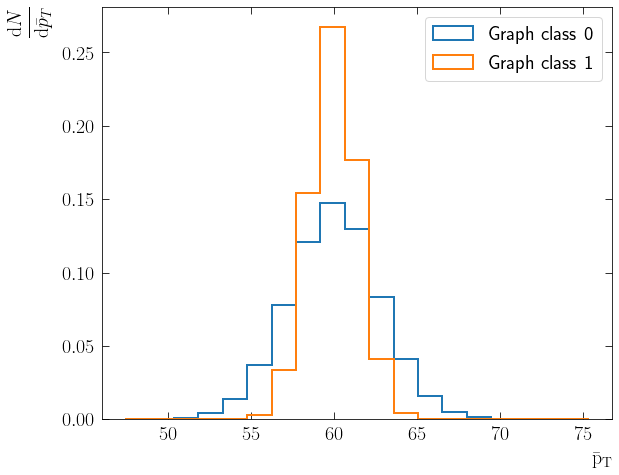

100%|██████████| 27/27 [20:58<00:00, 46.60s/it]


In [9]:
for idx in tqdm(range(len(datasetDirs))):
    dataset = ToyDGLDataset_v2(datasetNames[idx], datasetDirs[idx])
    
    outputPath = path.join(datasetDirs[idx], 'ThesisPlots')
    Path(outputPath).mkdir(parents=True, exist_ok=True)

    DeltaPhi = {
        graphClass0 : np.array(dataset._accumulateFeature("DeltaPhi", 0)),
        graphClass1 : np.array(dataset._accumulateFeature("DeltaPhi", 1))
    }

    nNodes = {
        graphClass0 : np.array([g.num_nodes() for g, label in dataset if label == 0]),
        graphClass1 : np.array([g.num_nodes() for g, label in dataset if label == 1])
    }


    nEdges = {
        graphClass0 : np.array([x*(x-1) for x in nNodes[graphClass0]]),
        graphClass1 : np.array([x*(x-1) for x in nNodes[graphClass1]])
    }


    DeltaEta = {
        graphClass0 : np.array(dataset._accumulateFeature("DeltaEta", 0)),
        graphClass1 : np.array(dataset._accumulateFeature("DeltaEta", 1))
    }

    DeltaR = {
        graphClass0 : np.array(dataset._accumulateFeature("RapiditySquared", 0)),
        graphClass1 : np.array(dataset._accumulateFeature("RapiditySquared", 1))
    }

    Pt = {
        graphClass0 : np.array(dataset._accumulateFeature("P_t", 0)),
        graphClass1 : np.array(dataset._accumulateFeature("P_t", 1))
    }

    Eta = {
        graphClass0 : np.array(dataset._accumulateFeature("Eta", 0)),
        graphClass1 : np.array(dataset._accumulateFeature("Eta", 1))
    }

    Phi = {
        graphClass0 : np.array(dataset._accumulateFeature("Phi", 0)),
        graphClass1 : np.array(dataset._accumulateFeature("Phi", 1))
    }

    Mass = {
        graphClass0 : np.array(dataset._accumulateFeature("Mass", 0)),
        graphClass1 : np.array(dataset._accumulateFeature("Mass", 1))
    }

    Type = {
        graphClass0 : np.array(dataset._accumulateFeature("Type", 0)),
        graphClass1 : np.array(dataset._accumulateFeature("Type", 1))
    }
    
    
    # node count histo
    bins = getBinsByPercentile(nNodes, 8)

    fig, ax = CreateFigure()

    outputName = path.join(outputPath, f'Thesis_Histo_{datasetNames[0]}_NodeCount.png')

    ax.hist(nNodes[graphClass0], bins=bins, label="Graph class 0", histtype="step", linewidth=lw, density=True)
    ax.hist(nNodes[graphClass1], bins=bins, label="Graph class 1", histtype="step", linewidth=lw, density=True)
    ax.set_xlabel(r"$\displaystyle N_{\mathrm{Nodes}}$", loc='right', labelpad=xLabelPad, fontsize=xyLabelFontSize)
    ax.set_ylabel(r"$\displaystyle\frac{\mathrm{d}N}{\mathrm{d}N_{\mathrm{Nodes}}}$", loc='top', labelpad=yLabelPad, fontsize=xyLabelFontSize)
    ax.legend()
    plt.tight_layout()
    plt.savefig(outputName)
    plt.show()
    
    # edge count histo
    bins = np.linspace(0, 300, 15)

    fig, ax = CreateFigure()

    ax.hist(nEdges[graphClass0], bins=bins, range=(0,1200), label="Graph class 0", histtype="step", linewidth=lw, density=True)
    ax.hist(nEdges[graphClass1], bins=bins, range=(0,1200), label="Graph class 1", histtype="step", linewidth=lw, density=True)
    ax.set_xlabel(r"$\displaystyle N_{\mathrm{Edges}}$", loc='right', labelpad=xLabelPad, fontsize=xyLabelFontSize)
    ax.set_ylabel(r"$\displaystyle\frac{\mathrm{d}N}{\mathrm{d}N_{\mathrm{Edges}}}$", loc='top', labelpad=yLabelPad, fontsize=xyLabelFontSize)
    ax.legend()
    plt.tight_layout()

    plt.savefig(path.join(outputPath, f'Thesis_Histo_{datasetNames[0]}_EdgeCount.png'))
    plt.show()
    
    
    # delta phi histo
    fig, ax = CreateFigure()

    ax.hist(DeltaPhi[graphClass0], bins=nBins, label="Graph class 0", histtype="step", linewidth=lw, density=True)
    ax.hist(DeltaPhi[graphClass1], bins=nBins, label="Graph class 1", histtype="step", linewidth=lw, density=True)
    ax.set_xlabel(r"$\displaystyle\Delta \phi$", loc='right', labelpad=xLabelPad, fontsize=xyLabelFontSize)
    ax.set_ylabel(r"$\displaystyle\frac{\mathrm{d}N}{\mathrm{d}\Delta\phi}$", loc='top', labelpad=yLabelPad, fontsize=xyLabelFontSize)
    ax.legend()
    plt.tight_layout()
    plt.savefig(path.join(outputPath, f'Thesis_Histo_{datasetNames[0]}_DeltaPhi.png'))
    plt.show()
    
    # delta eta histo
    fig, ax = CreateFigure()

    ax.hist(DeltaEta[graphClass0], bins=nBins, label="Graph class 0", histtype="step", linewidth=lw, density=True)
    ax.hist(DeltaEta[graphClass1], bins=nBins, label="Graph class 1", histtype="step", linewidth=lw, density=True)
    ax.set_xlabel(r"$\displaystyle\Delta \eta$", loc='right', labelpad=xLabelPad, fontsize=xyLabelFontSize)
    ax.set_ylabel(r"$\displaystyle\frac{\mathrm{d}N}{\mathrm{d}\Delta \eta}$", loc='top', labelpad=yLabelPad, fontsize=xyLabelFontSize)
    ax.legend()
    plt.tight_layout()
    plt.savefig(path.join(outputPath, f'Thesis_Histo_{datasetNames[0]}_DeltaEta.png'))
    plt.show()
    
    # delta R histo
    fig, ax = CreateFigure()

    ax.hist(DeltaR[graphClass0], bins=nBins, label="Graph class 0", histtype="step", linewidth=lw, density=True)
    ax.hist(DeltaR[graphClass1], bins=nBins, label="Graph class 1", histtype="step", linewidth=lw, density=True)
    ax.set_xlabel(r"$\displaystyle\Delta R$", loc='right', labelpad=xLabelPad, fontsize=xyLabelFontSize)
    ax.set_ylabel(r"$\displaystyle\frac{\mathrm{d}N}{\mathrm{d}\Delta R}$", loc='top', labelpad=yLabelPad, fontsize=xyLabelFontSize)
    ax.legend()
    plt.tight_layout()
    plt.savefig(path.join(outputPath, f'Thesis_Histo_{datasetNames[0]}_DeltaR.png'))
    plt.show()
    
    # Pt histo
    fig, ax = CreateFigure()

    ax.hist(Pt[graphClass0], bins=nBins, label="Graph class 0", histtype="step", linewidth=lw, density=True)
    ax.hist(Pt[graphClass1], bins=nBins, label="Graph class 1", histtype="step", linewidth=lw, density=True)
    ax.set_xlabel(r"$p_{\mathrm{T}}$", loc='right', labelpad=xLabelPad, fontsize=xyLabelFontSize)
    ax.set_ylabel(r"$\displaystyle\frac{\mathrm{d}N}{\mathrm{d}p_{\mathrm{T}}}$", loc='top', labelpad=yLabelPad, fontsize=xyLabelFontSize)
    ax.legend()
    plt.tight_layout()
    plt.savefig(path.join(outputPath, f'Thesis_Histo_{datasetNames[0]}_Pt.png'))
    plt.show()
    
    
    # Eta histo
    fig, ax = CreateFigure()

    ax.hist(Eta[graphClass0], bins=nBins, label="Graph class 0", histtype="step", linewidth=lw, density=True)
    ax.hist(Eta[graphClass1], bins=nBins, label="Graph class 1", histtype="step", linewidth=lw, density=True)
    ax.set_xlabel(r"$\eta$", loc='right', labelpad=xLabelPad, fontsize=xyLabelFontSize)
    ax.set_ylabel(r"$\displaystyle\frac{\mathrm{d}N}{\mathrm{d}\eta}$", loc='top', labelpad=yLabelPad, fontsize=xyLabelFontSize)
    ax.legend()
    plt.tight_layout()
    plt.savefig(path.join(outputPath, f'Thesis_Histo_{datasetNames[0]}_Eta.png'))
    plt.show()

    
    # Phi histo
    fig, ax = CreateFigure()

    ax.hist(Phi[graphClass0], bins=nBins, label="Graph class 0", histtype="step", linewidth=lw, density=True)
    ax.hist(Phi[graphClass1], bins=nBins, label="Graph class 1", histtype="step", linewidth=lw, density=True)
    ax.set_xlabel(r"$\phi$", loc='right', labelpad=xLabelPad, fontsize=xyLabelFontSize)
    ax.set_ylabel(r"$\displaystyle\frac{\mathrm{d}N}{\mathrm{d}\phi}$", loc='top', labelpad=yLabelPad, fontsize=xyLabelFontSize)
    ax.legend()
    plt.tight_layout()
    plt.savefig(path.join(outputPath, f'Thesis_Histo_{datasetNames[0]}_Phi.png'))
    plt.show()
    
    # Mass histo
    fig, ax = CreateFigure()

    ax.hist(Mass[graphClass0], bins=nBins, label="Graph class 0", histtype="step", linewidth=lw, density=True)
    ax.hist(Mass[graphClass1], bins=nBins, label="Graph class 1", histtype="step", linewidth=lw, density=True)
    ax.set_xlabel(r"$m$", loc='right', labelpad=xLabelPad, fontsize=xyLabelFontSize)
    ax.set_ylabel(r"$\displaystyle\frac{\mathrm{d}N}{\mathrm{d}m}$", loc='top', labelpad=yLabelPad, fontsize=xyLabelFontSize)
    ax.legend()
    plt.tight_layout()
    plt.savefig(path.join(outputPath, f'Thesis_Histo_{datasetNames[0]}_Mass.png'))
    plt.show()
    
    # Type histo
    fig, ax = CreateFigure()

    ax.hist(Type[graphClass0], bins=nBins, label="Graph class 0", histtype="step", linewidth=lw, density=True)
    ax.hist(Type[graphClass1], bins=nBins, label="Graph class 1", histtype="step", linewidth=lw, density=True)
    ax.set_xlabel(r"$\mathrm{Type}$", loc='right', labelpad=xLabelPad, fontsize=xyLabelFontSize)
    ax.set_ylabel(r"$\displaystyle\frac{\mathrm{d}N}{\mathrm{dType}}$", loc='top', labelpad=yLabelPad, fontsize=xyLabelFontSize)
    ax.legend()
    plt.tight_layout()
    plt.savefig(path.join(outputPath, f'Thesis_Histo_{datasetNames[0]}_Type.png'))
    plt.show()
    
    accumulatedFeat_Pt = {}
    sumPt = {}
    meanPt = {}


    sumMin = 999999999999
    sumMax = -999999999999
    meanMin = 999999999999
    meanMax = -999999999999


    for gclass in dataset.graphClasses:
        accumulatedFeat_Pt[gclass] = []
        sumPt[gclass] = []
        meanPt[gclass] = []
        for i in range(dataset.num_graphs):
            if dataset.labels[i] == gclass:
                feat = dataset._getFeatureByKey(dataset.graphs[i], 'P_t')
                accumulatedFeat_Pt[gclass].append(feat)

        sumPt[gclass] = [sum(x) for x in accumulatedFeat_Pt[gclass]]
        meanPt[gclass] = [mean(x) for x in accumulatedFeat_Pt[gclass]]

        tempSumMin = min(sumPt[gclass])
        tempSumMax = max(sumPt[gclass])
        tempMeanMin = min(meanPt[gclass])
        tempMeanMax = max(meanPt[gclass])

        if sumMin > tempSumMin:
            sumMin = tempSumMin
        if sumMax < tempSumMax:
            sumMax = tempSumMax
        if meanMin > tempMeanMin:
            meanMin = tempMeanMin
        if meanMax < tempMeanMax:
            meanMax = tempMeanMax

    nBins = 20
    binsSumPt = np.linspace(sumMin, sumMax, nBins)
    binsMeanPt = np.linspace(meanMin, meanMax, nBins)

    
    fig, ax = CreateFigure()

    ax.hist(sumPt[0], bins=binsSumPt, label="Graph class 0", histtype="step", linewidth=lw, density=True)
    ax.hist(sumPt[1], bins=binsSumPt, label="Graph class 1", histtype="step", linewidth=lw, density=True)
    ax.set_xlabel(r"$\mathrm{\sum p_T}$", loc='right', labelpad=xLabelPad, fontsize=xyLabelFontSize)
    ax.set_ylabel(r"$\displaystyle\frac{\mathrm{d}N}{\mathrm{d}\sum p_T}$", loc='top', labelpad=yLabelPad, fontsize=xyLabelFontSize)
    ax.legend()
    plt.tight_layout()
    plt.savefig(path.join(outputPath, f'Thesis_Histo_{datasetNames[0]}_SumPT.png'))
    plt.show()

    
    fig, ax = CreateFigure()

    ax.hist(meanPt[0], bins=binsMeanPt, label="Graph class 0", histtype="step", linewidth=lw, density=True)
    ax.hist(meanPt[1], bins=binsMeanPt, label="Graph class 1", histtype="step", linewidth=lw, density=True)
    ax.set_xlabel(r"$\mathrm{\bar{p}_T}$", loc='right', labelpad=xLabelPad, fontsize=xyLabelFontSize)
    ax.set_ylabel(r"$\displaystyle\frac{\mathrm{d}N}{\mathrm{d}\bar{p}_T}$", loc='top', labelpad=yLabelPad, fontsize=xyLabelFontSize)
    ax.legend()
    plt.tight_layout()
    plt.savefig(path.join(outputPath, f'Thesis_Histo_{datasetNames[0]}_MeanPT.png'))
    plt.show()

    """
    for gclass in dataset.graphClasses:
        plt.hist(sumPt[gclass], binsSumPt,label=f'Graph class {gclass}', histtype="step", linewidth=lineWidth)

    plt.title("sum P_t")
    plt.xlabel("sum P_t")
    plt.ylabel("frequency")
    plt.legend(loc='upper right')
    filename = f"Histo_sum_P_t.jpg"
    outputPath = dataset.save_dir
    outputFilePath = path.join(outputPath, filename)
    plt.savefig(outputFilePath)
    plt.clf()
    
    for gclass in dataset.graphClasses:
        plt.hist(meanPt[gclass], binsMeanPt,label=f'Graph class {gclass}', histtype="step", linewidth=lineWidth)

    plt.title("mean P_t")
    plt.xlabel("mean P_t")
    plt.ylabel("frequency")
    plt.legend(loc='upper right')
    filename = f"Histo_mean_P_t.jpg"
    outputPath = dataset.save_dir
    outputFilePath = path.join(outputPath, filename)
    plt.savefig(outputFilePath)
    plt.clf()
    """



